In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import re
import os
import shutil
import seaborn as sns
from scipy import stats
from ptm_dict import modres
from adjustText import adjust_text
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_absolute_error as mae

In [2]:
from datetime import datetime
time_stamp = datetime.today().strftime('%Y-%m-%d')

In [3]:
# Block of seaborn style settings
plt.rc('font', size=23) #controls default text size
plt.rc('axes', labelsize=20) #fontsize of the x and y labels
plt.rc('xtick', labelsize=18) #fontsize of the x tick labels
plt.rc('ytick', labelsize=18) #fontsize of the y tick labels
sns.set(style='whitegrid', color_codes=True, font='serif', font_scale=2)

plt.rc('font', size=23) #controls default text size
plt.rc('xtick', labelsize=25) #fontsize of the x tick labels
plt.rc('ytick', labelsize=25) #fontsize of the y tick labels

In [4]:
exp_flex_ddG = pd.read_csv('flex_ddg_both_skempi2_std.csv')
exp_cart_ddg_ia = pd.read_csv('skempiMAX_cart_ddg_IA.csv')
skempiMAX = pd.read_csv('/groups/sbinlab/panf/SKEMPIv2_benchmark/skempiMAX.csv')
SkempiMAX_cart_flex = pd.read_csv('/groups/sbinlab/panf/SKEMPIv2_benchmark/skempiMAX_cart_ddg_IA_Flex_ddG_2025-10-25.csv')

In [5]:
skempiMAX['N_mut'] = skempiMAX['Mutation(s)_PDB'].str.split(',').str.len()
skempiMAX['N_mut'] = skempiMAX['N_mut'].apply(lambda x: '3+' if x >= 3 else x)
skempiMAX['N_mut'] = skempiMAX['N_mut'].apply(str)

SkempiMAX_cart_flex.loc[SkempiMAX_cart_flex['mean_ddG']>12.3, 'mean_ddG'] = 12.3

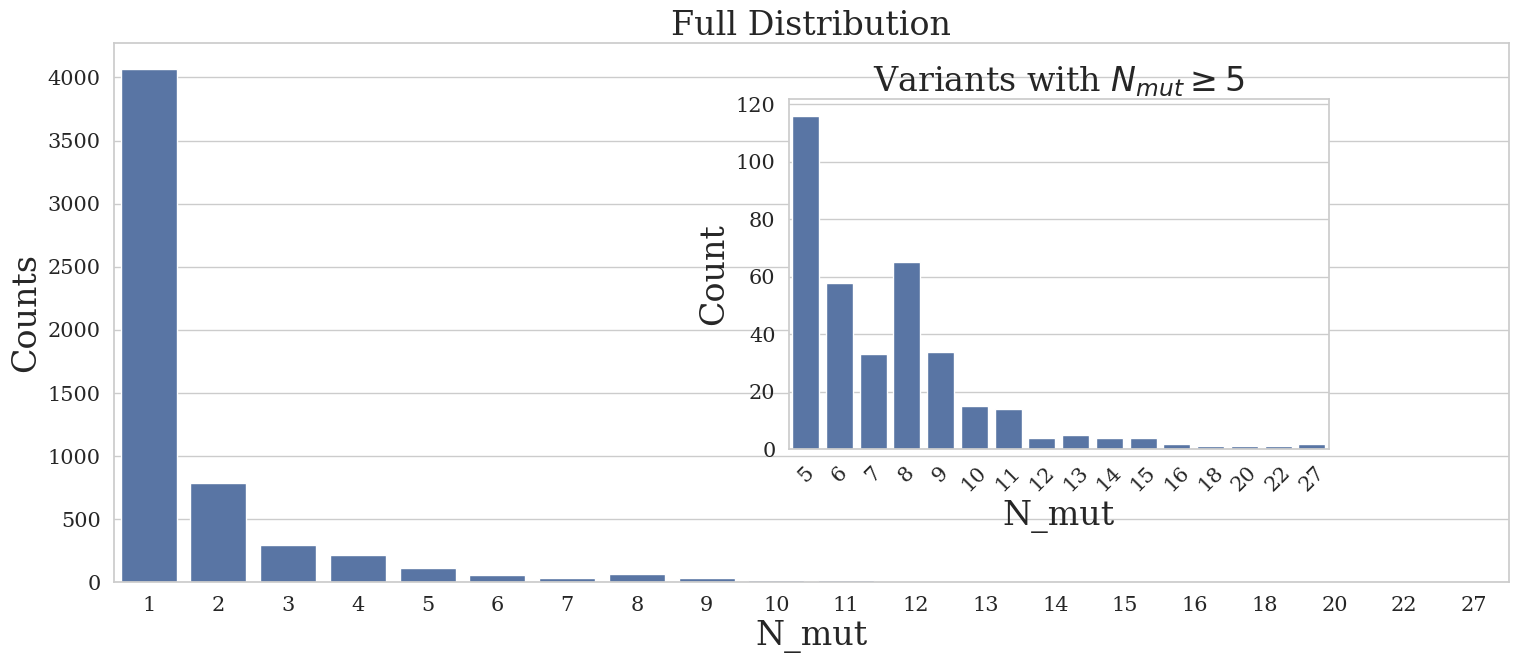

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 1, figsize=(18, 7))
df = skempiMAX.copy()
# 1. Main plot for the full dataset (showing the large N_mut=1 bar)
sns.countplot(df, x="N_mut", ax=axes)
axes.set_title('Full Distribution')
axes.set_ylabel('Counts')

# --- 2. Create the Inset Plot ---
# Determine the position of the inset plot (e.g., in the top-right corner)
left, bottom, width, height = [0.5, 0.3, 0.3, 0.5] 
ax_inset = fig.add_axes([left, bottom, width, height])

# Filter the data for the inset: N_mut > 1
df_inset = df[df['N_mut'] > 4] 

# Plot the filtered data on the inset axis
sns.countplot(df_inset, x="N_mut", ax=ax_inset)

# Customize the inset axis for clarity
ax_inset.set_title('Variants with $N_{mut} \geq 5$')
ax_inset.set_xlabel('N_mut')
ax_inset.set_ylabel('Count')
ax_inset.tick_params(axis='x', rotation=45) # Rotate x-labels for clarity

plt.savefig('Figures/N_mut_hist.pdf', format='pdf')

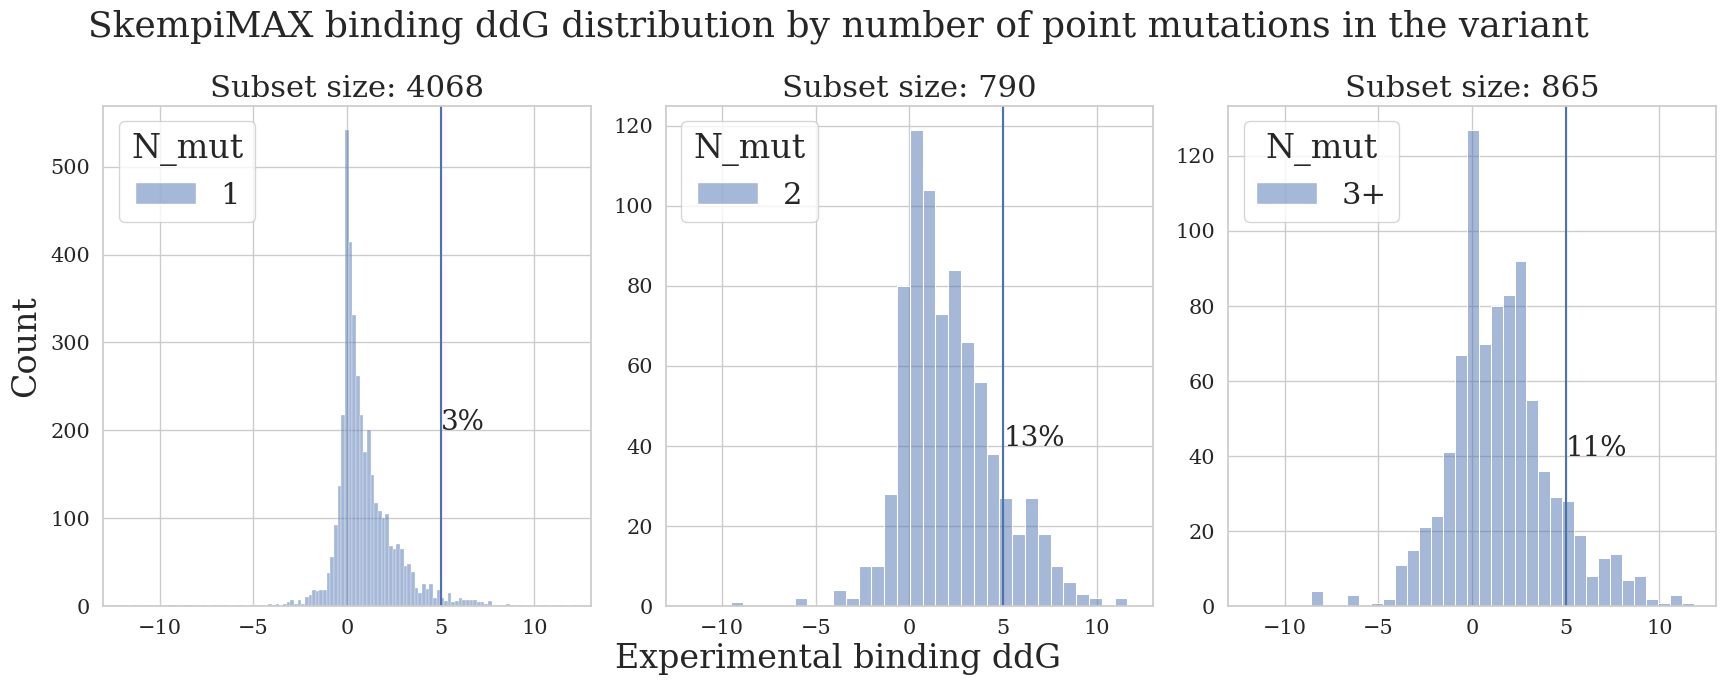

In [30]:
plt.rc('font', size=15) #controls default text size
plt.rc('xtick', labelsize=15) #fontsize of the x tick labels
plt.rc('ytick', labelsize=15) #fontsize of the y tick labels
#sns.set(style='whitegrid', color_codes=True, font='serif', font_scale=1)

df = skempiMAX.copy()

fig, axes = plt.subplots(1, 3, figsize=(18, 7))
plt.setp(axes, xlim=(-13, 13))
axes = axes.flatten()
df = skempiMAX.copy()
for ax, n, h in zip(axes, df['N_mut'].unique(), [200, 40, 40]):
    subset = df.loc[df['N_mut']==n]
    a = sns.histplot(data=subset, x="ddG_bind", hue='N_mut', ax=ax, alpha=0.5)
    ax.axvline(5, 0, 500)

    # l = len(subset.loc[subset['ddG_bind']>5])
    l = round(len(subset.loc[subset['ddG_bind']>5])/len(subset)*100)
    ax.annotate(f'{l}%', xy=(5, h), fontsize = 20)
    
    a.set_title(f'Subset size: {len(subset)}', fontsize=22)
    ax.set_xlabel('')
    ax.set_ylabel('')

fig.text(0.5, 0.04, 'Experimental binding ddG', ha='center', fontsize=24)
fig.text(0.04, 0.5, 'Count', va='center', rotation='vertical', fontsize=24)
fig.suptitle('SkempiMAX binding ddG distribution by number of point mutations in the variant', fontsize=26)
plt.tight_layout(rect=[0.05, 0.05, 1, 1])
plt.savefig('Figures/N_mut_ddG_hist_perc.pdf', format='pdf')

In [7]:
len(exp_flex_ddG.loc[exp_flex_ddG['flex_ddg'].isna()])
#len(exp_cart_ddg_ia.loc[(exp_cart_ddg_ia['mean_ddG'].isna())])

101

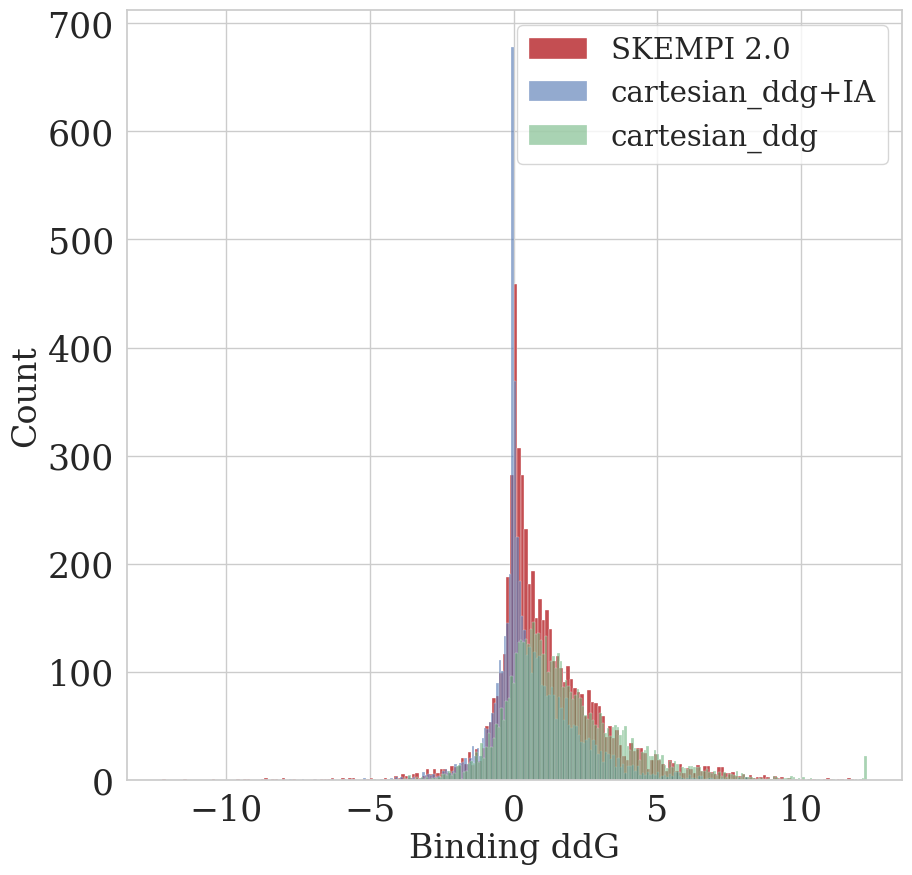

In [25]:
df=SkempiMAX_cart_flex.copy()
fig= plt.figure(figsize=(10, 10))
sns.histplot(data=df, x="ddG_bind", bins=200, color='r', alpha = 1, label='SKEMPI 2.0')
sns.histplot(data=df, x="mean_ddG_infc", bins=200, color='b', alpha = 0.6, label='cartesian_ddg+IA')
sns.histplot(data=df, x="mean_ddG", bins=200, color='g', alpha = 0.5, label='cartesian_ddg')

plt.xlabel('Binding ddG')

plt.legend(fontsize=21)
plt.savefig("Figures/ddG_bind_dist_CartIA_Cart_Exp_new.pdf", format='pdf')

In [41]:
SkempiMAX_cart_flex.loc[SkempiMAX_cart_flex['flex_ddg']<-12.2, 'flex_ddg'] = -12.2

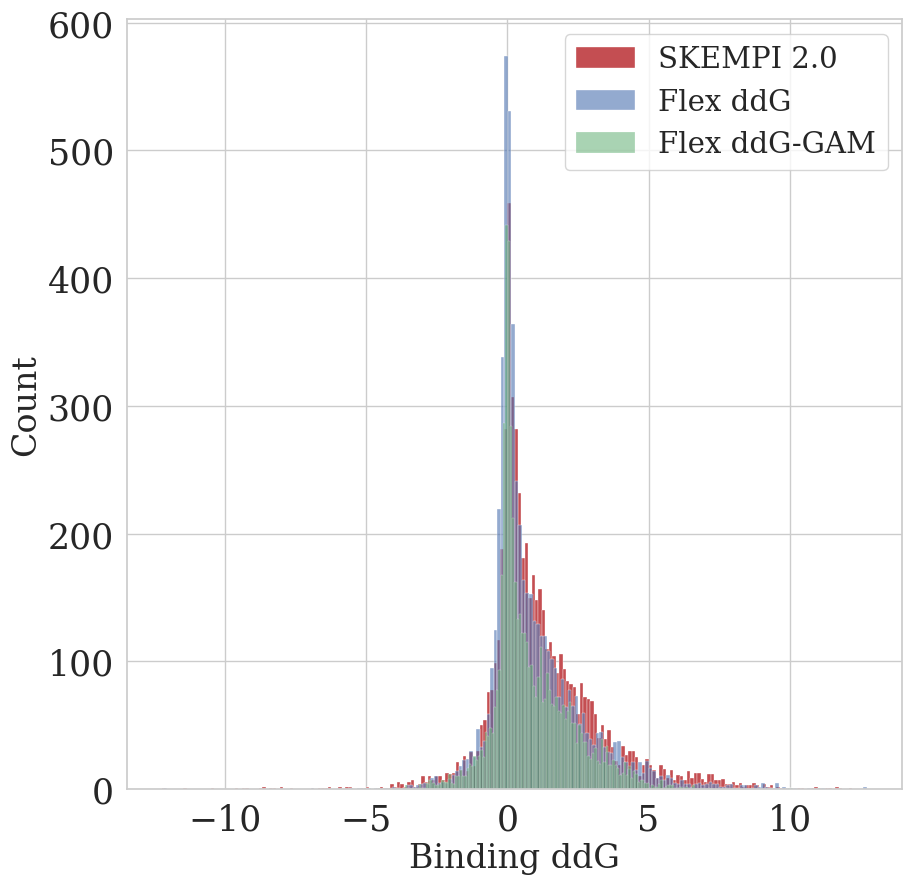

In [44]:
df=SkempiMAX_cart_flex.copy()
fig= plt.figure(figsize=(10, 10))
sns.histplot(data=df, x="ddG_bind", bins=200, color='r', alpha = 1, label='SKEMPI 2.0')
sns.histplot(data=df, x="flex_ddg", bins=200, color='b', alpha = 0.6, label='Flex ddG')
sns.histplot(data=df, x="flex_ddg_gam", bins=200, color='g', alpha = 0.5, label='Flex ddG-GAM')

plt.xlabel('Binding ddG')

plt.legend(fontsize=21)
plt.savefig("Figures/ddG_bind_dist_Felx_Exp_new.pdf", format='pdf')

In [17]:
print('Mean', df["std_ddG_infc"].mean())
print('MAX', df["std_ddG_infc"].max())
print('MIN', df["std_ddG_infc"].min())

Mean 0.0832524387981608
MAX 3.703978074302433
MIN 0.0


In [95]:
df=SkempiMAX_cart_flex.copy()
df.loc[df['std']>4]

variant  mean_ddG   std_ddG  mean_ddG_infc  \
39                      A320M  0.104943  0.054927       0.120603   
141                R57A:D147A  2.882644  0.093879       4.198608   
147                E71W:D143A  0.997126  0.003287       1.986374   
163                R57K:H100Q  3.188161  0.005933       2.053533   
332                     S546L  5.487701  0.106575       2.973195   
...                       ...       ...       ...            ...   
4821                     M36A  0.717931  0.009738       0.481503   
4828      Q34A:M36A:F40A:S87A  7.377471  0.011014       6.561797   
4870                    R692A  1.258966  0.006014      -0.125844   
4976        G386S:V446A:G481R  0.674138  0.247651            NaN   
4979  G386S:D441G:V446R:G481R  2.209655  0.428066            NaN   

      std_ddG_infc PDB_ID        #Pdb           Mutation(s)_PDB  \
39        0.027528   1TM5    1TM5_E_I                     AI59M   
141       0.033214   1BRS    1BRS_A_D               DD39A,RA59A   
147       0.003521   1BRS    1BRS_A_D               DD35A,EA73W   
163       0.001082   1BRS    1BRS_A_D              HA102Q,RA59K   
332       0.035405   2VIR   2VIR_AB_C                    SC157L   
...            ...    ...         ...                       ...   
4821      0.007543   4OFY    4OFY_A_D                     MA56A   
4828      0.008214   4OFY    4OFY_A_D  FA60A,MA56A,QA54A,SA107A   
4870      0.006191   4P5T  4P5T_CD_AB                     RD70A   
4976           NaN   2C5D    2C5D_A_C        GC127R,GC32S,VC92A   
4979           NaN   2C5D    2C5D_A_C  DC87G,GC127R,GC32S,VC92R   

          Mutation(s)_cleaned iMutation_Location(s)  ... Chains  \
39                      AI40M                   COR  ...     EI   
141               RA57A,DD39A               COR,COR  ...     AD   
147               EA71W,DD35A               SUP,COR  ...     AD   
163              HA100Q,RA57K               COR,COR  ...     AD   
332                    SC115L                   COR  ...    ABC   
...                       ...                   ...  ...    ...   
4821                    MA36A                   SUP  ...     AD   
4828  QA34A,MA36A,FA40A,SA87A       SUP,SUP,COR,SUP  ...     AD   
4870                    RD78A                   COR  ...   CDAB   
4976        GC6S,VC66A,GC101R           INT,SUP,INT  ...     AC   
4979  GC6S,DC61G,VC66R,GC101R       INT,SUR,SUP,INT  ...     AC   

     small-to-large type_of_change_infc        type_of_change_aa  \
39             True    non-infc to infc                same type   
141           False               mixed                    mixed   
147           False               mixed  negative to hydrophobic   
163           False    infc to non-infc                    mixed   
332            True    non-infc to infc     polar to hydrophobic   
...             ...                 ...                      ...   
4821          False    infc to non-infc                same type   
4828          False               mixed                    mixed   
4870          False    infc to non-infc  positive to hydrophobic   
4976          False               mixed                    mixed   
4979          False               mixed                    mixed   

      interaction_strength  N_mut    case_ID  flex_ddg flex_ddg_gam        std  
39                  strong      1    39_1TM5   0.48995    -0.060467   4.027302  
141                 strong      2   145_1BRS  11.14494     4.560335   4.395589  
147                 strong      2   151_1BRS   3.62814     3.345252   4.377598  
163                 strong      2   167_1BRS   5.31918     4.813159   4.920449  
332               moderate      1   350_2VIR   6.65707     3.481240   5.030670  
...                    ...    ...        ...       ...          ...        ...  
4821              moderate      1  5171_4OFY -32.04261    -4.141521  65.603419  
4828              moderate     3+  5178_4OFY   1.73399     1.456398   4.688975  
4870                  weak      1  5223_4P5T   1.

In [18]:
print('Mean', df["std"].mean())
print('MAX', df["std"].max())
print('MIN', df["std"].min())

Mean 1.0704515683277005
MAX 65.60341870006795
MIN 0.0


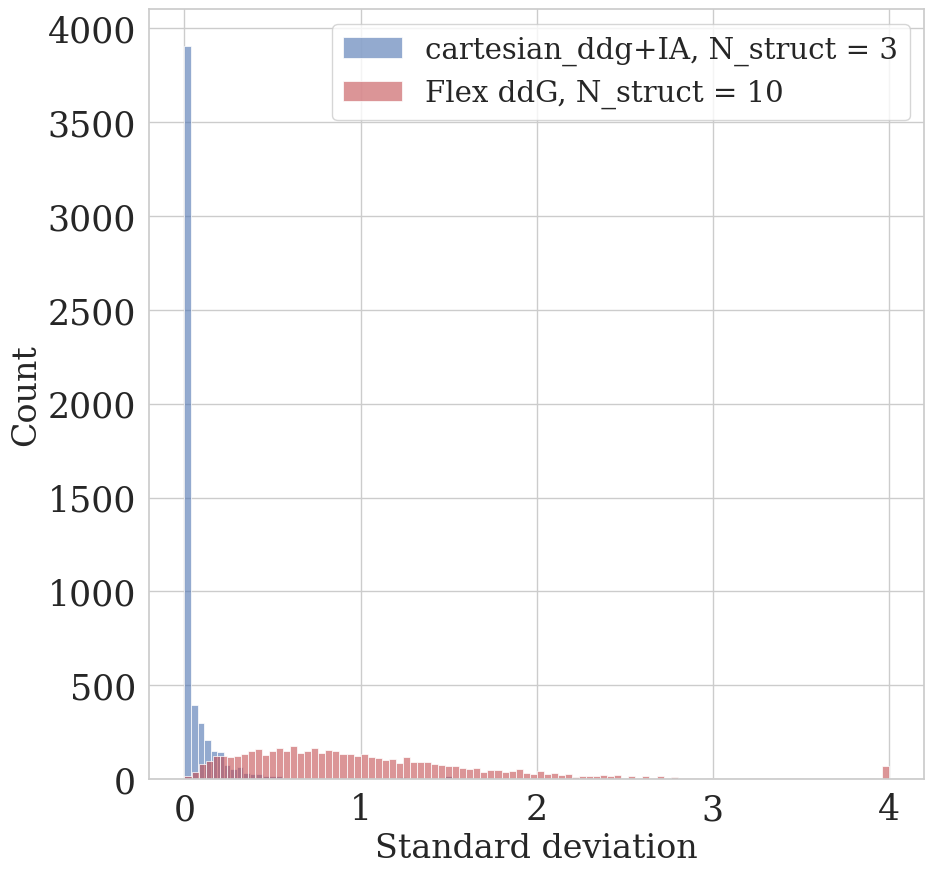

In [61]:
df=SkempiMAX_cart_flex.copy()
df.loc[df['std']>4, 'std'] = 4
fig= plt.figure(figsize=(10, 10))

# sns.histplot(data=df, x="std_ddG_infc", bins=200, color='b', alpha = 0.6, log_scale=True, label='cartesian_ddg+IA, N_struct = 3')
# sns.histplot(data=df, x="std", bins=200, color='r', alpha = 0.6, log_scale=True, label='Flex ddG, N_struct = 10')

sns.histplot(data=df, x="std_ddG_infc", bins=100, color='b', alpha = 0.6, label='cartesian_ddg+IA, N_struct = 3')
sns.histplot(data=df, x="std", bins=100, color='r', alpha = 0.6, label='Flex ddG, N_struct = 10')

plt.xlabel('Standard deviation')

plt.legend(fontsize=21)
#plt.savefig("Figures/ddG_bind_dist_Felx_Exp_new.pdf", format='pdf')

In [16]:
sing = SkempiMAX_cart_flex.loc[SkempiMAX_cart_flex['N_mut']=='1'].copy()
sing['interface'] = True 
sing.loc[sing['iMutation_Location(s)'].isin(['SUR', 'INT']), 'interface'] = False

In [20]:
SkempiMAX_cart_flex['interaction_strength'].value_counts()

interaction_strength
strong      2592
moderate    2224
weak         907
Name: count, dtype: int64

In [19]:
print('INTERFACE')
print(len(sing.loc[sing['interface']]))
for m in ['mean_ddG', 'mean_ddG_infc', 'flex_ddg', 'flex_ddg_gam']:
    subset = sing.dropna(subset=[m]).copy()
    subset = subset.loc[subset['interface']]

    print(m)
    
    rp, pp = stats.pearsonr(subset['ddG_bind'], subset[m])
    print("Pearson's r: ", rp)
    
    rs, ps = stats.spearmanr(subset['ddG_bind'], subset[m])
    print("Spearman's r: ", rs)
    
    rmse = sqrt(mean_squared_error(subset['ddG_bind'], subset[m]))
    print("RMSE: ", rmse)

    nrmse = sqrt(mean_squared_error(subset['ddG_bind'], subset[m]))/subset[m].std()
    print("nRMSE: ", nrmse)

print('')
print('NOT INTERFACE')
print(len(sing.loc[~sing['interface']]))
for m in ['mean_ddG', 'mean_ddG_infc', 'flex_ddg', 'flex_ddg_gam']:
    subset = sing.dropna(subset=[m]).copy()
    subset = subset.loc[~subset['interface']]

    print(m)
    
    rp, pp = stats.pearsonr(subset['ddG_bind'], subset[m])
    print("Pearson's r: ", rp)
    
    rs, ps = stats.spearmanr(subset['ddG_bind'], subset[m])
    print("Spearman's r: ", rs)
    
    rmse = sqrt(mean_squared_error(subset['ddG_bind'], subset[m]))
    print("RMSE: ", rmse)

    nrmse = sqrt(mean_squared_error(subset['ddG_bind'], subset[m]))/subset[m].std()
    print("nRMSE: ", nrmse)

INTERFACE
3187
mean_ddG
Pearson's r:  0.396092685577518
Spearman's r:  0.4094091879794512
RMSE:  1.9699057122325705
nRMSE:  1.1728552946080217
mean_ddG_infc
Pearson's r:  0.40268277398983854
Spearman's r:  0.4017091073311172
RMSE:  1.9132679572370233
nRMSE:  1.4355854683220166
flex_ddg
Pearson's r:  0.407318544108061
Spearman's r:  0.418079882162436
RMSE:  1.932601150773739
nRMSE:  1.2087268914544835
flex_ddg_gam
Pearson's r:  0.42762981771487457
Spearman's r:  0.3973247742844664
RMSE:  1.8108625749717802
nRMSE:  1.3706358129699434

NOT INTERFACE
881
mean_ddG
Pearson's r:  0.24809363041306454
Spearman's r:  0.1847629685338814
RMSE:  1.5858529031537578
nRMSE:  1.1872206877878426
mean_ddG_infc
Pearson's r:  0.0573490512130828
Spearman's r:  0.08256512444508995
RMSE:  0.6577853316644644
nRMSE:  2.0971736577571596
flex_ddg
Pearson's r:  0.12902371437266258
Spearman's r:  0.08841555949561127
RMSE:  0.6103309090197062
nRMSE:  2.492931713576607
flex_ddg_gam
Pearson's r:  0.15017887754479478
S

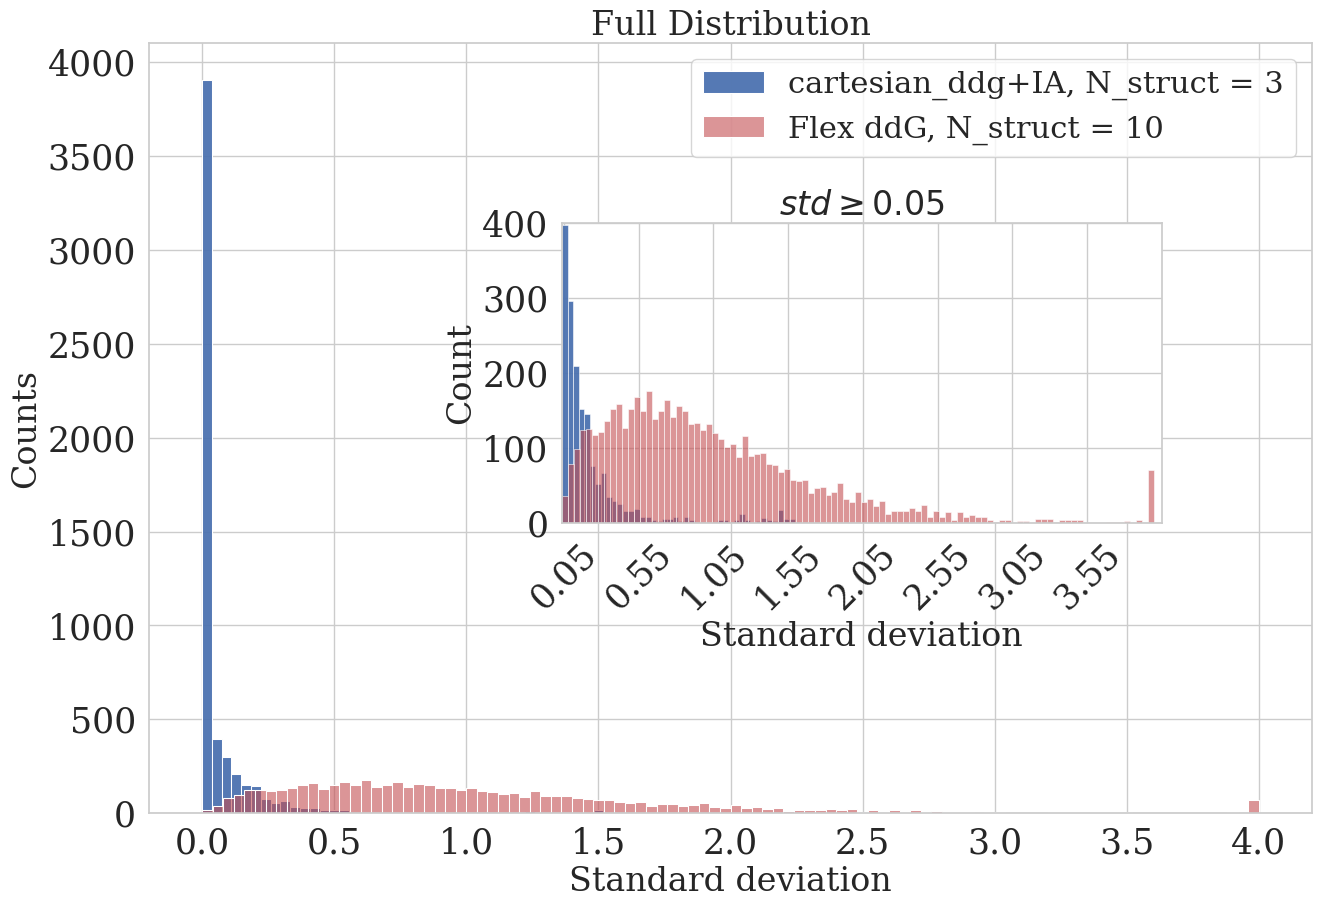

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 1, figsize=(15, 10))
df=SkempiMAX_cart_flex.copy()
df.loc[df['std']>4, 'std'] = 4
# 1. Main plot for the full dataset (showing the large N_mut=1 bar)
sns.histplot(data=df, x="std_ddG_infc", bins=100, color='b', alpha = 0.95, label='cartesian_ddg+IA, N_struct = 3', ax=axes)
sns.histplot(data=df, x="std", bins=100, color='r', alpha = 0.6, label='Flex ddG, N_struct = 10', ax=axes)
axes.set_title('Full Distribution')
axes.set_ylabel('Counts')
axes.set_xlabel('Standard deviation')
axes.legend()

# --- 2. Create the Inset Plot ---
# Determine the position of the inset plot (e.g., in the top-right corner)
left, bottom, width, height = [0.4, 0.4, 0.4, 0.3] 
ax_inset = fig.add_axes([left, bottom, width, height])

# Filter the data for the inset: N_mut > 1
# df_inset = df[df['N_mut'] > 4] 

# Plot the filtered data on the inset axis
sns.histplot(data=df, x="std_ddG_infc", bins=100, color='b', alpha = 0.95, ax=ax_inset)
sns.histplot(data=df, x="std", bins=100, color='r', alpha = 0.6, ax=ax_inset)
ax_inset.set_xlim(0.035, 4.05)
ax_inset.set_ylim(0, 400)
ax_inset.set_xticks(np.arange(0.05, 4, 0.5))

# Customize the inset axis for clarity
ax_inset.set_title('$std \geq 0.05$')
ax_inset.set_xlabel('Standard deviation')
ax_inset.set_ylabel('Count')
ax_inset.tick_params(axis='x', rotation=45) # Rotate x-labels for clarity

plt.savefig('Figures/stds_hist.pdf', format='pdf')

In [8]:
SkempiMAX_cart_flex.loc[SkempiMAX_cart_flex['N_mut']=='1']['ddG_bind'].median()

0.5308118754247966

In [10]:
SkempiMAX_cart_flex.loc[SkempiMAX_cart_flex['N_mut']=='2']['ddG_bind'].median()

1.6666562623301546

In [11]:
SkempiMAX_cart_flex.loc[SkempiMAX_cart_flex['N_mut']=='3+']['ddG_bind'].median()

1.3730837692409263

In [9]:
len(SkempiMAX_cart_flex.loc[SkempiMAX_cart_flex['N_mut']=='3+'])

865

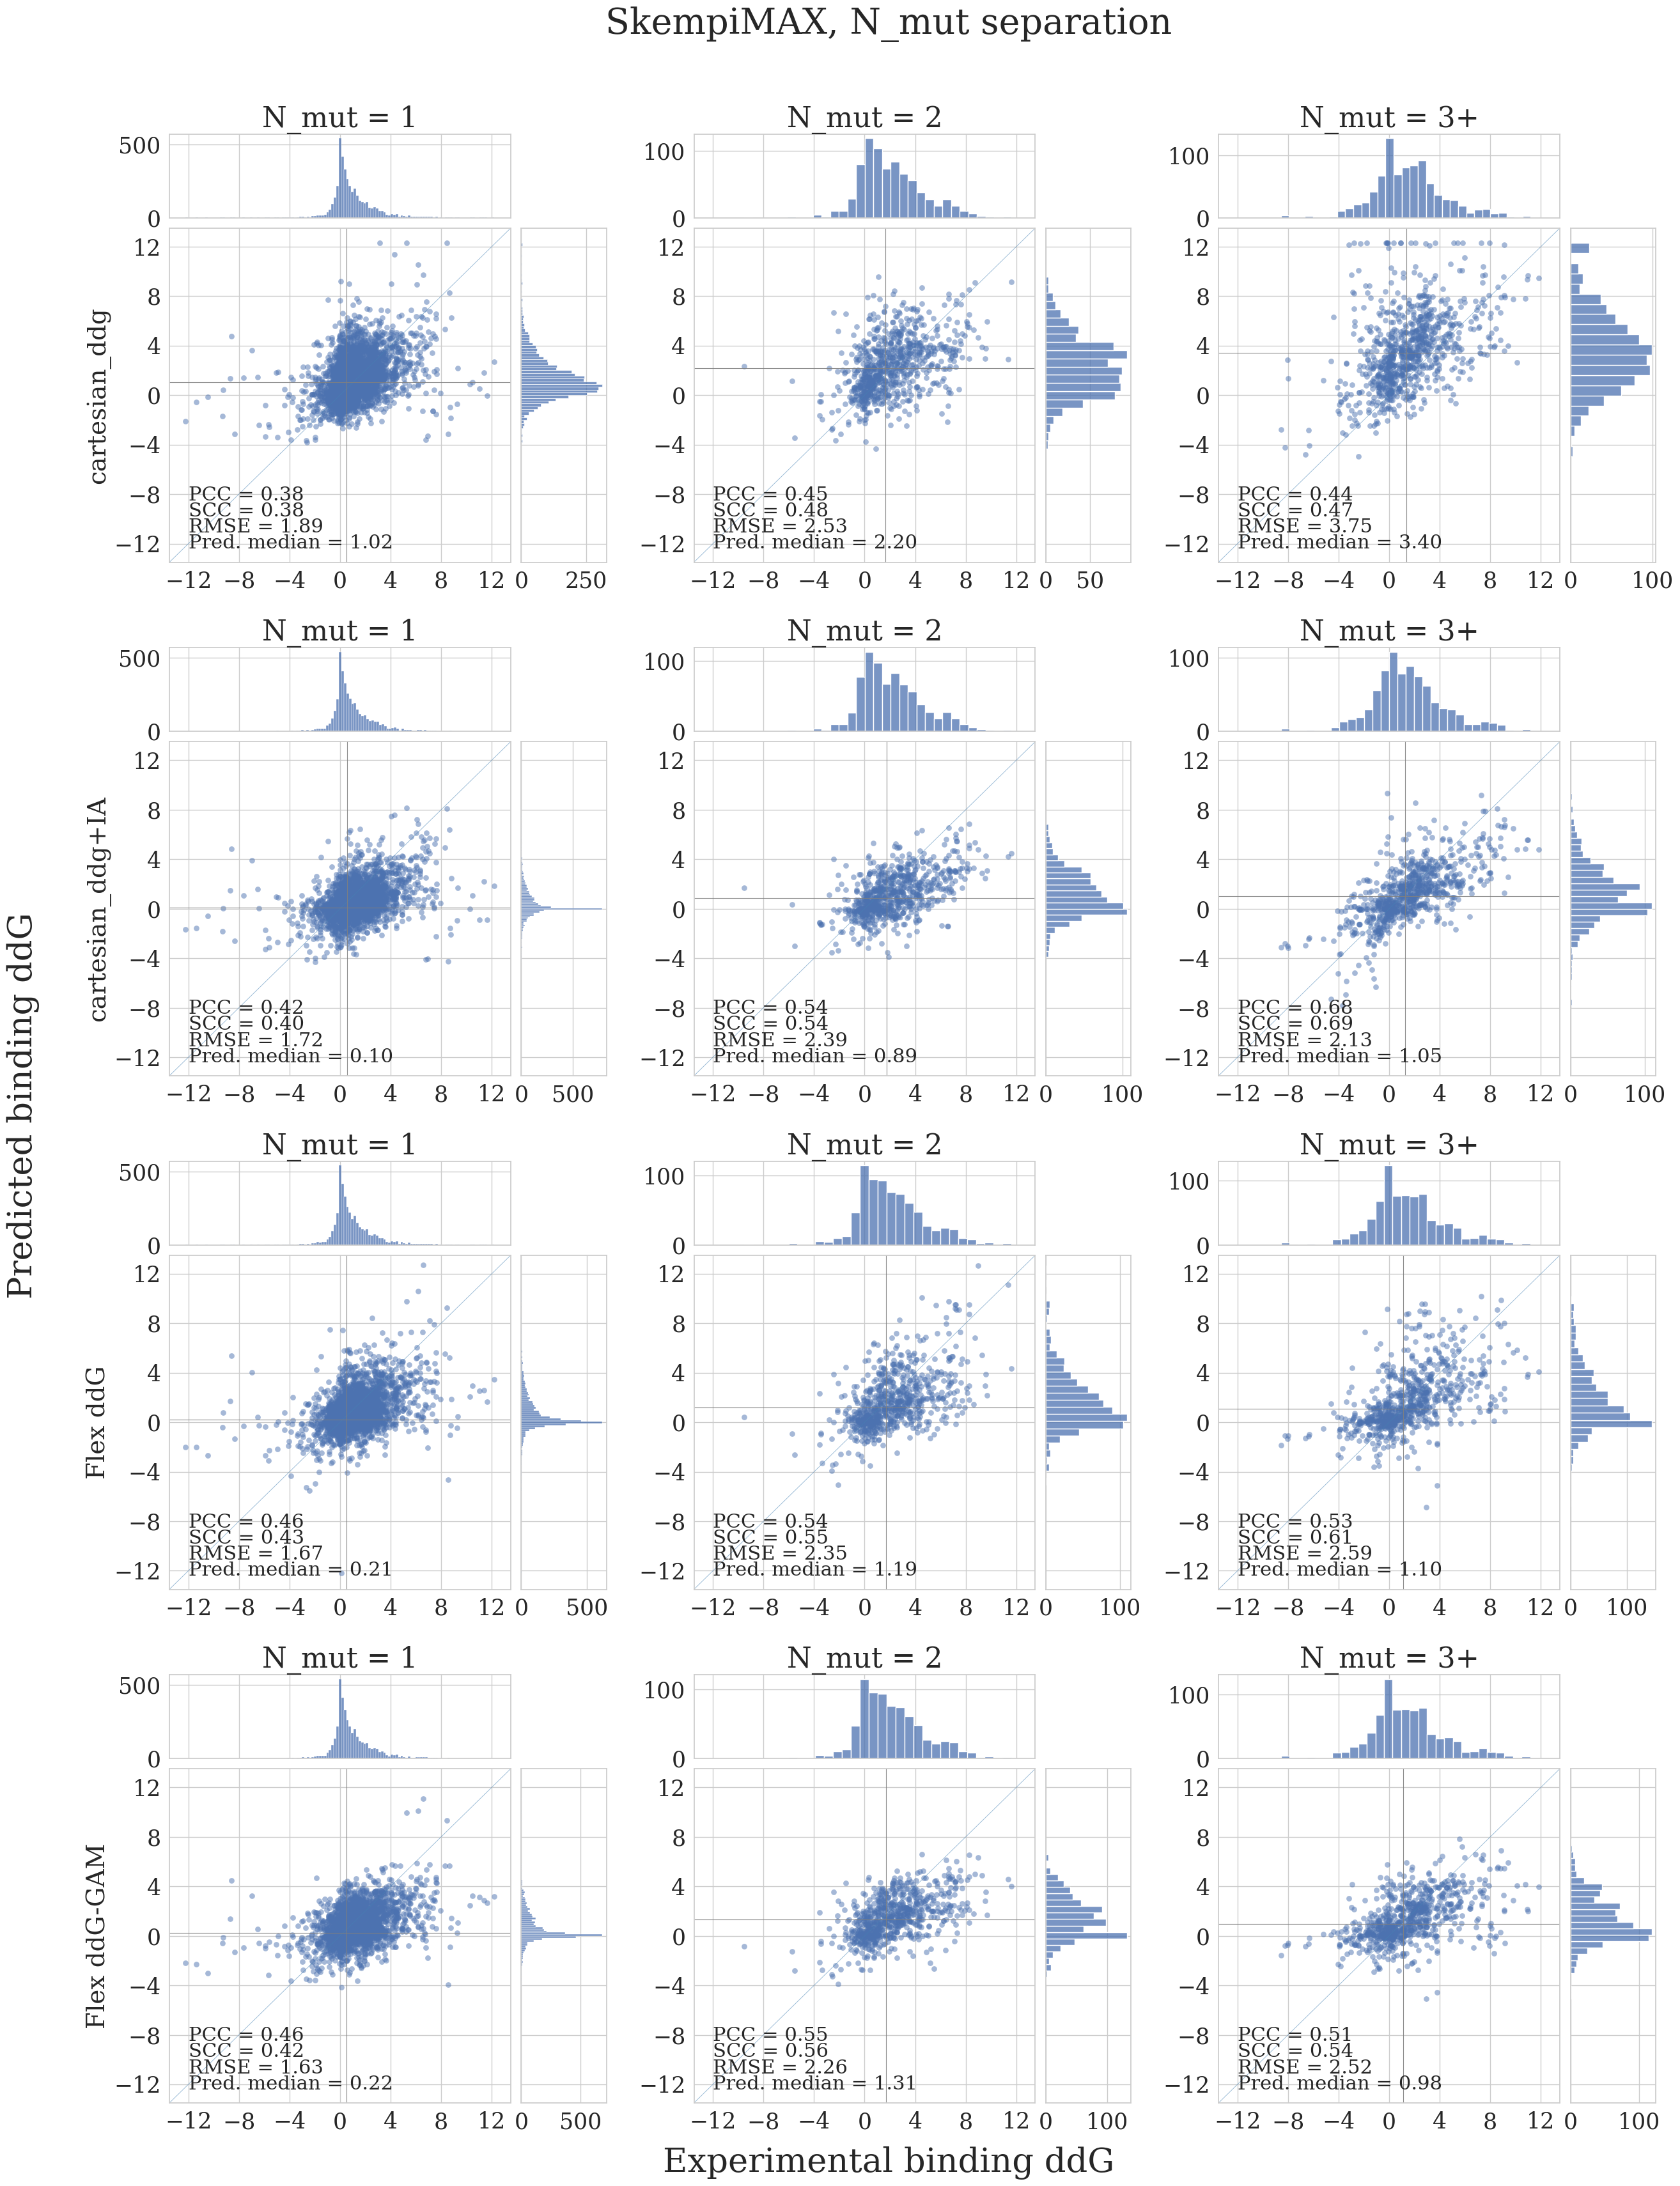

In [48]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from scipy import stats
from sklearn.metrics import mean_squared_error
from math import sqrt

fig_path = '/groups/sbinlab/panf/SKEMPIv2_benchmark/Figures'
methods_suppl_plot = {'mean_ddG': 'cartesian_ddg',
                      'mean_ddG_infc': 'cartesian_ddg+IA',
                      'flex_ddg': 'Flex ddG',
                      'flex_ddg_gam': 'Flex ddG-GAM'}
df = SkempiMAX_cart_flex.copy()

# Create the main figure
fig = plt.figure(figsize=(30, 40))

# Create a 2x2 GridSpec for the overall layout
outer_grid = gridspec.GridSpec(4, 3, figure=fig, wspace=0.2, hspace=0.2)

# Loop through the methods and the grid locations
for i, meth in enumerate(methods_suppl_plot.keys()):
    # Create a nested GridSpec for each plot (scatter + marginals)
    # Define ratios to make the central plot larger than the marginals
    
    # for b in [False, True]:
    #     if not b:
    #         ib = i*2
    #     else:
    #         ib = (i*2)+1
    
    for b in SkempiMAX_cart_flex.N_mut.unique():
        if b == '1':
            ib = i*3
        elif b =='2':
            ib = (i*3)+1
        else:
            ib = (i*3)+2
    
        inner_grid = gridspec.GridSpecFromSubplotSpec(2, 2, subplot_spec=outer_grid[ib],
                                                      width_ratios=(4, 1), height_ratios=(1, 4),
                                                      wspace=0.05, hspace=0.05)
    
        # Create axes from the inner grid
        ax_scatter = fig.add_subplot(inner_grid[1, 0])
        ax_histx = fig.add_subplot(inner_grid[0, 0], sharex=ax_scatter)
        ax_histy = fig.add_subplot(inner_grid[1, 1], sharey=ax_scatter)
    
        # Remove tick labels from the marginal histograms for a cleaner look
        ax_histx.tick_params(axis="x", labelbottom=False)
        ax_histy.tick_params(axis="y", labelleft=False)
    
        # --- Plotting Section ---
        subset = df.dropna(subset=[meth]).copy()
        #subset = subset.loc[subset['small-to-large']==b]
        subset = subset.loc[subset['N_mut']==b]
    
        # Main scatter plot (on the central axis)
        sns.scatterplot(data=subset, x='ddG_bind', y=meth,
                        alpha=0.5, s=40, linewidth=0,
                        ax=ax_scatter)
    
        # Marginal histograms
        sns.histplot(data=subset, x='ddG_bind', ax=ax_histx, kde=False)
        sns.histplot(data=subset, y=meth, ax=ax_histy, kde=False)
        
        # Remove the "Count" labels from the histograms
        ax_histx.set_ylabel('')
        ax_histy.set_xlabel('')
    
        # --- Original Formatting and Annotation ---
        # Set shared limits for the scatter plot
        # ax_scatter.set_xlim(-0.5, 5)
        # ax_scatter.set_ylim(-0.5, 5)
        ax_scatter.set_xlim(-13.5, 13.5)
        ax_scatter.set_ylim(-13.5, 13.5)
        ax_scatter.set_xticks(np.arange(-12, 16, 4))
        ax_scatter.set_yticks(np.arange(-12, 16, 4))
        
        # Add diagonal and median lines to the scatter plot
        ax_scatter.plot([-15, 15], [-15, 15], color='steelblue', ls='-', lw=0.6, alpha=0.6)
        ax_scatter.axhline(subset[meth].median(), color='gray', ls='-', lw=0.8, alpha=0.9)
        ax_scatter.axvline(subset['ddG_bind'].median(), color='gray', ls='-', lw=0.8, alpha=0.9)
    
        # Add statistical annotations to the scatter plot
        #ax_scatter.annotate(f'Sample size = {len(subset)}', xy=(2.0, -0.8), fontsize=20)
        r, _ = stats.pearsonr(subset['ddG_bind'], subset[meth])
        ax_scatter.annotate(f'PCC = {r:.2f}', xy=(-12, -8.5), fontsize=22)
        r, _ = stats.spearmanr(subset['ddG_bind'], subset[meth])
        ax_scatter.annotate(f'SCC = {r:.2f}', xy=(-12, -9.8), fontsize=22)
        rmse = sqrt(mean_squared_error(subset['ddG_bind'], subset[meth]))
        ax_scatter.annotate(f'RMSE = {rmse:.2f}', xy=(-12, -11.1), fontsize=22)
        ax_scatter.annotate(f'Pred. median = {subset[meth].median():.2f}', xy=(-12, -12.4), fontsize=22)
        
        # Set individual plot titles and remove inner labels
        # if not b:
        #     ax_scatter.set_ylabel(f'{methods_suppl_plot[meth]}', fontsize=28)
        #     #ax_scatter.set_title('Large-to-small or equal')
        #     ax_histx.set_title('Large-to-small or equal', fontsize=28)
        # else:
        #     ax_scatter.set_ylabel('')
        #     #ax_scatter.set_title('Small-to-large')
        #     ax_histx.set_title('Small-to-large', fontsize=28)

        if b == '1':
            ax_scatter.set_ylabel(f'{methods_suppl_plot[meth]}', fontsize=28)
            ax_histx.set_title('N_mut = 1', fontsize=32)
        elif  b == '2':
            ax_scatter.set_ylabel('')
            ax_histx.set_title('N_mut = 2', fontsize=32)
        else:
            ax_scatter.set_ylabel('')
            ax_histx.set_title('N_mut = 3+', fontsize=32)
            
        ax_scatter.set_xlabel("")
        # ax_scatter.set_title(f'{methods_suppl_plot[meth]}', fontsize=28)

# --- Final Figure-Level Adjustments ---
fig.suptitle('SkempiMAX, N_mut separation', fontsize=40, y=0.93)

# Set the single X and Y labels for the entire figure
fig.supxlabel("Experimental binding ddG", fontsize=38, y=0.08)
fig.supylabel("Predicted binding ddG", fontsize=38, x=0.04)

# # Adjust layout to prevent labels from overlapping
#plt.tight_layout(rect=[0.03, 0.03, 1, 0.97])

plt.savefig(os.path.join(fig_path, 'SkempiMAX_carts_flexs_marg_Nmut.pdf'), format='pdf')
# plt.show()

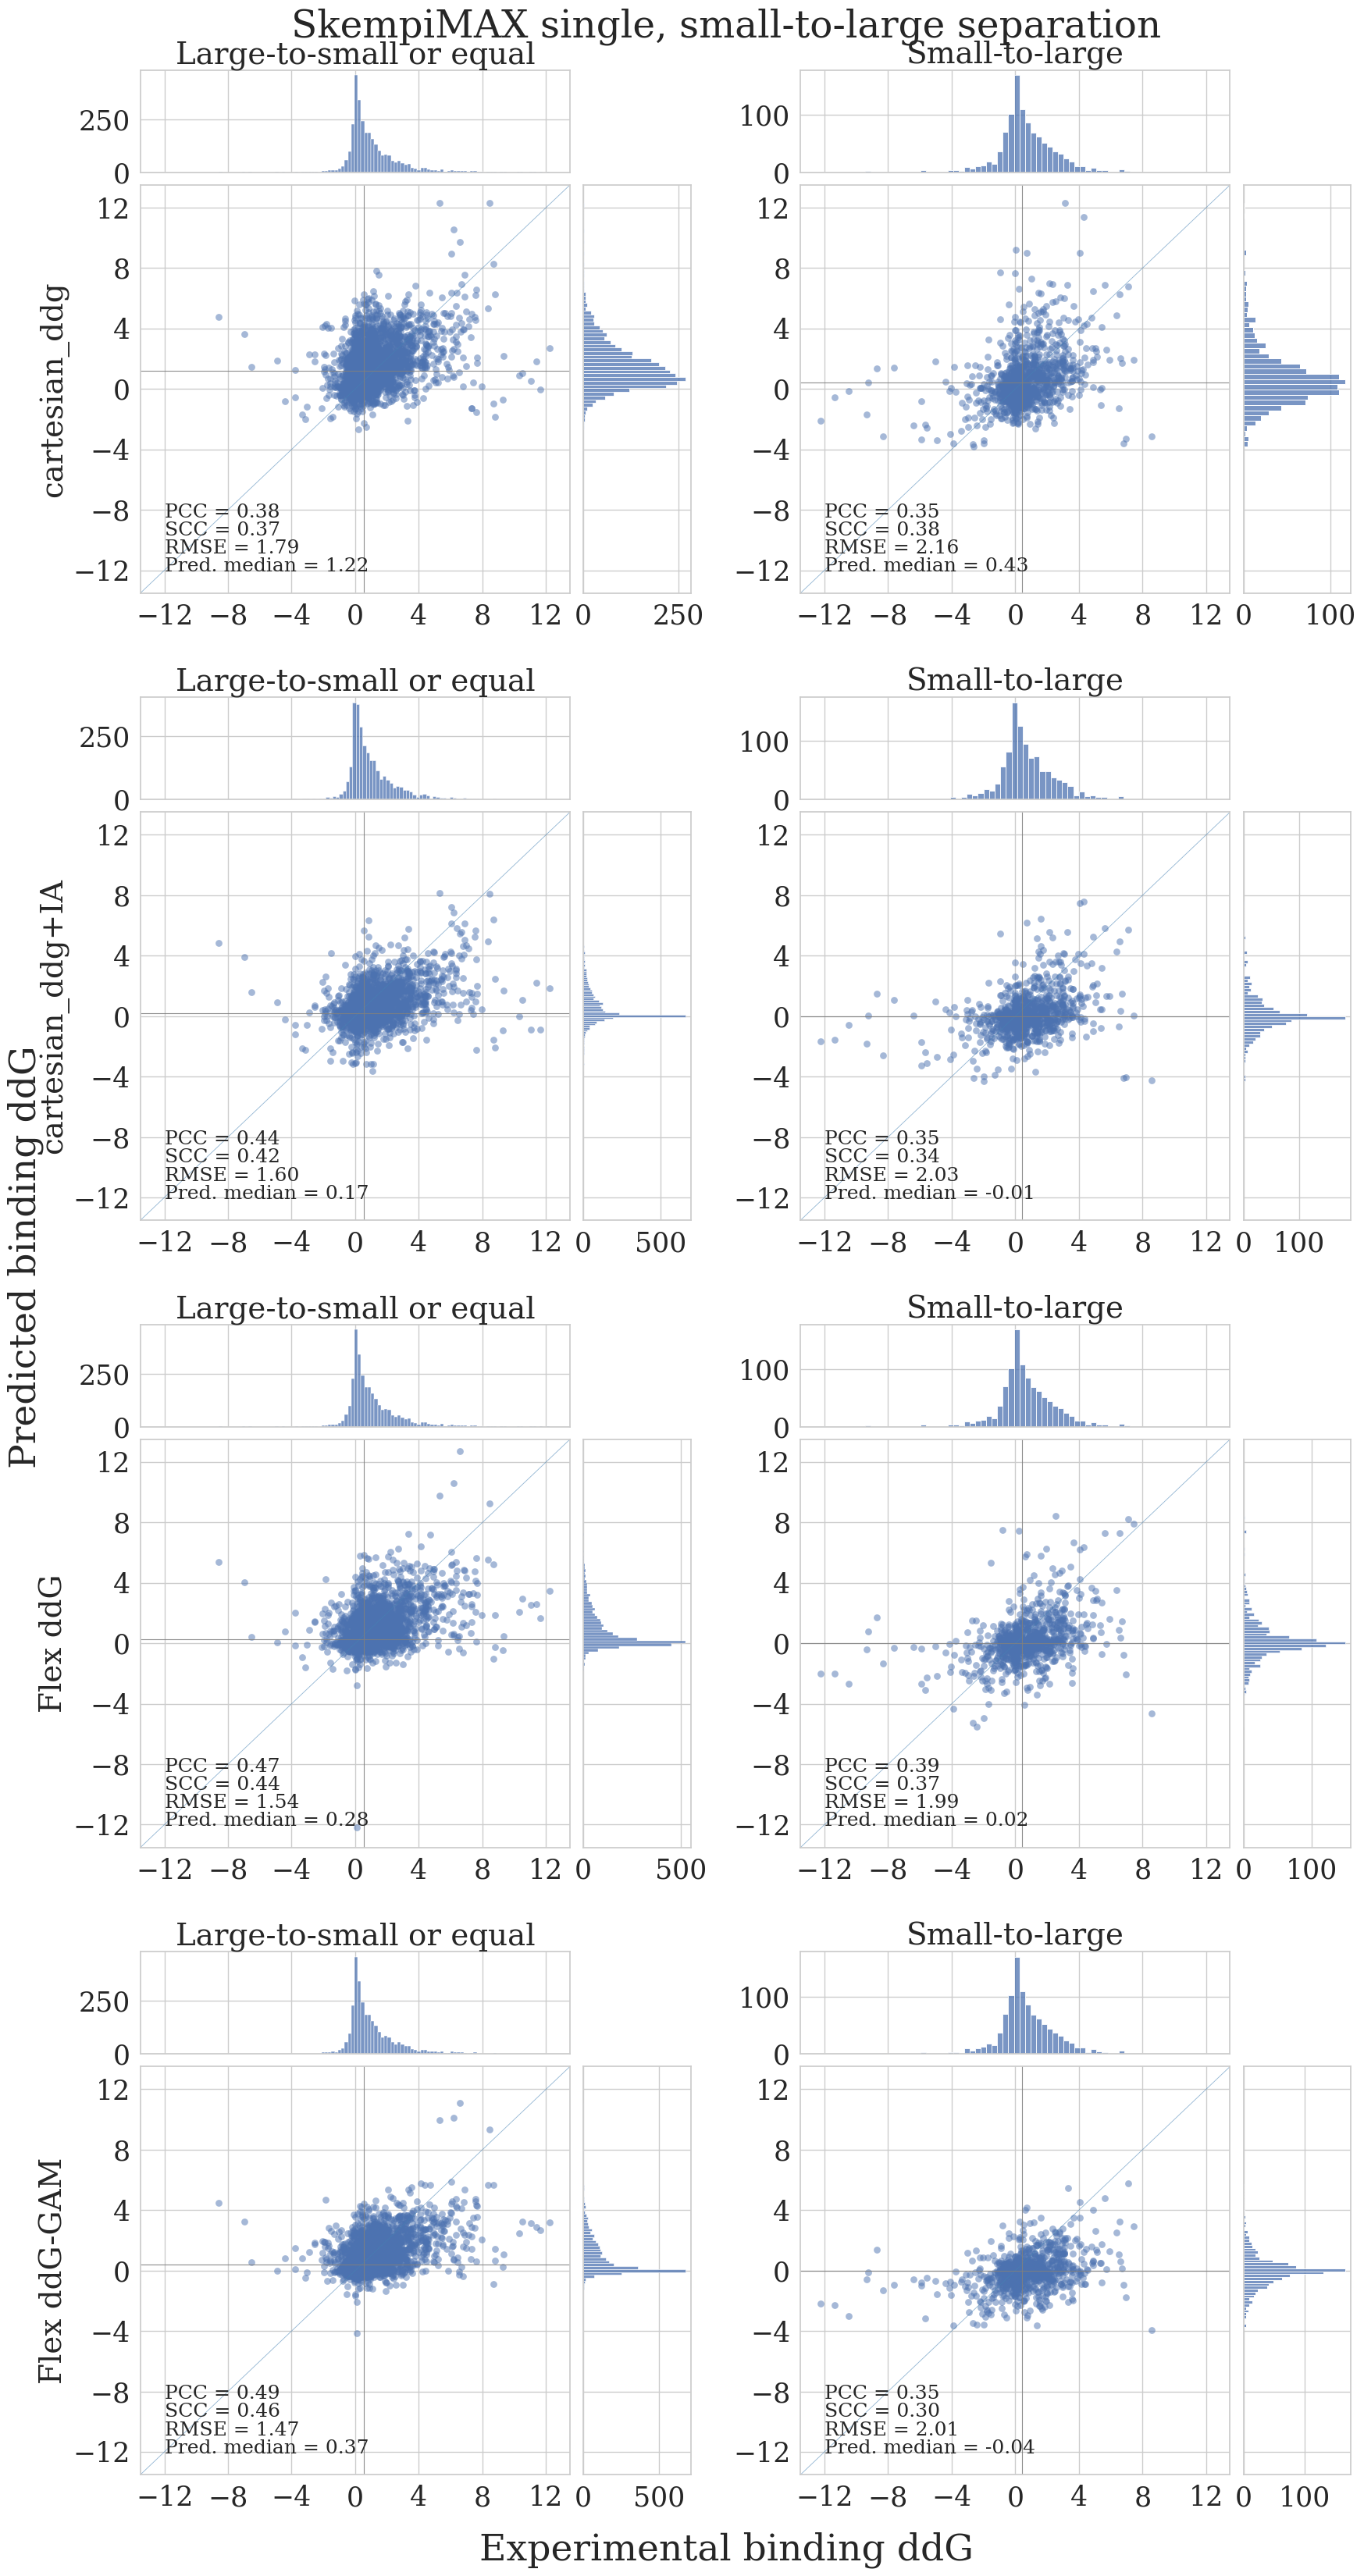

In [60]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from scipy import stats
from sklearn.metrics import mean_squared_error
from math import sqrt

fig_path = '/groups/sbinlab/panf/SKEMPIv2_benchmark/Figures'
methods_suppl_plot = {'mean_ddG': 'cartesian_ddg',
                      'mean_ddG_infc': 'cartesian_ddg+IA',
                      'flex_ddg': 'Flex ddG',
                      'flex_ddg_gam': 'Flex ddG-GAM'}

df = SkempiMAX_cart_flex.loc[SkempiMAX_cart_flex['N_mut']=='1'].copy()

# Create the main figure
fig = plt.figure(figsize=(20, 40))

# Create a 2x2 GridSpec for the overall layout
outer_grid = gridspec.GridSpec(4, 2, figure=fig, wspace=0.2, hspace=0.2)

# Loop through the methods and the grid locations
for i, meth in enumerate(methods_suppl_plot.keys()):
    # Create a nested GridSpec for each plot (scatter + marginals)
    # Define ratios to make the central plot larger than the marginals
    for b in [False, True]:
        if not b:
            ib = i*2
        else:
            ib = (i*2)+1
        inner_grid = gridspec.GridSpecFromSubplotSpec(2, 2, subplot_spec=outer_grid[ib],
                                                      width_ratios=(4, 1), height_ratios=(1, 4),
                                                      wspace=0.05, hspace=0.05)
    
        # Create axes from the inner grid
        ax_scatter = fig.add_subplot(inner_grid[1, 0])
        ax_histx = fig.add_subplot(inner_grid[0, 0], sharex=ax_scatter)
        ax_histy = fig.add_subplot(inner_grid[1, 1], sharey=ax_scatter)
    
        # Remove tick labels from the marginal histograms for a cleaner look
        ax_histx.tick_params(axis="x", labelbottom=False)
        ax_histy.tick_params(axis="y", labelleft=False)
    
        # --- Plotting Section ---
        subset = df.dropna(subset=[meth]).copy()
        subset = subset.loc[subset['small-to-large']==b]
    
        # Main scatter plot (on the central axis)
        sns.scatterplot(data=subset, x='ddG_bind', y=meth,
                        alpha=0.5, s=40, linewidth=0,
                        ax=ax_scatter)
    
        # Marginal histograms
        sns.histplot(data=subset, x='ddG_bind', ax=ax_histx, kde=False)
        sns.histplot(data=subset, y=meth, ax=ax_histy, kde=False)
        
        # Remove the "Count" labels from the histograms
        ax_histx.set_ylabel('')
        ax_histy.set_xlabel('')
    
        # --- Original Formatting and Annotation ---
        # Set shared limits for the scatter plot
        # ax_scatter.set_xlim(-0.5, 5)
        # ax_scatter.set_ylim(-0.5, 5)
        ax_scatter.set_xlim(-13.5, 13.5)
        ax_scatter.set_ylim(-13.5, 13.5)
        ax_scatter.set_xticks(np.arange(-12, 16, 4))
        ax_scatter.set_yticks(np.arange(-12, 16, 4))
        
        # Add diagonal and median lines to the scatter plot
        ax_scatter.plot([-15, 15], [-15, 15], color='steelblue', ls='-', lw=0.6, alpha=0.6)
        ax_scatter.axhline(subset[meth].median(), color='gray', ls='-', lw=0.8, alpha=0.9)
        ax_scatter.axvline(subset['ddG_bind'].median(), color='gray', ls='-', lw=0.8, alpha=0.9)
    
        # Add statistical annotations to the scatter plot
        #ax_scatter.annotate(f'Sample size = {len(subset)}', xy=(2.0, -0.8), fontsize=20)
        r, _ = stats.pearsonr(subset['ddG_bind'], subset[meth])
        ax_scatter.annotate(f'PCC = {r:.2f}', xy=(-12, -8.5), fontsize=18)
        r, _ = stats.spearmanr(subset['ddG_bind'], subset[meth])
        ax_scatter.annotate(f'SCC = {r:.2f}', xy=(-12, -9.7), fontsize=18)
        rmse = sqrt(mean_squared_error(subset['ddG_bind'], subset[meth]))
        ax_scatter.annotate(f'RMSE = {rmse:.2f}', xy=(-12, -10.9), fontsize=18)
        ax_scatter.annotate(f'Pred. median = {subset[meth].median():.2f}', xy=(-12, -12.1), fontsize=18)
        
        # Set individual plot titles and remove inner labels
        if not b:
            ax_scatter.set_ylabel(f'{methods_suppl_plot[meth]}', fontsize=28)
            #ax_scatter.set_title('Large-to-small or equal')
            ax_histx.set_title('Large-to-small or equal', fontsize=28)
        else:
            ax_scatter.set_ylabel('')
            #ax_scatter.set_title('Small-to-large')
            ax_histx.set_title('Small-to-large', fontsize=28)
            
        ax_scatter.set_xlabel("")
        # ax_scatter.set_title(f'{methods_suppl_plot[meth]}', fontsize=28)

# --- Final Figure-Level Adjustments ---
fig.suptitle('SkempiMAX single, small-to-large separation', fontsize=35, y=0.9)

# Set the single X and Y labels for the entire figure
fig.supxlabel("Experimental binding ddG", fontsize=34, y=0.08)
fig.supylabel("Predicted binding ddG", fontsize=34, x=0.04)

# # Adjust layout to prevent labels from overlapping
#plt.tight_layout(rect=[0.03, 0.03, 1, 0.97])

plt.savefig(os.path.join(fig_path, 'SkempiMAX_sing_carts_flexs_stl_marg.pdf'), format='pdf')
# plt.show()

In [56]:
SkempiMAX_cart_flex.type_of_change_infc.unique()

array(['infc to non-infc', 'infc to infc', 'non-infc to infc',
       'non-infc to non-infc', 'mixed'], dtype=object)

In [61]:
df.type_of_change_infc.unique()

array(['infc to non-infc', 'infc to infc', 'non-infc to infc',
       'non-infc to non-infc'], dtype=object)

Text(0.04, 0.5, 'Predicted binding ddG')

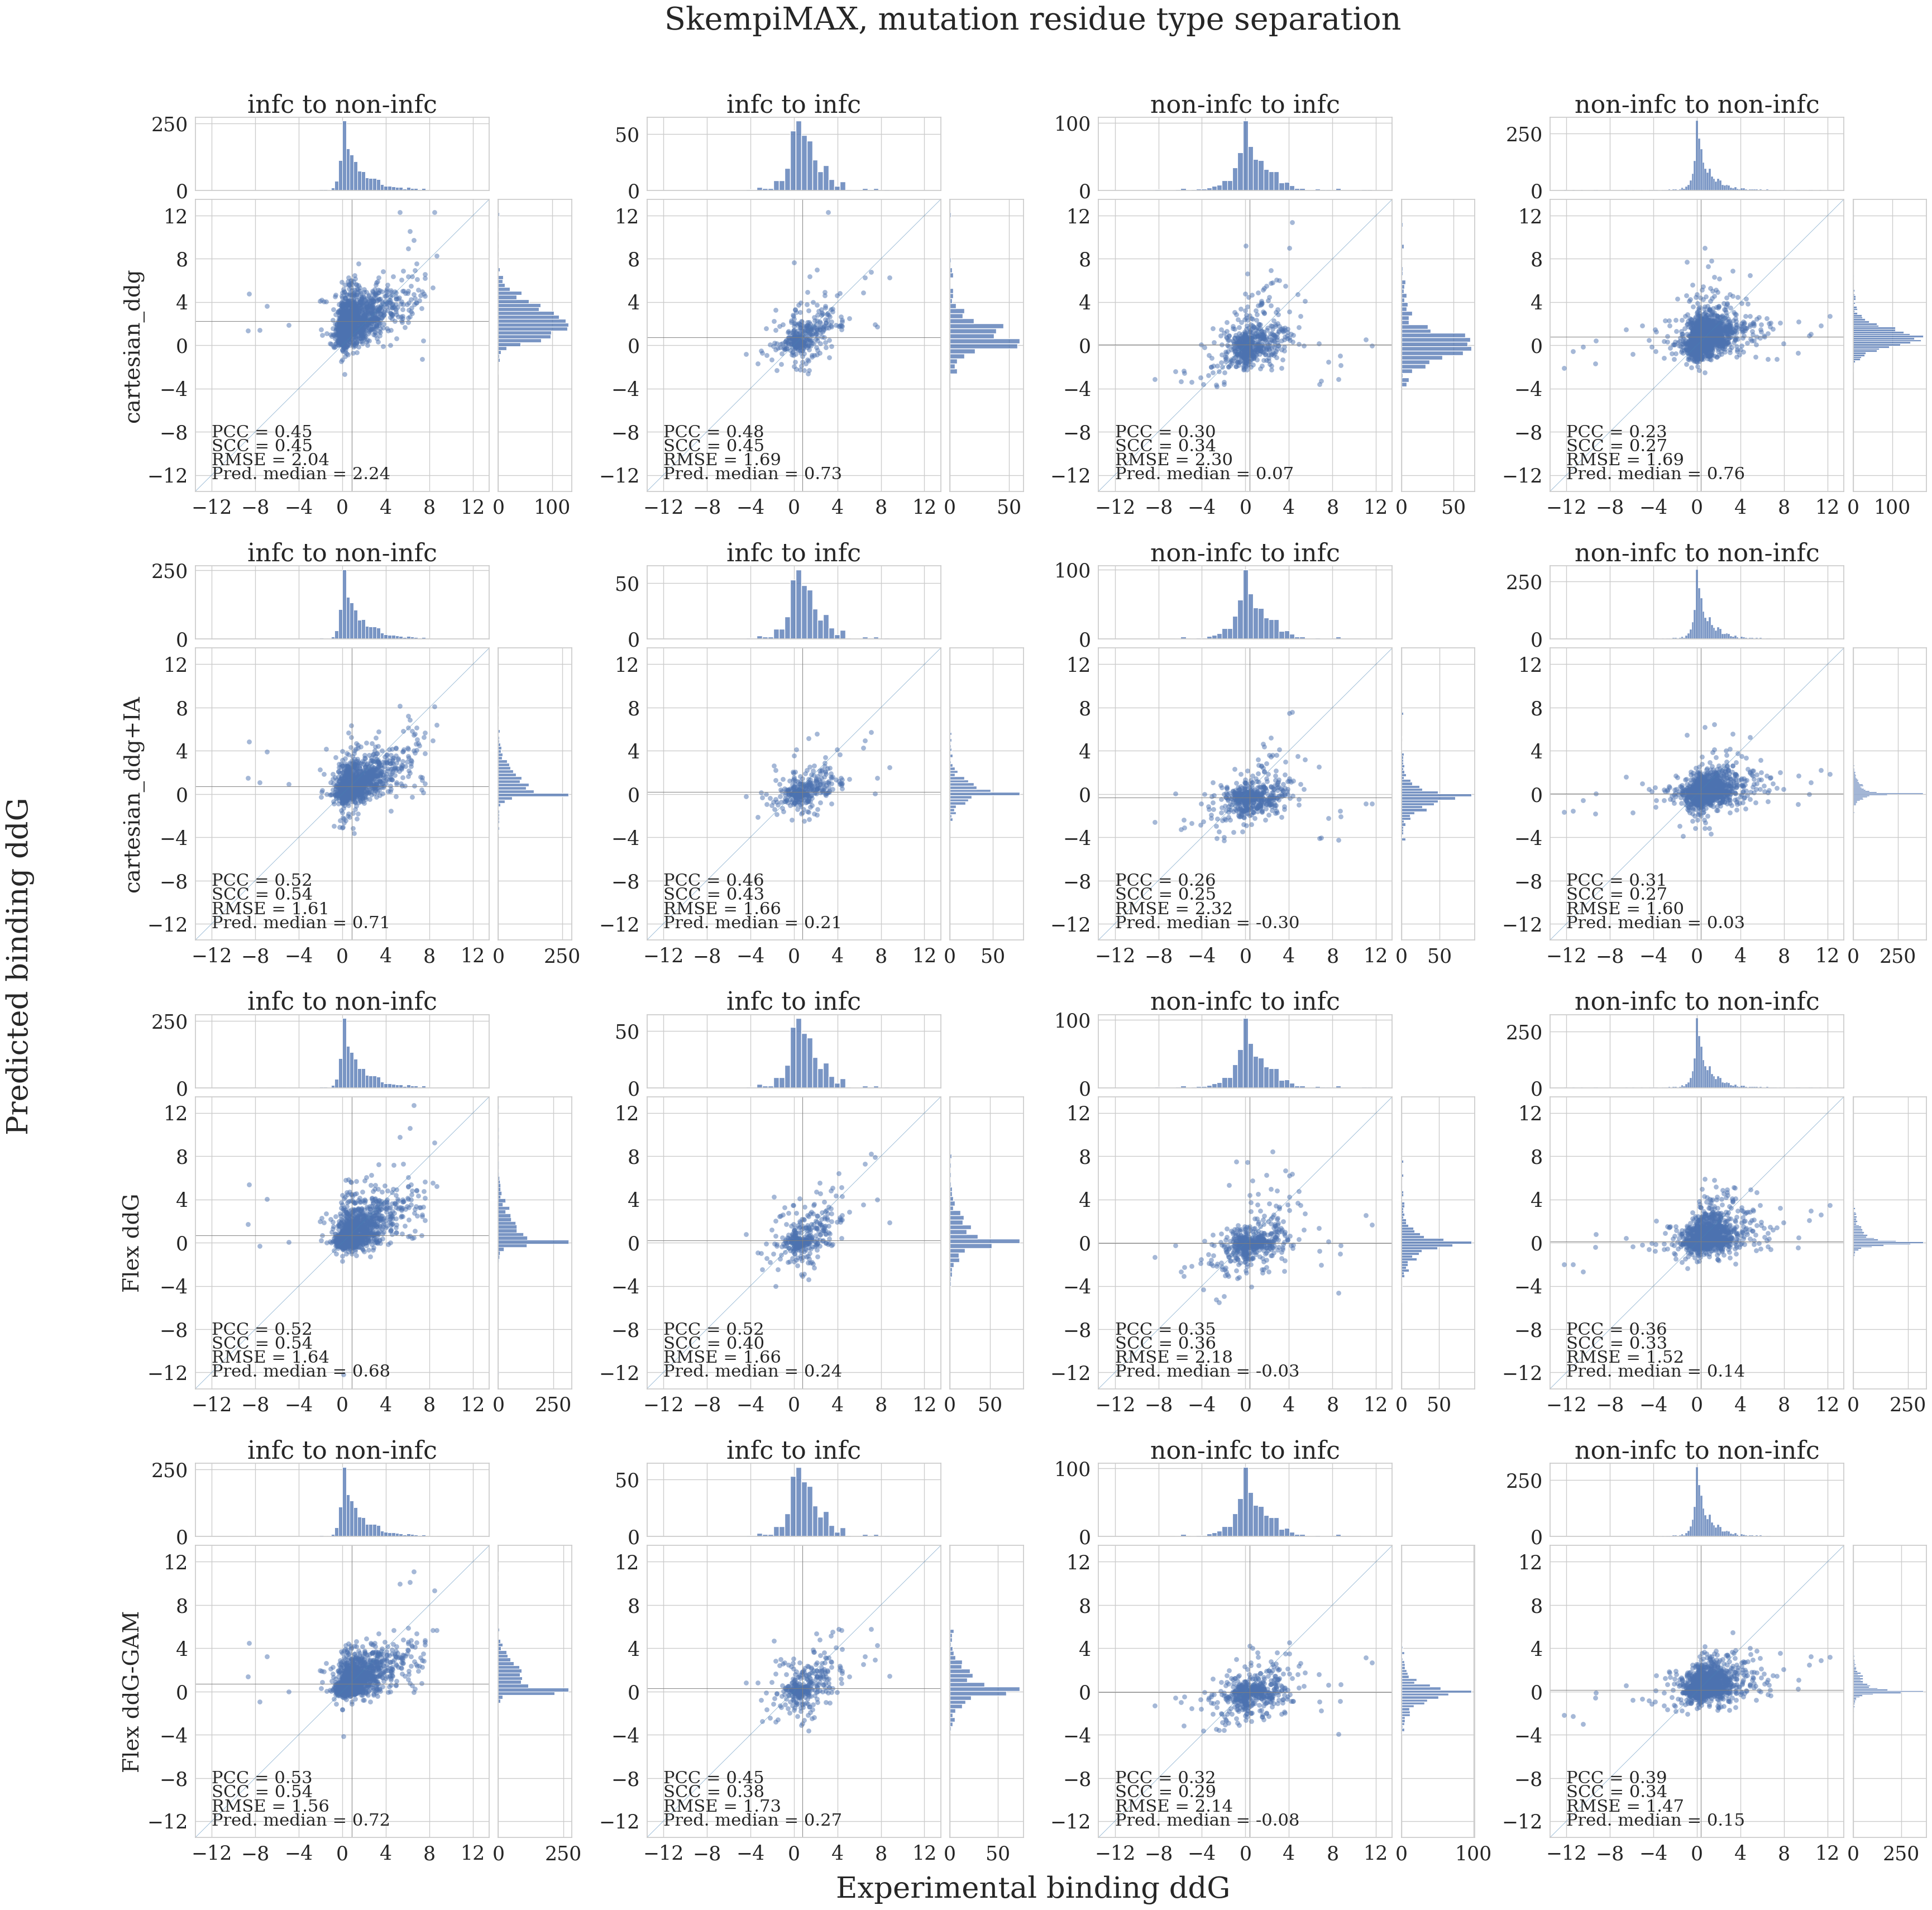

In [64]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from scipy import stats
from sklearn.metrics import mean_squared_error
from math import sqrt

fig_path = '/groups/sbinlab/panf/SKEMPIv2_benchmark/Figures'
methods_suppl_plot = {'mean_ddG': 'cartesian_ddg',
                      'mean_ddG_infc': 'cartesian_ddg+IA',
                      'flex_ddg': 'Flex ddG',
                      'flex_ddg_gam': 'Flex ddG-GAM'}
df = SkempiMAX_cart_flex.loc[SkempiMAX_cart_flex['N_mut']=='1'].copy()

# Create the main figure
fig = plt.figure(figsize=(40, 40))

# Create a 2x2 GridSpec for the overall layout
outer_grid = gridspec.GridSpec(4, 4, figure=fig, wspace=0.2, hspace=0.2)

# Loop through the methods and the grid locations
for i, meth in enumerate(methods_suppl_plot.keys()):
    # Create a nested GridSpec for each plot (scatter + marginals)
    # Define ratios to make the central plot larger than the marginals
    
    # for b in [False, True]:
    #     if not b:
    #         ib = i*2
    #     else:
    #         ib = (i*2)+1
    
    for b in df.type_of_change_infc.unique():
        if b == 'infc to non-infc':
            ib = i*4
        elif b =='infc to infc':
            ib = (i*4)+1
        elif b == 'non-infc to infc':
            ib = (i*4)+2
        else:
            ib = (i*4)+3
    
        inner_grid = gridspec.GridSpecFromSubplotSpec(2, 2, subplot_spec=outer_grid[ib],
                                                      width_ratios=(4, 1), height_ratios=(1, 4),
                                                      wspace=0.05, hspace=0.05)
    
        # Create axes from the inner grid
        ax_scatter = fig.add_subplot(inner_grid[1, 0])
        ax_histx = fig.add_subplot(inner_grid[0, 0], sharex=ax_scatter)
        ax_histy = fig.add_subplot(inner_grid[1, 1], sharey=ax_scatter)
    
        # Remove tick labels from the marginal histograms for a cleaner look
        ax_histx.tick_params(axis="x", labelbottom=False)
        ax_histy.tick_params(axis="y", labelleft=False)
    
        # --- Plotting Section ---
        subset = df.dropna(subset=[meth]).copy()
        #subset = subset.loc[subset['small-to-large']==b]
        #subset = subset.loc[subset['N_mut']==b]
        subset = subset.loc[subset['type_of_change_infc']==b]
    
        # Main scatter plot (on the central axis)
        sns.scatterplot(data=subset, x='ddG_bind', y=meth,
                        alpha=0.5, s=40, linewidth=0,
                        ax=ax_scatter)
    
        # Marginal histograms
        sns.histplot(data=subset, x='ddG_bind', ax=ax_histx, kde=False)
        sns.histplot(data=subset, y=meth, ax=ax_histy, kde=False)
        
        # Remove the "Count" labels from the histograms
        ax_histx.set_ylabel('')
        ax_histy.set_xlabel('')
    
        # --- Original Formatting and Annotation ---
        # Set shared limits for the scatter plot
        # ax_scatter.set_xlim(-0.5, 5)
        # ax_scatter.set_ylim(-0.5, 5)
        ax_scatter.set_xlim(-13.5, 13.5)
        ax_scatter.set_ylim(-13.5, 13.5)
        ax_scatter.set_xticks(np.arange(-12, 16, 4))
        ax_scatter.set_yticks(np.arange(-12, 16, 4))
        
        # Add diagonal and median lines to the scatter plot
        ax_scatter.plot([-15, 15], [-15, 15], color='steelblue', ls='-', lw=0.6, alpha=0.6)
        ax_scatter.axhline(subset[meth].median(), color='gray', ls='-', lw=0.8, alpha=0.9)
        ax_scatter.axvline(subset['ddG_bind'].median(), color='gray', ls='-', lw=0.8, alpha=0.9)
    
        # Add statistical annotations to the scatter plot
        #ax_scatter.annotate(f'Sample size = {len(subset)}', xy=(2.0, -0.8), fontsize=20)
        r, _ = stats.pearsonr(subset['ddG_bind'], subset[meth])
        ax_scatter.annotate(f'PCC = {r:.2f}', xy=(-12, -8.5), fontsize=22)
        r, _ = stats.spearmanr(subset['ddG_bind'], subset[meth])
        ax_scatter.annotate(f'SCC = {r:.2f}', xy=(-12, -9.8), fontsize=22)
        rmse = sqrt(mean_squared_error(subset['ddG_bind'], subset[meth]))
        ax_scatter.annotate(f'RMSE = {rmse:.2f}', xy=(-12, -11.1), fontsize=22)
        ax_scatter.annotate(f'Pred. median = {subset[meth].median():.2f}', xy=(-12, -12.4), fontsize=22)
        
        # Set individual plot titles and remove inner labels
        # if not b:
        #     ax_scatter.set_ylabel(f'{methods_suppl_plot[meth]}', fontsize=28)
        #     #ax_scatter.set_title('Large-to-small or equal')
        #     ax_histx.set_title('Large-to-small or equal', fontsize=28)
        # else:
        #     ax_scatter.set_ylabel('')
        #     #ax_scatter.set_title('Small-to-large')
        #     ax_histx.set_title('Small-to-large', fontsize=28)

        # if b == '1':
        #     ax_scatter.set_ylabel(f'{methods_suppl_plot[meth]}', fontsize=28)
        #     ax_histx.set_title('N_mut = 1', fontsize=32)
        # elif  b == '2':
        #     ax_scatter.set_ylabel('')
        #     ax_histx.set_title('N_mut = 2', fontsize=32)
        # else:
        #     ax_scatter.set_ylabel('')
        #     ax_histx.set_title('N_mut = 3+', fontsize=32)

        if b == 'infc to non-infc':
            ax_scatter.set_ylabel(f'{methods_suppl_plot[meth]}', fontsize=28)
            ax_histx.set_title(b, fontsize=32)
        else:
            ax_scatter.set_ylabel('')
            ax_histx.set_title(b, fontsize=32)

        ax_scatter.set_xlabel("")
        # ax_scatter.set_title(f'{methods_suppl_plot[meth]}', fontsize=28)

# --- Final Figure-Level Adjustments ---
fig.suptitle('SkempiMAX, mutation residue type separation', fontsize=40, y=0.93)

# Set the single X and Y labels for the entire figure
fig.supxlabel("Experimental binding ddG", fontsize=38, y=0.08)
fig.supylabel("Predicted binding ddG", fontsize=38, x=0.04)

# # Adjust layout to prevent labels from overlapping
#plt.tight_layout(rect=[0.03, 0.03, 1, 0.97])

#plt.savefig(os.path.join(fig_path, 'SkempiMAX_carts_flexs_marg_infc.pdf'), format='pdf')
# plt.show()

Text(0.5, 0.98, 'Cartesian ddG + InterfaceAnalyzer')

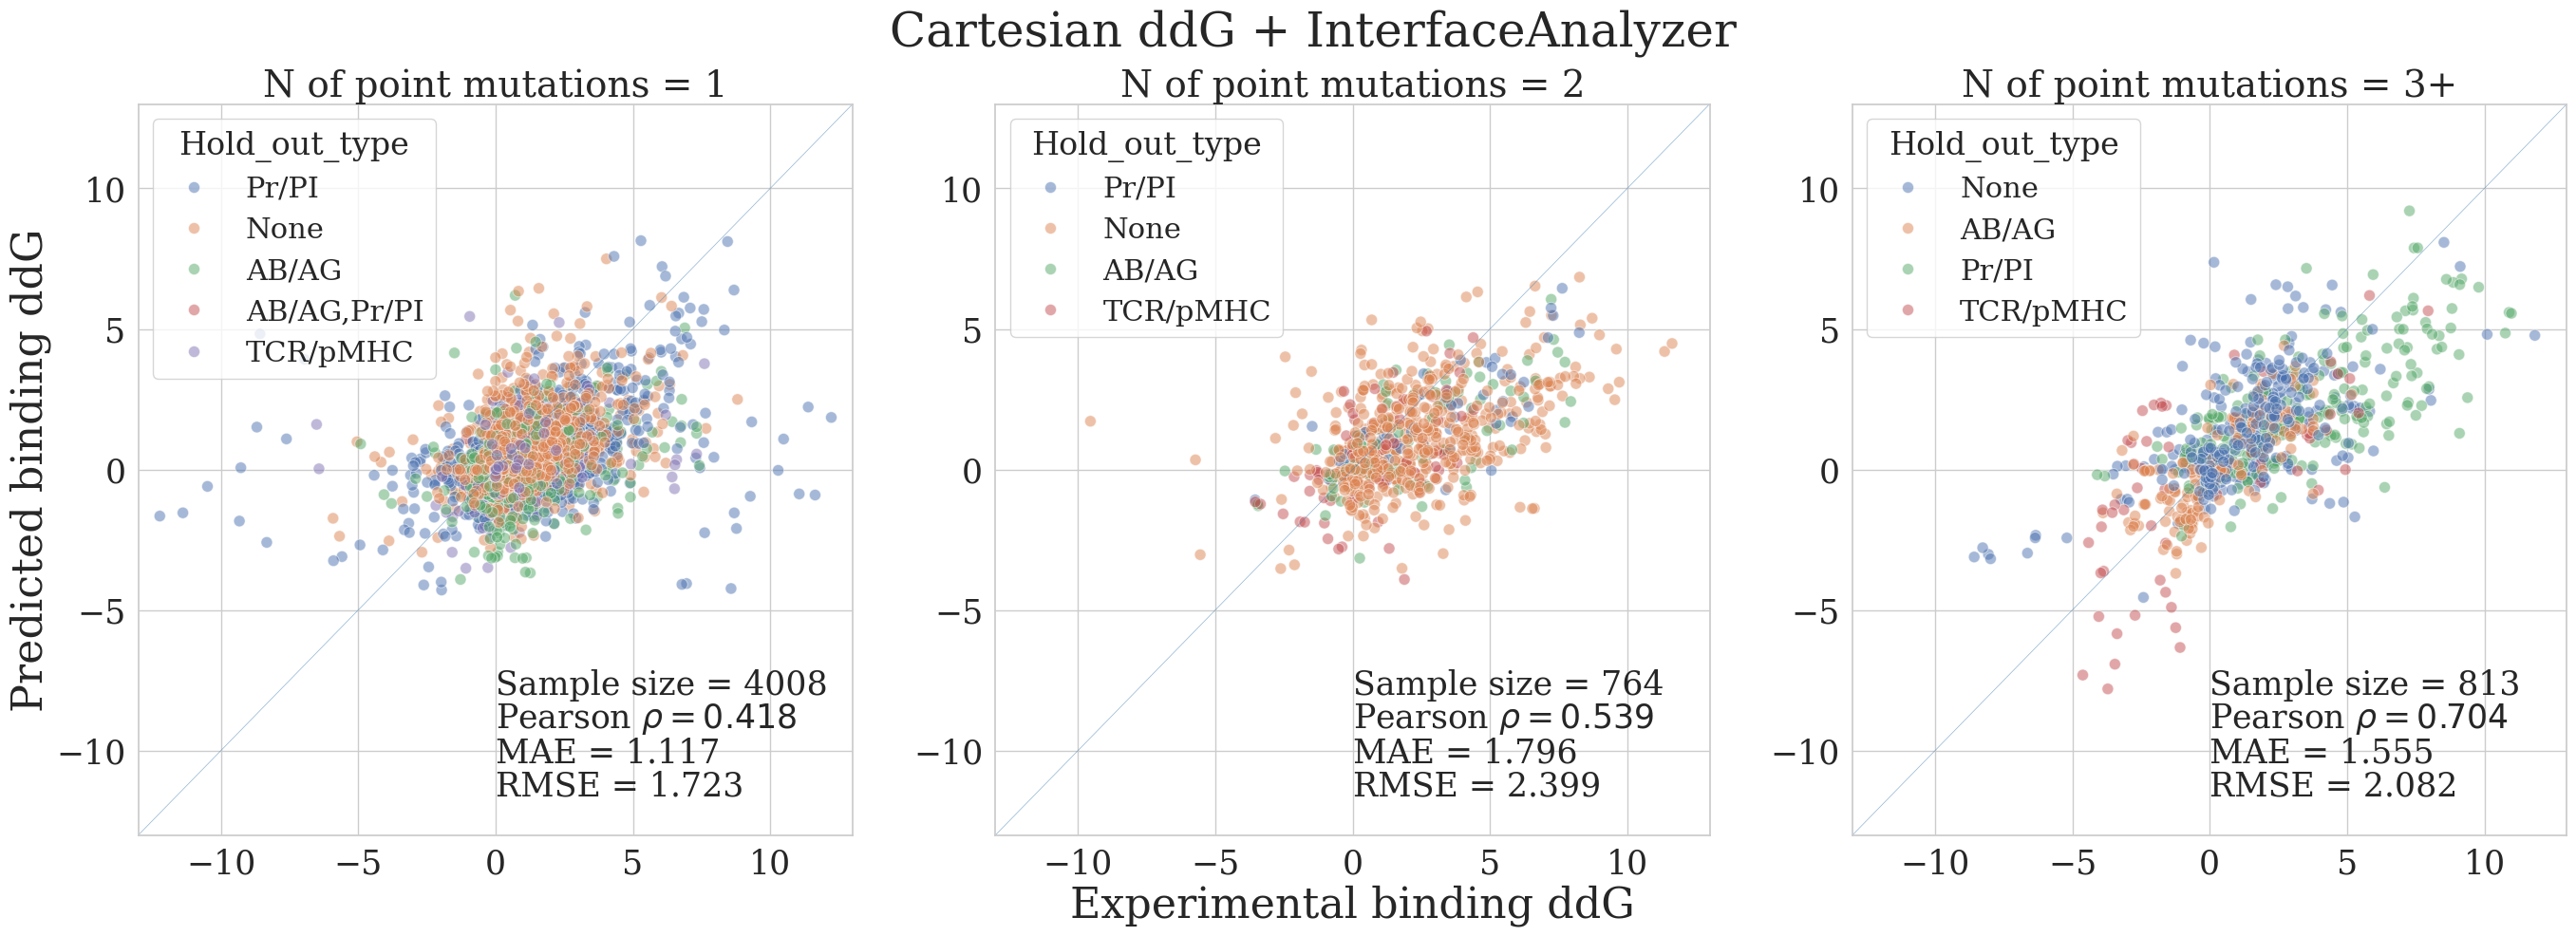

In [41]:
fig, axs = plt.subplots(1, 3, figsize=(33, 10))  # 3 rows, 1 column
plt.setp(axs, xlim=(-13, 13), ylim=(-13, 13))
# Loop through the data and axes, and plot each scatter plot
for ax, N in zip(axs, exp_cart_ddG_all_no_nan['N_mut'].unique()):
    subset = exp_cart_ddG_all_no_nan.loc[exp_cart_ddG_all_no_nan['N_mut']==N]
    sns.scatterplot(data=subset, x='ddG_bind',
                       y='mean_ddG_infc',
                       alpha=0.5, s=75,
                       hue='Hold_out_type', ax=ax)
    ax.plot([-15, 15], [-15, 15], color='steelblue', ls='-', lw=0.5, alpha=0.6)

    ax.annotate(f'Sample size = {len(subset)}', xy=(0, -8), fontsize = 25)
    r, p = stats.pearsonr(subset['ddG_bind'], subset['mean_ddG_infc'])
    ax.annotate(f'Pearson $\\rho = {r:.3f}$', xy=(0, -9.2), fontsize = 25)
    error = mae(subset['ddG_bind'], subset['mean_ddG_infc'])
    ax.annotate(f'MAE = {error:.3f}', xy=(0, -10.4), fontsize = 25)
    rmse = sqrt(mean_squared_error(subset['ddG_bind'], subset['mean_ddG_infc']))
    ax.annotate(f'RMSE = {rmse:.3f}', xy=(0, -11.6), fontsize = 25)
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_title(f'N of point mutations = {N}', fontsize = 28)
    
axs[1].set_xlabel("Experimental binding ddG", fontsize = 32)
axs[0].set_ylabel("Predicted binding ddG", fontsize = 32)
fig.suptitle('Cartesian ddG + InterfaceAnalyzer', fontsize=36)

#plt.savefig('Figures/cart_ddG_IA_hot.pdf', format='pdf')

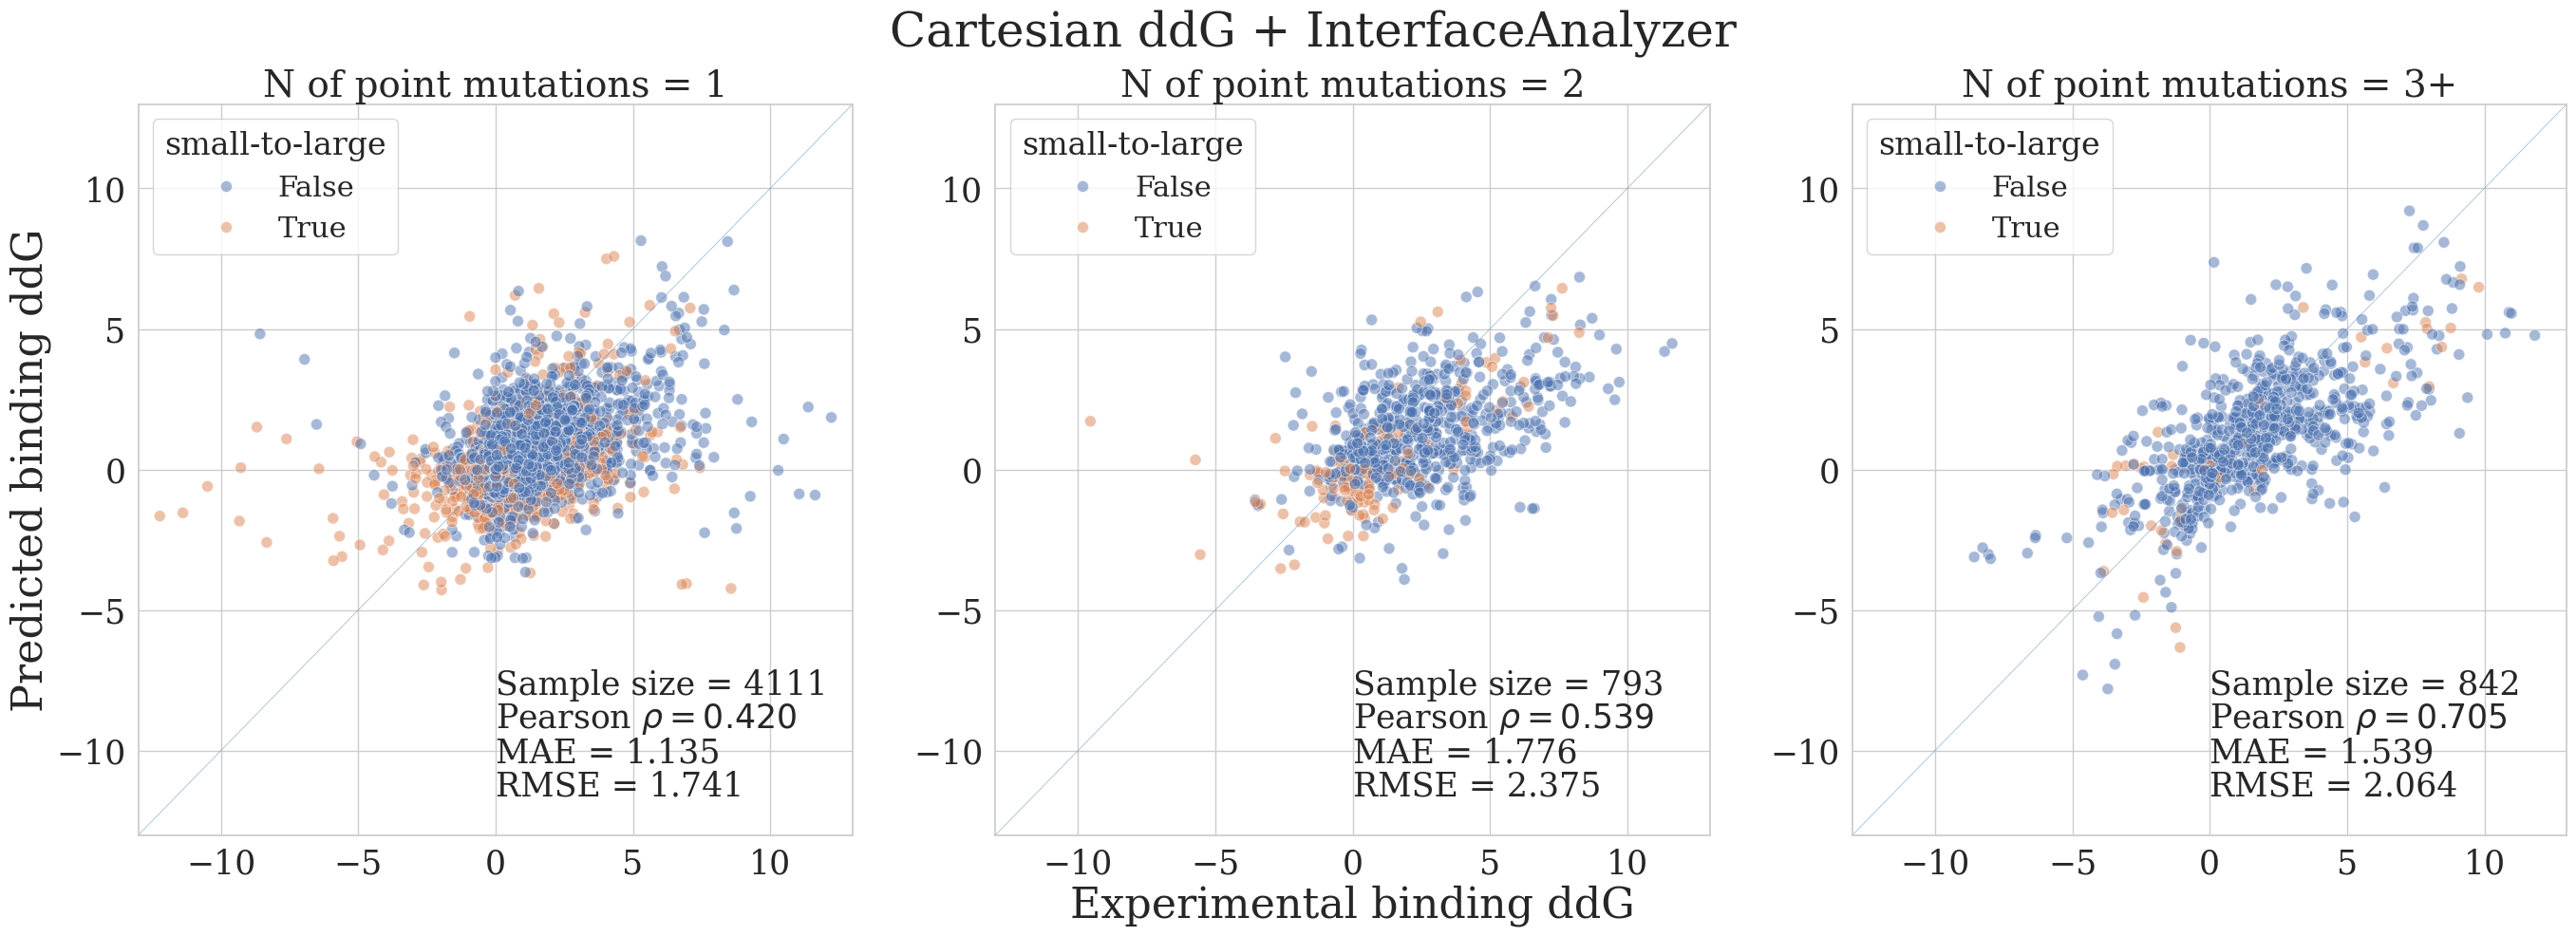

In [34]:
fig, axs = plt.subplots(1, 3, figsize=(33, 10))  # 3 rows, 1 column
plt.setp(axs, xlim=(-13, 13), ylim=(-13, 13))
# Loop through the data and axes, and plot each scatter plot
for ax, N in zip(axs, exp_cart_ddG_all_no_nan['N_mut'].unique()):
    subset = exp_cart_ddG_all_no_nan.loc[exp_cart_ddG_all_no_nan['N_mut']==N]
    sns.scatterplot(data=subset, x='ddG_bind',
                       y='mean_ddG_infc',
                       alpha=0.5, s=75,
                       hue='small-to-large', ax=ax)
    ax.plot([-15, 15], [-15, 15], color='steelblue', ls='-', lw=0.5, alpha=0.6)

    ax.annotate(f'Sample size = {len(subset)}', xy=(0, -8), fontsize = 25)
    r, p = stats.pearsonr(subset['ddG_bind'], subset['mean_ddG_infc'])
    ax.annotate(f'Pearson $\\rho = {r:.3f}$', xy=(0, -9.2), fontsize = 25)
    error = mae(subset['ddG_bind'], subset['mean_ddG_infc'])
    ax.annotate(f'MAE = {error:.3f}', xy=(0, -10.4), fontsize = 25)
    rmse = sqrt(mean_squared_error(subset['ddG_bind'], subset['mean_ddG_infc']))
    ax.annotate(f'RMSE = {rmse:.3f}', xy=(0, -11.6), fontsize = 25)
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_title(f'N of point mutations = {N}', fontsize = 28)
    
axs[1].set_xlabel("Experimental binding ddG", fontsize = 32)
axs[0].set_ylabel("Predicted binding ddG", fontsize = 32)
fig.suptitle('Cartesian ddG + InterfaceAnalyzer', fontsize=36)

plt.savefig('Figures/cart_ddG_IA_stl.pdf', format='pdf')

In [35]:
palette_colors = sns.color_palette('tab10')
palette_dict = {'infc to non-infc':'blue', 'infc to infc':'orange', 'non-infc to infc':'green', 'non-infc to non-infc':'red', 'mixed':'purple'}

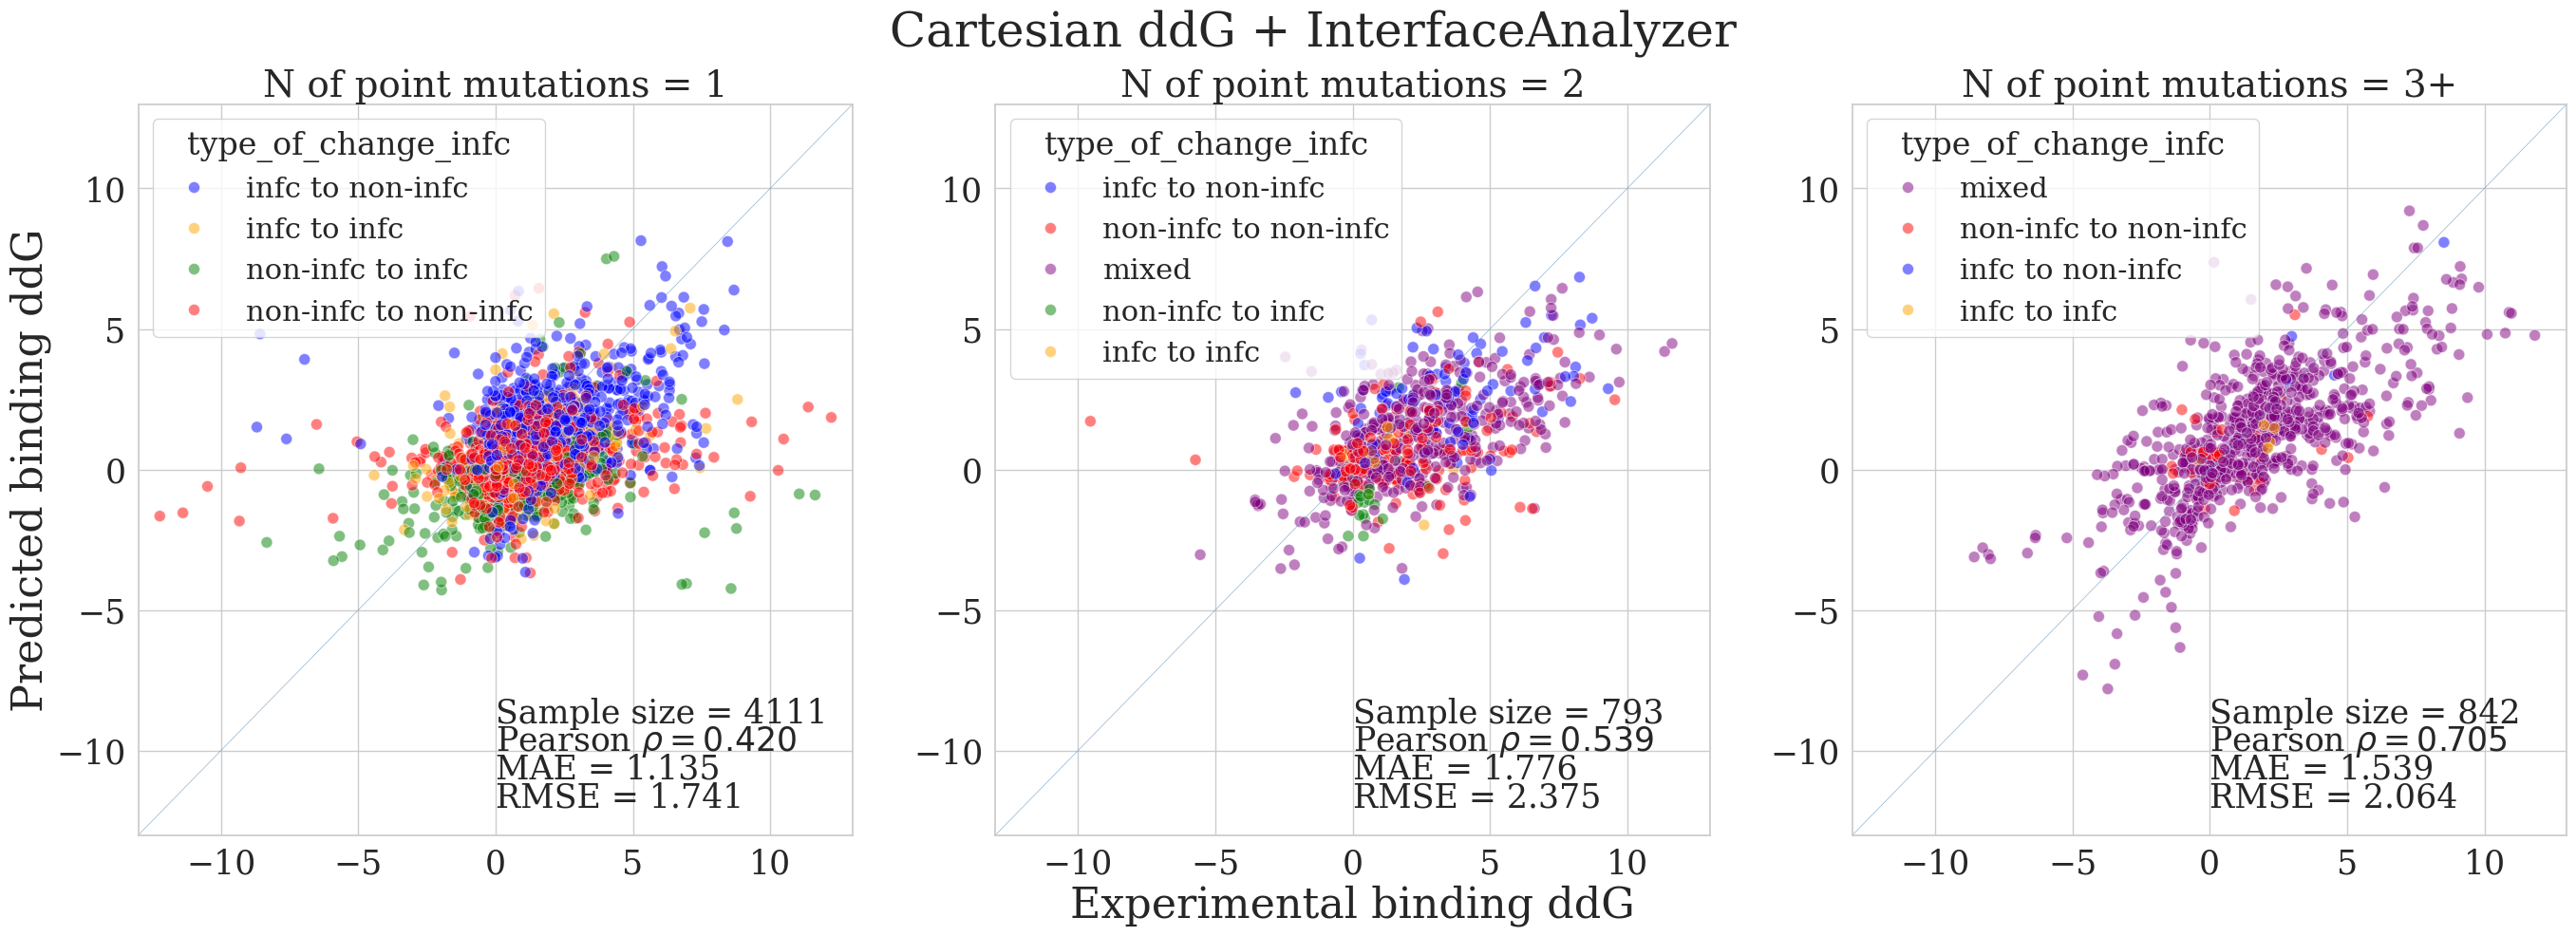

In [42]:
fig, axs = plt.subplots(1, 3, figsize=(33, 10))  # 3 rows, 1 column
plt.setp(axs, xlim=(-13, 13), ylim=(-13, 13))
# Loop through the data and axes, and plot each scatter plot
for ax, N in zip(axs, exp_cart_ddG_all_no_nan['N_mut'].unique()):
    subset = exp_cart_ddG_all_no_nan.loc[exp_cart_ddG_all_no_nan['N_mut']==N]
    sns.scatterplot(data=subset, x='ddG_bind',
                       y='mean_ddG_infc',
                       alpha=0.5, s=75,
                       hue='type_of_change_infc',
                       ax=ax, palette=palette_dict)
    ax.plot([-15, 15], [-15, 15], color='steelblue', ls='-', lw=0.5, alpha=0.6)

    ax.annotate(f'Sample size = {len(subset)}', xy=(0, -9), fontsize = 25)
    r, p = stats.pearsonr(subset['ddG_bind'], subset['mean_ddG_infc'])
    ax.annotate(f'Pearson $\\rho = {r:.3f}$', xy=(0, -10), fontsize = 25)
    error = mae(subset['ddG_bind'], subset['mean_ddG_infc'])
    ax.annotate(f'MAE = {error:.3f}', xy=(0, -11), fontsize = 25)
    rmse = sqrt(mean_squared_error(subset['ddG_bind'], subset['mean_ddG_infc']))
    ax.annotate(f'RMSE = {rmse:.3f}', xy=(0, -12), fontsize = 25)
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_title(f'N of point mutations = {N}', fontsize = 28)
    sns.move_legend(ax, "upper left")
    
axs[1].set_xlabel("Experimental binding ddG", fontsize = 32)
axs[0].set_ylabel("Predicted binding ddG", fontsize = 32)
fig.suptitle('Cartesian ddG + InterfaceAnalyzer', fontsize=36)

plt.savefig('Figures/cart_ddG_IA_type_of_change.pdf', format='pdf')

In [9]:
outliers = exp_cart_ddG_all_no_nan.loc[abs(exp_cart_ddG_all_no_nan['ddG_bind']-exp_cart_ddG_all_no_nan['mean_ddG_infc'])>4]

In [ ]:
fig= plt.figure(figsize=(10, 10))
sns.histplot(data=exp_cart_ddG_all_no_nan, x="ddG_bind", bins=180, color='r', alpha = 1, label='SKEMPI 2.0')
sns.histplot(data=exp_cart_ddG_all_no_nan, x="cdg^2+IA", bins=180, color='b', alpha = 0.7, label='cart_ddg+IA+cart_ddg')

plt.xlabel('Binding ddG')

plt.legend(fontsize=21)
plt.savefig("Figures/ddG_bind_dist_lol.pdf", format='pdf')

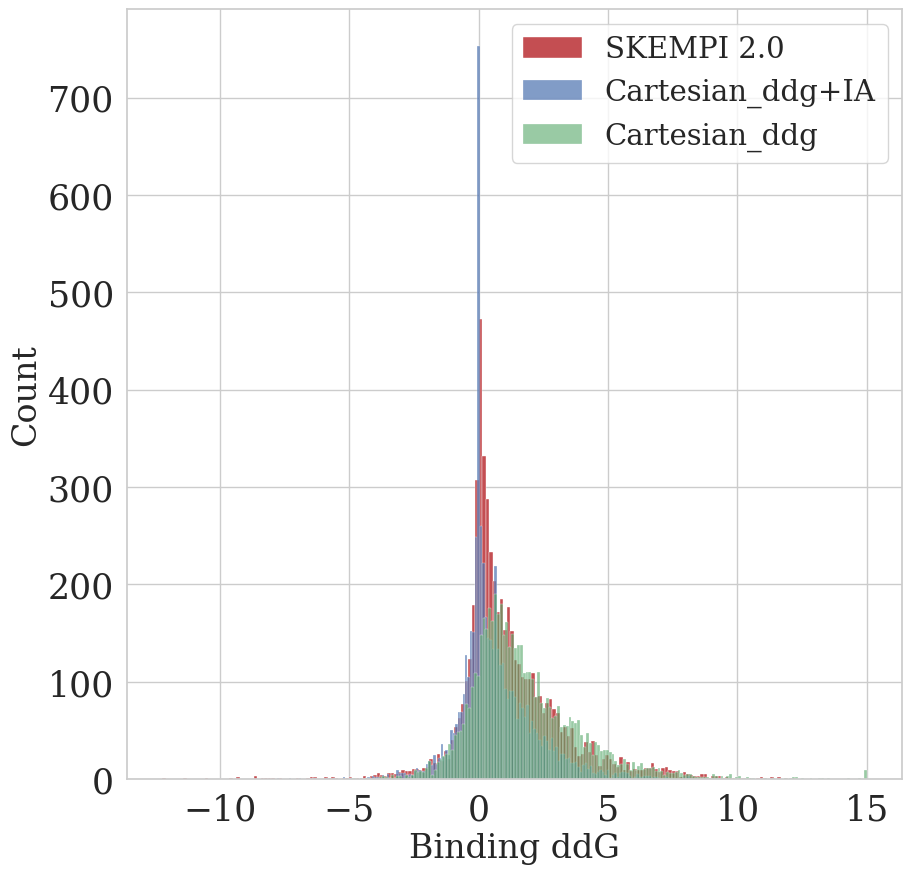

In [27]:
fig= plt.figure(figsize=(10, 10))
sns.histplot(data=exp_cart_ddG_all_no_nan, x="ddG_bind", bins=180, color='r', alpha = 1, label='SKEMPI 2.0')
sns.histplot(data=exp_cart_ddG_all_no_nan, x="mean_ddG_infc", bins=180, color='b', alpha = 0.7, label='Cartesian_ddg+IA')
sns.histplot(data=exp_cart_ddG_all_no_nan, x="mean_ddG", bins=180, color='g', alpha = 0.6, label='Cartesian_ddg')

plt.xlabel('Binding ddG')

plt.legend(fontsize=21)
plt.savefig("Figures/ddG_bind_dist_CartIA_Cart_Exp.pdf", format='pdf')

In [17]:
exp_cart_ddG_all_no_nan.Method.value_counts()

Method
SPR         2032
FL          1350
ITC          420
IASP         387
SFFL         293
RA           261
SP           190
ELISA        152
IAFL         145
KinExA       103
IARA          89
BI            49
CSPRIA        40
ELFA          25
ESMA          17
SPR,SFFL      10
SFPF          10
IAGE           8
EMSA           6
Name: count, dtype: int64

In [ ]:
list_of_lists = [['SPR', 'FL', 'ITC', 'SP'], ['RA', 'IASP', 'SFFL', 'ELISA', 'IAFL', 'KinExA'],
                 ['IARA', 'BI', 'CSPRIA', 'ELFA', 'ESMA'], ['SPR,SFFL', 'SFPF', 'IAGE', 'EMSA']]

In [48]:
list_of_lists = [['SPR', 'FL', 'ITC'], ['SP', 'SFFL'],
                 ['ELISA', 'RA'], ['KinExA', 'BI', 'CSPRIA', 'ELFA'],
                 ['IASP', 'IAFL'], ['IARA', 'IAGE']]

In [64]:
list_of_lists = [['SPR', 'FL', 'ITC'], ['ELISA', 'RA'],
                 ['SP', 'SFFL'], ['IASP', 'IAFL'],
                 ['KinExA', 'BI', 'CSPRIA', 'ELFA'], ['IARA', 'IAGE']]

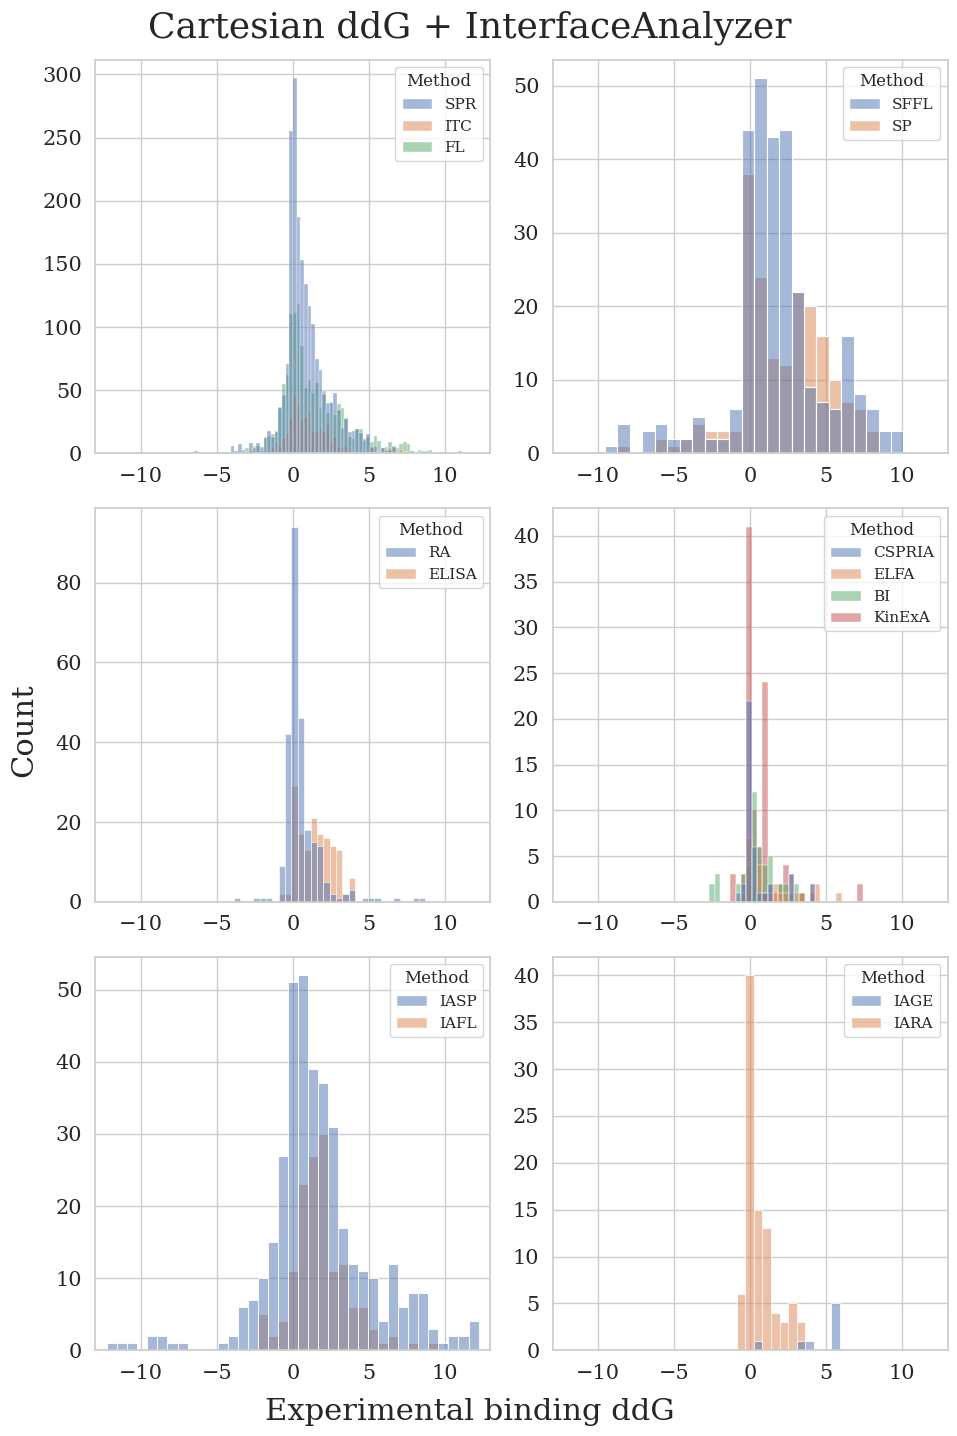

In [58]:
plt.rc('font', size=15) #controls default text size
plt.rc('xtick', labelsize=15) #fontsize of the x tick labels
plt.rc('ytick', labelsize=15) #fontsize of the y tick labels
#sns.set(style='whitegrid', color_codes=True, font='serif', font_scale=1)

fig, axes = plt.subplots(3, 2, figsize=(10, 15))
plt.setp(axes, xlim=(-13, 13))
axes = axes.flatten()
df = exp_cart_ddG_all_no_nan.copy()
for ax, l in zip(axes, list_of_lists):
    subset = df.loc[df['Method'].isin(l)]
    a = sns.histplot(data=subset, x="ddG_bind", hue='Method', ax=ax, alpha=0.5)
    #a.set_title(sub, fontsize=25)
    ax.set_xlabel('')
    ax.set_ylabel('')

fig.text(0.5, 0.04, 'Experimental binding ddG', ha='center', fontsize=22)
fig.text(0.04, 0.5, 'Count', va='center', rotation='vertical', fontsize=22)
fig.suptitle('Cartesian ddG + InterfaceAnalyzer', fontsize=26)
plt.tight_layout(rect=[0.05, 0.05, 1, 1])
plt.savefig('Figures/cart_ddG_IA_method_hist.pdf', format='pdf')

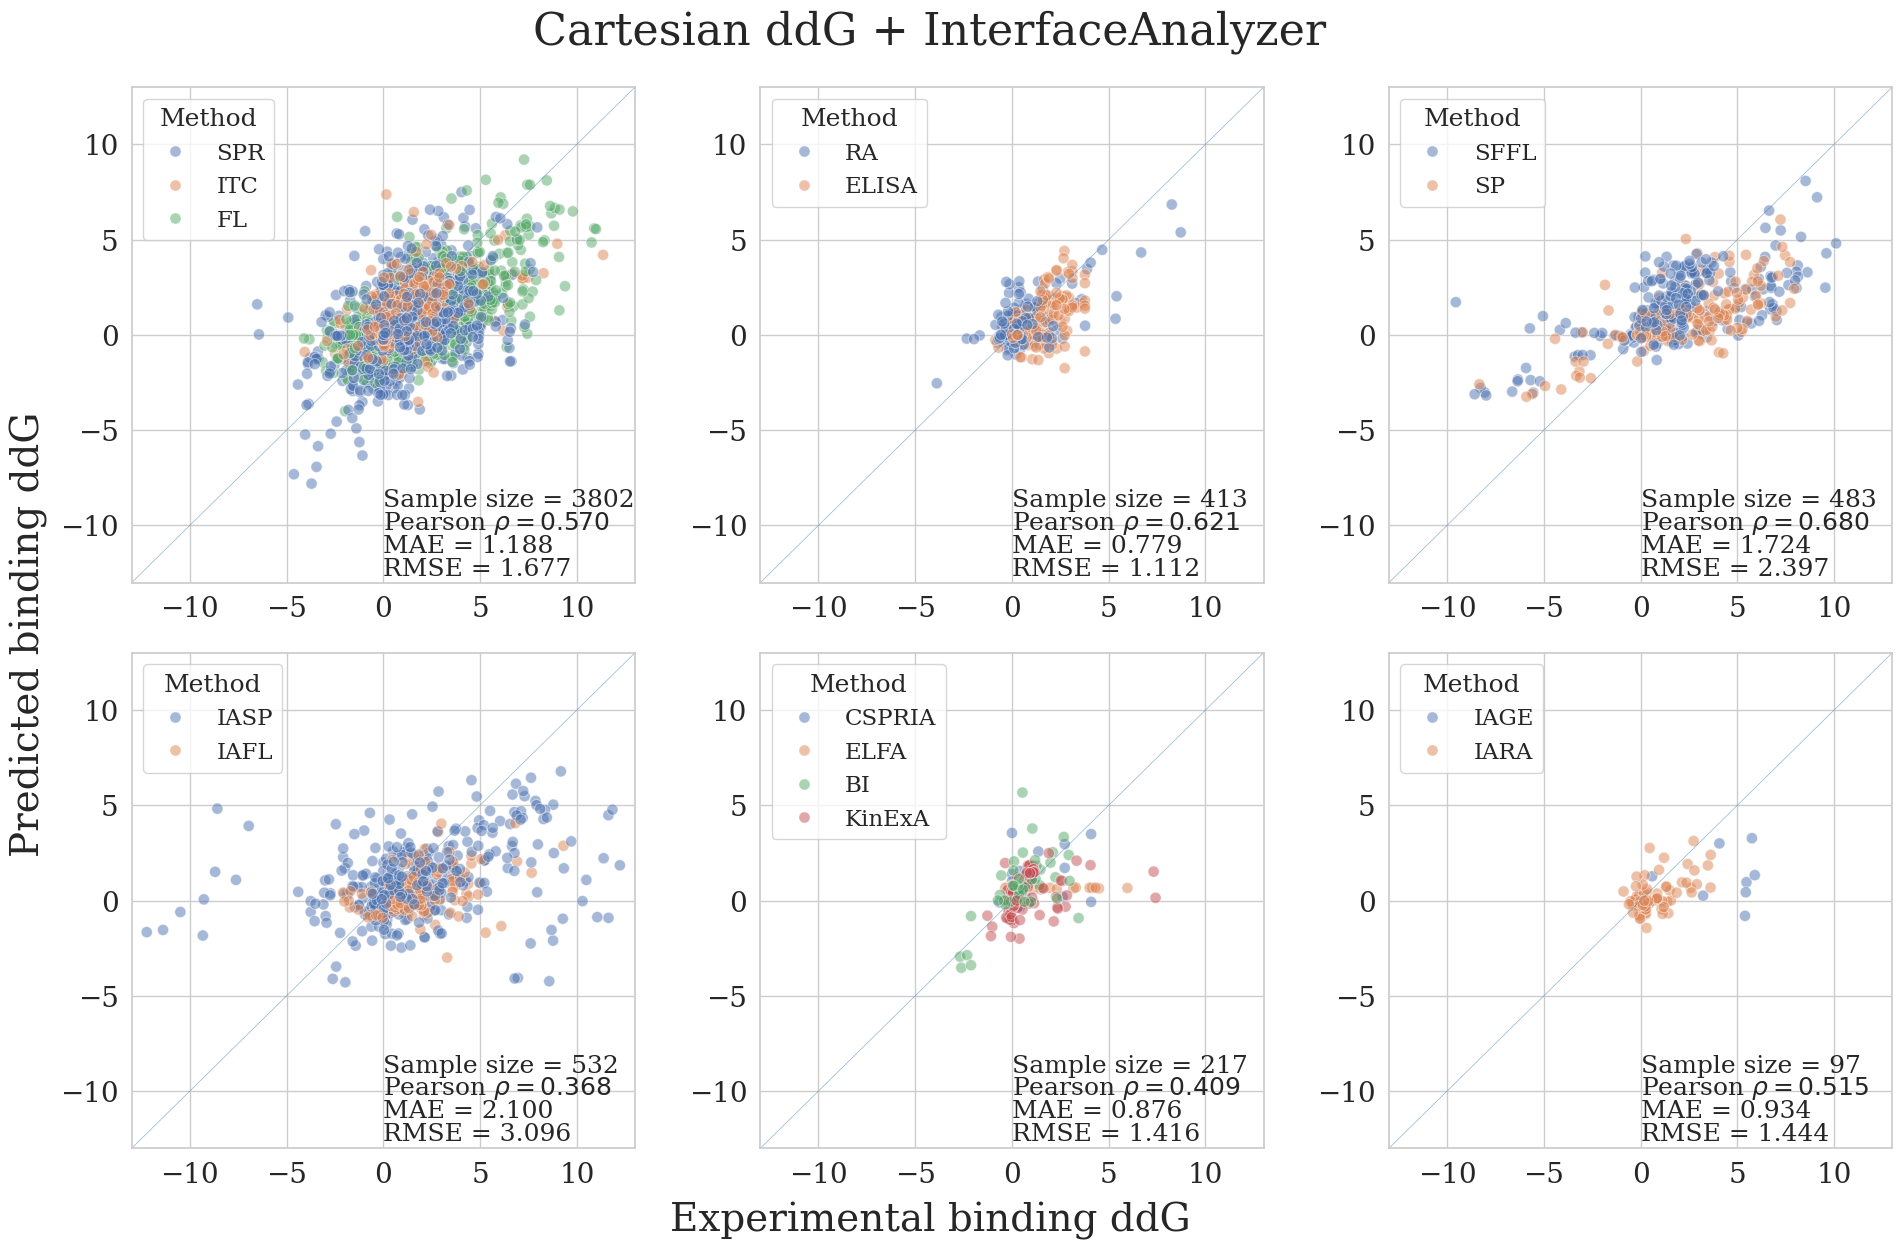

In [70]:
sns.set(style='whitegrid', color_codes=True, font='serif', font_scale=1.5)
plt.rc('font', size=20) #controls default text size
plt.rc('xtick', labelsize=20) #fontsize of the x tick labels
plt.rc('ytick', labelsize=20) #fontsize of the y tick labels


fig, axes = plt.subplots(2, 3, figsize=(20, 13))
plt.setp(axes, xlim=(-13, 13), ylim=(-13, 13))
axes = axes.flatten()

for ax, l in zip(axes, list_of_lists):
    subset = exp_cart_ddG_all_no_nan.loc[exp_cart_ddG_all_no_nan['Method'].isin(l)]
    sns.scatterplot(data=subset, x='ddG_bind',
                       y='mean_ddG_infc',
                       alpha=0.5, s=65,
                       hue='Method',
                       ax=ax)
    
    ax.plot([-15, 15], [-15, 15], color='steelblue', ls='-', lw=0.5, alpha=0.6)
    ax.annotate(f'Sample size = {len(subset)}', xy=(0, -9), fontsize = 18)
    r, p = stats.pearsonr(subset['ddG_bind'], subset['mean_ddG_infc'])
    ax.annotate(f'Pearson $\\rho = {r:.3f}$', xy=(0, -10.2), fontsize = 18)
    error = mae(subset['ddG_bind'], subset['mean_ddG_infc'])
    ax.annotate(f'MAE = {error:.3f}', xy=(0, -11.4), fontsize = 18)
    rmse = sqrt(mean_squared_error(subset['ddG_bind'], subset['mean_ddG_infc']))
    ax.annotate(f'RMSE = {rmse:.3f}', xy=(0, -12.6), fontsize = 18)
    ax.set_xlabel("")
    ax.set_ylabel("")
    #ax.set_title(f'N of point mutations = {N}', fontsize = 28)
    sns.move_legend(ax, "upper left")
    
fig.text(0.5, 0.04, 'Experimental binding ddG', ha='center', fontsize=28)  # x label
fig.text(0.04, 0.5, 'Predicted binding ddG', va='center', rotation='vertical', fontsize=28)
fig.suptitle('Cartesian ddG + InterfaceAnalyzer', fontsize=32)
plt.tight_layout(rect=[0.05, 0.05, 1, 1])
plt.savefig('Figures/cart_ddG_IA_method_x6.pdf', format='pdf')

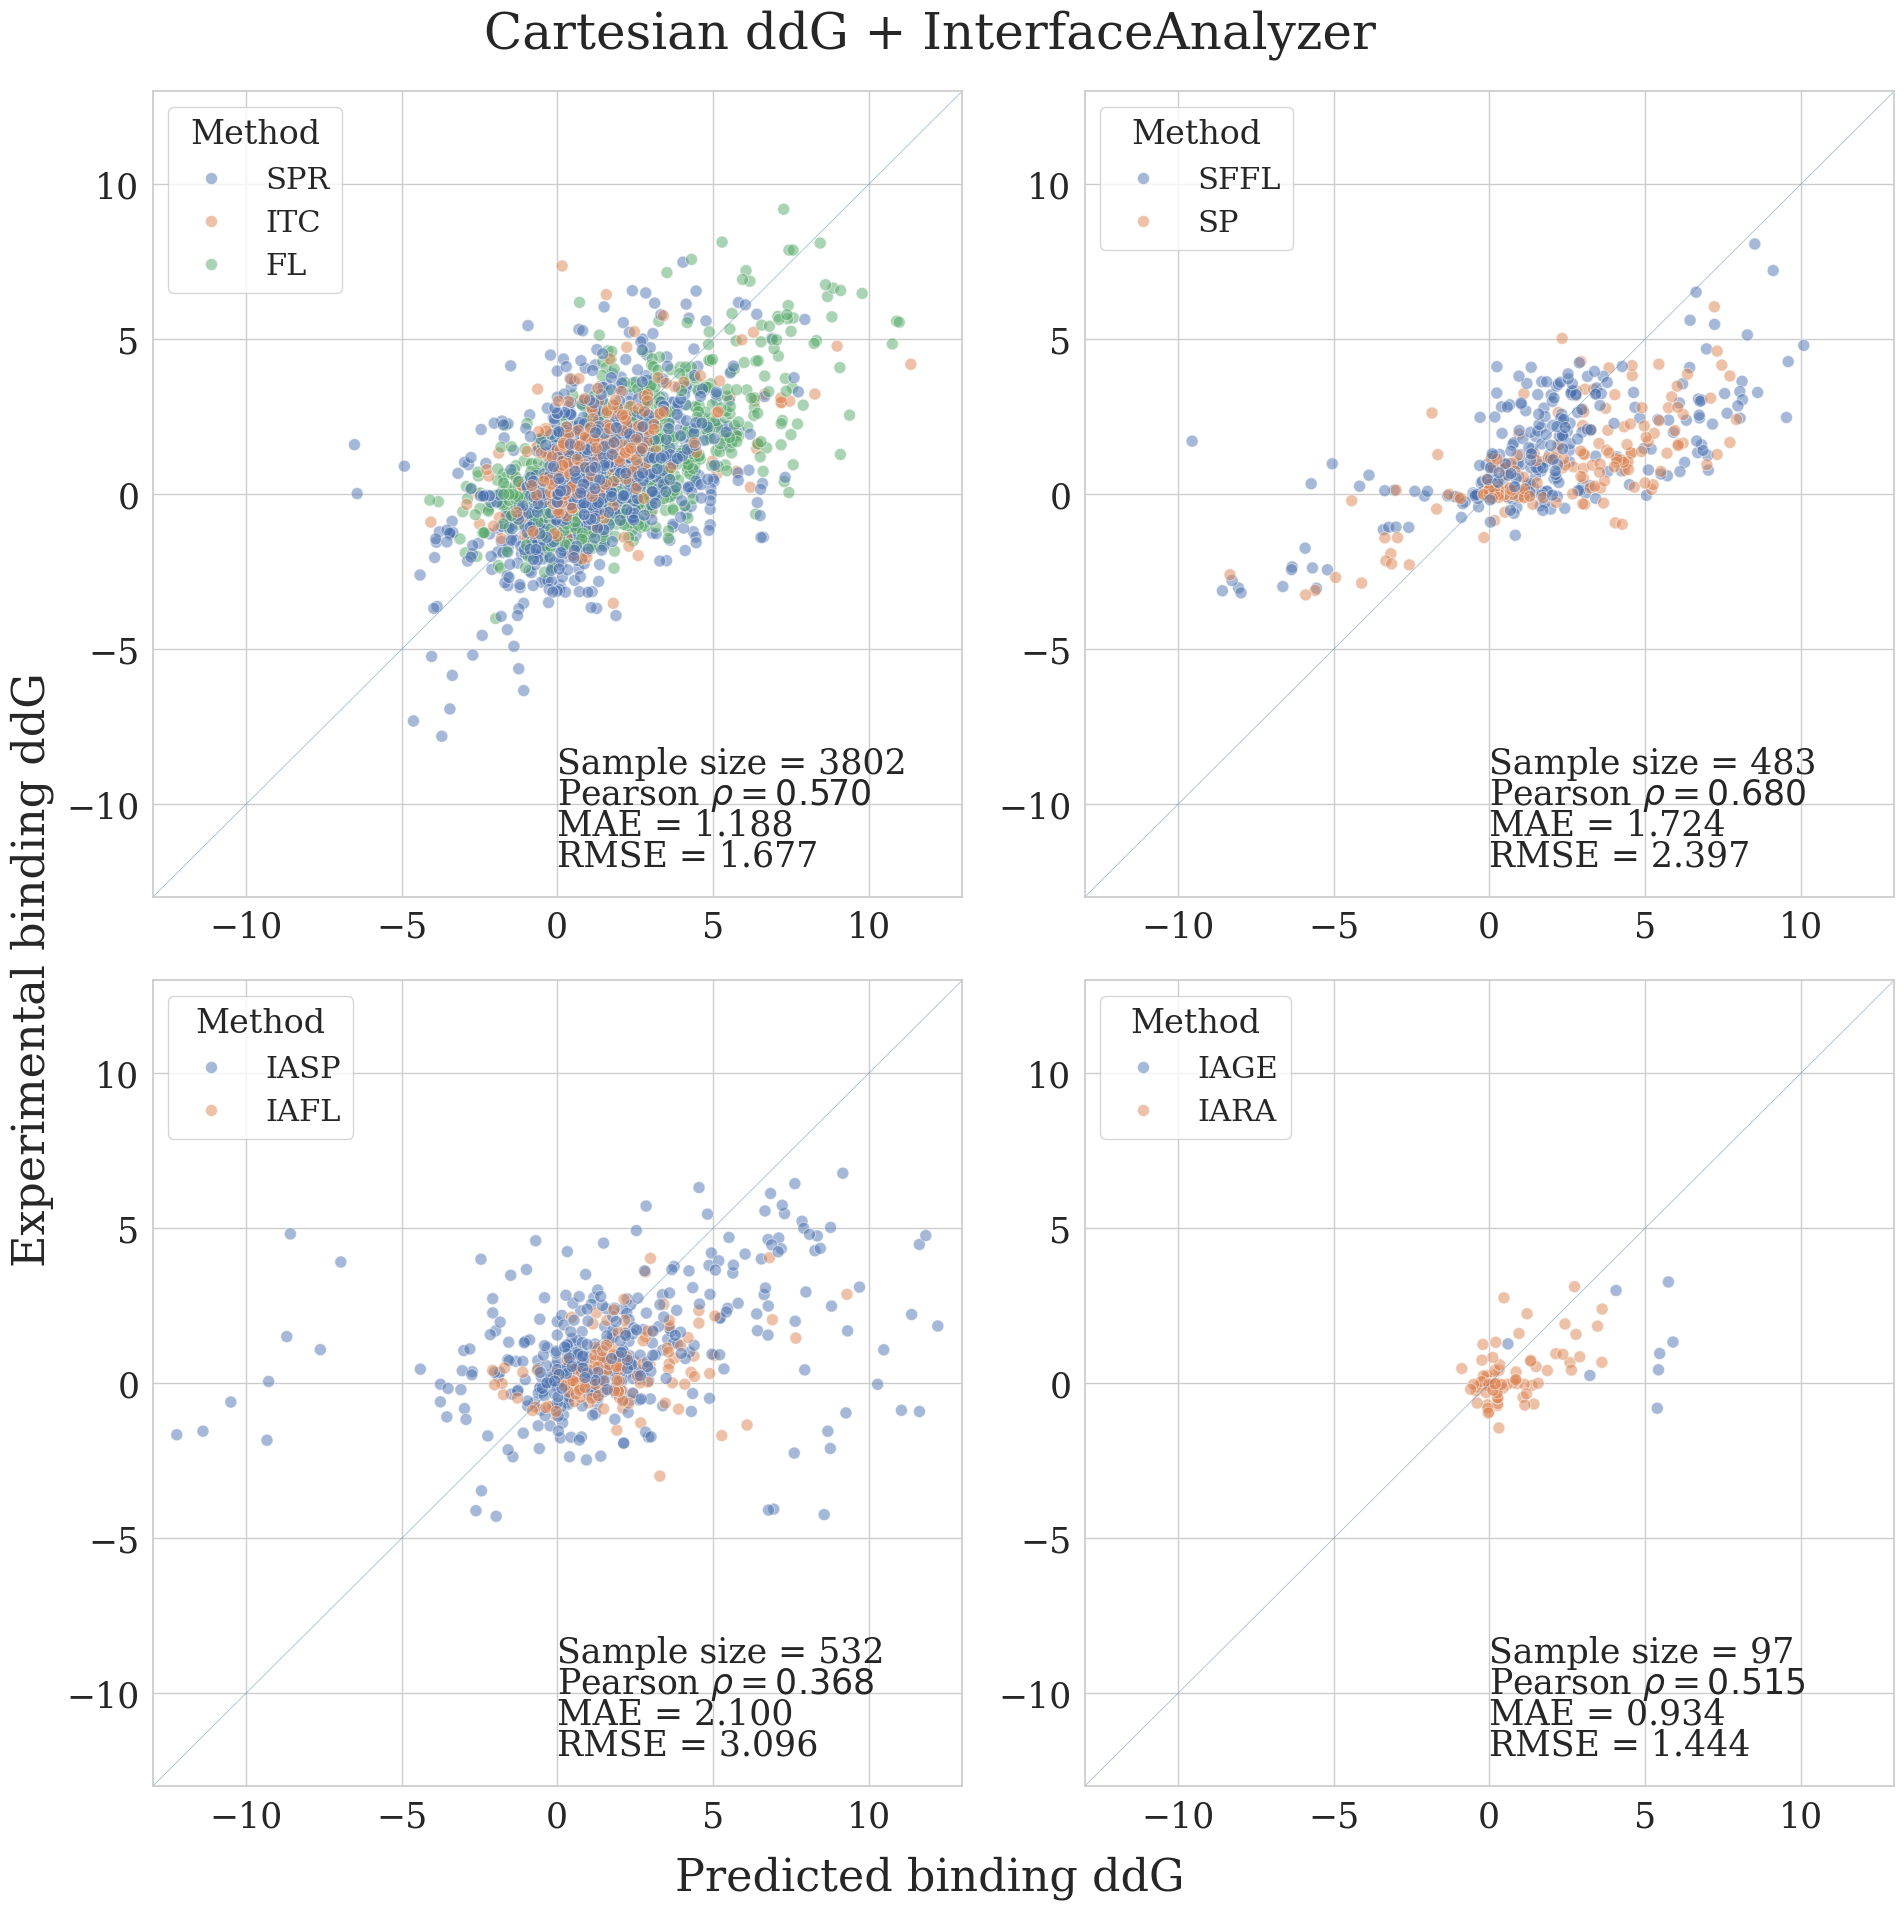

In [45]:
fig, axes = plt.subplots(2, 2, figsize=(20, 20))
plt.setp(axes, xlim=(-13, 13), ylim=(-13, 13))
axes = axes.flatten()

for ax, l in zip(axes, list_of_lists):
    subset = exp_cart_ddG_all_no_nan.loc[exp_cart_ddG_all_no_nan['Method'].isin(l)]
    sns.scatterplot(data=subset, x='ddG_bind',
                       y='mean_ddG_infc',
                       alpha=0.5, s=75,
                       hue='Method',
                       ax=ax)
    # # Label the unfitting data points
    # x = subset['ddG_bind'].values
    # y = subset['mean_ddG_infc'].values
    # names = subset['variant'].values
    # # Distance to the diagonal both on x and y axis
    # #dist = abs(x-y)
    # txt_list=list()
    # for i in range(len(x)):
    #     # dist = np.sqrt((2*(abs(x-y))**2))/2
    #     dist = abs(x-y)
    #     sub_list = list()
    #     if (dist[i] > 4.5)&(len(names[i].split(':'))<=2):
    #         for point_mut in names[i].split(':'):
    #             sub_list.append(point_mut[-1])
    #         name = ','.join(sub_list)
            
    #         ax.text(x[i]+0.01, y[i]+0.01, names[i][-1], fontsize=13)
    #         #txt_list.append(plt.text(x[i]+0.01, y[i]+0.01, name, fontsize=10))
    # #adjust_text(txt_list)
    
    ax.plot([-15, 15], [-15, 15], color='steelblue', ls='-', lw=0.5, alpha=0.6)
    ax.annotate(f'Sample size = {len(subset)}', xy=(0, -9), fontsize = 25)
    r, p = stats.pearsonr(subset['ddG_bind'], subset['mean_ddG_infc'])
    ax.annotate(f'Pearson $\\rho = {r:.3f}$', xy=(0, -10), fontsize = 25)
    error = mae(subset['ddG_bind'], subset['mean_ddG_infc'])
    ax.annotate(f'MAE = {error:.3f}', xy=(0, -11), fontsize = 25)
    rmse = sqrt(mean_squared_error(subset['ddG_bind'], subset['mean_ddG_infc']))
    ax.annotate(f'RMSE = {rmse:.3f}', xy=(0, -12), fontsize = 25)
    ax.set_xlabel("")
    ax.set_ylabel("")
    #ax.set_title(f'N of point mutations = {N}', fontsize = 28)
    sns.move_legend(ax, "upper left")
    
fig.text(0.5, 0.04, 'Predicted binding ddG', ha='center', fontsize=32)  # x label
fig.text(0.04, 0.5, 'Experimental binding ddG', va='center', rotation='vertical', fontsize=32)
fig.suptitle('Cartesian ddG + InterfaceAnalyzer', fontsize=36)
plt.tight_layout(rect=[0.05, 0.05, 1, 1])
plt.savefig('Figures/cart_ddG_IA_method_x4.pdf', format='pdf')

In [48]:
# skempi2_unfilt = pd.read_csv('/groups/sbinlab/panf/SKEMPIv2/skempi_v2.csv', sep=';')
# skempi_unfilt_count = skempi2_unfilt[['#Pdb', 'Method']].groupby('Method').count().reset_index()
# skempi_unfilt_count.rename(columns={"#Pdb": "Percentage"}, inplace=True)
# skempi_unfilt_count['Percentage'] = skempi_unfilt_count['Percentage'] / len(skempi2_unfilt) * 100
# skempi_unfilt_count['Subset'] = 'All' 

In [65]:
#skempi2_unfilt = pd.read_csv('/groups/sbinlab/panf/SKEMPIv2/skempi_v2.csv', sep=';')
skempi2_unfilt = exp_cart_ddG_all_no_nan.copy()
skempi_unfilt_count = skempi2_unfilt[['#Pdb', 'Method']].groupby('Method').count().reset_index()
skempi_unfilt_count.rename(columns={"#Pdb": "Percentage"}, inplace=True)
skempi_unfilt_count['Percentage'] = skempi_unfilt_count['Percentage'] / len(skempi2_unfilt) * 100
skempi_unfilt_count['Subset'] = 'All' 

In [66]:
outliers_meth = outliers.copy()
outliers_meth_count = outliers_meth[['#Pdb', 'Method']].groupby('Method').count().reset_index()
outliers_meth_count.rename(columns={"#Pdb": "Percentage"}, inplace=True)
outliers_meth_count['Percentage'] = outliers_meth_count['Percentage'] / len(outliers) * 100
outliers_meth_count['Subset'] = 'Outliers' 

In [67]:
#barplot_material = pd.concat([skempi_unfilt_count, skempi2_mm_count, skempi2_mm_err_count, outliers_meth_count])
barplot_material = pd.concat([skempi_unfilt_count, outliers_meth_count])

In [180]:
# Block of seaborn style settings
plt.rc('font', size=35) #controls default text size
plt.rc('axes', labelsize=20) #fontsize of the x and y labels
plt.rc('xtick', labelsize=18) #fontsize of the x tick labels
plt.rc('ytick', labelsize=18) #fontsize of the y tick labels
sns.set(style='whitegrid', color_codes=True, font='serif', font_scale=2)

plt.rc('xtick', labelsize=25) #fontsize of the x tick labels
plt.rc('ytick', labelsize=35) #fontsize of the y tick labels

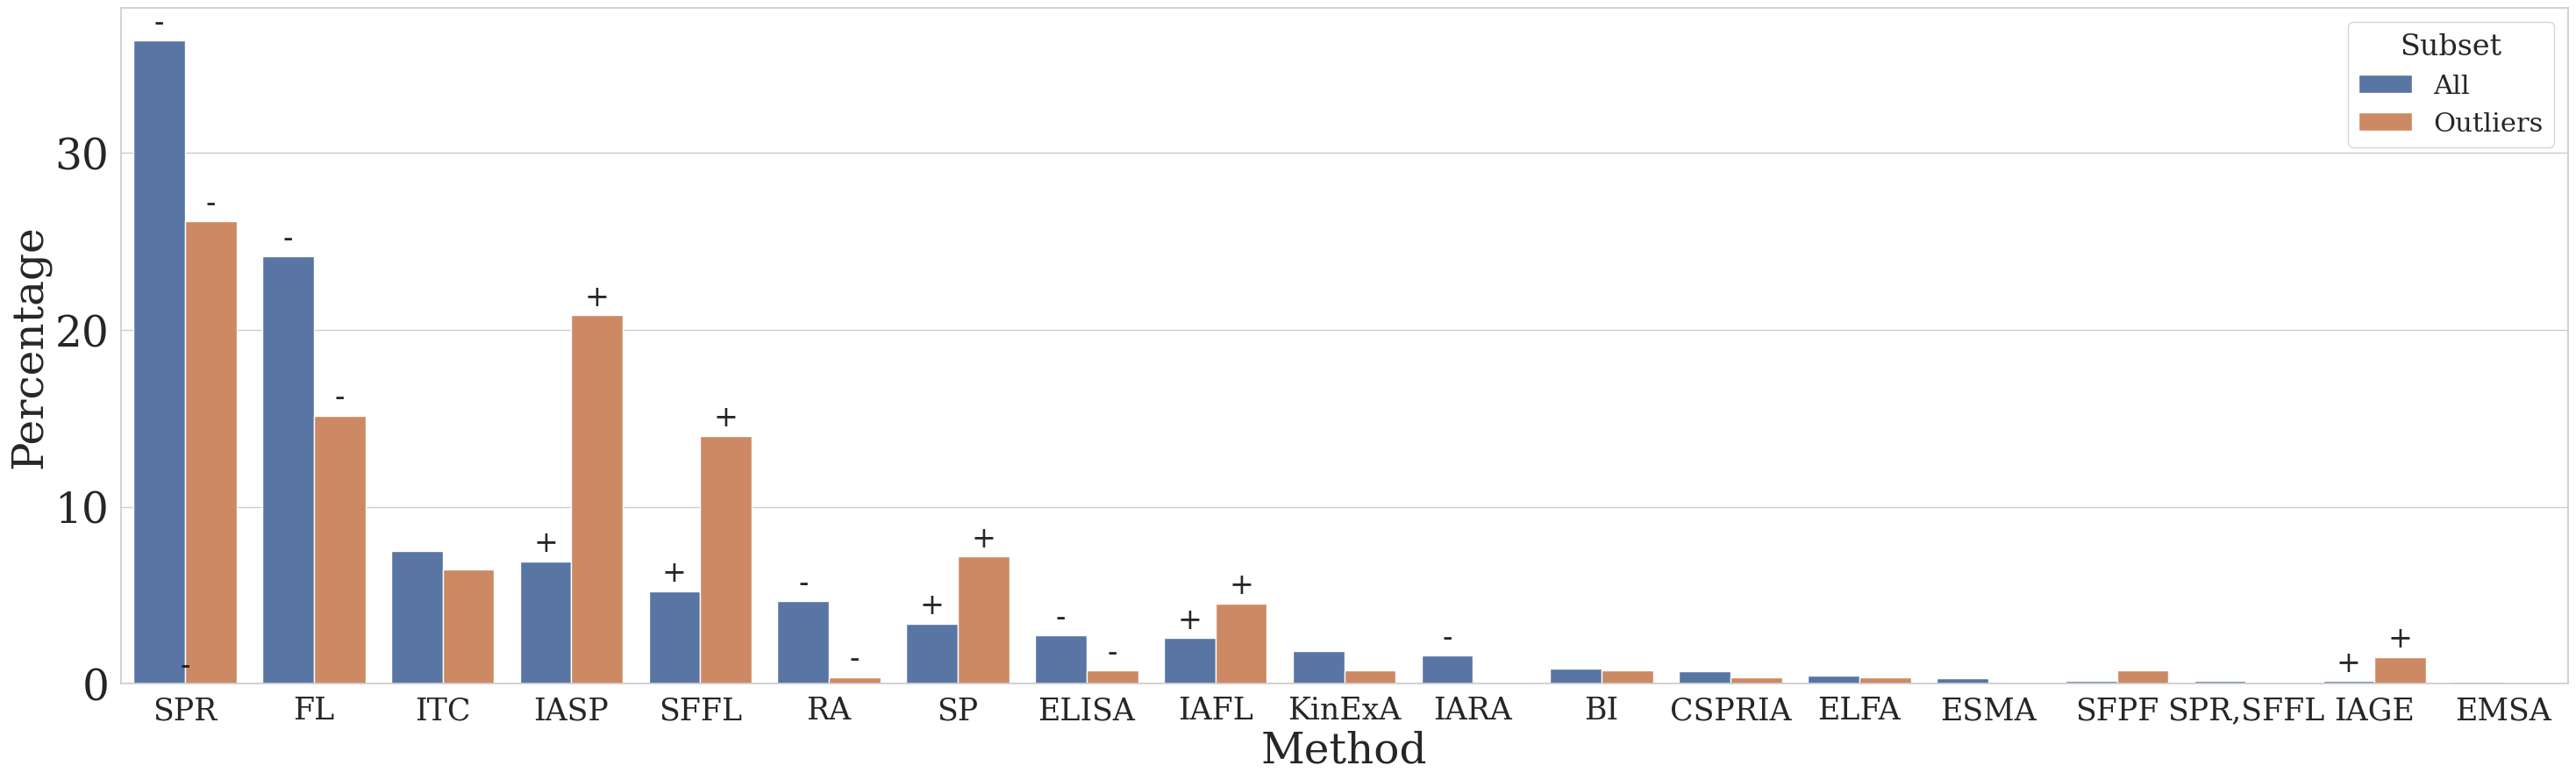

In [181]:
fig, ax = plt.subplots(figsize=(36, 10))
ax = sns.barplot(barplot_material, x="Method", y="Percentage", hue="Subset", order=skempi_unfilt_count.sort_values('Percentage', ascending=False)['Method'].values)

for p in ax.patches:
    h, w, x = p.get_height(), p.get_width(), p.get_x()
    xy = (x + w/2, h + 1)
    
    tick_label = ax.get_xticklabels()[int(np.round(x+w/2))].get_text()
    text = ''
    if tick_label in list_under:
        text = '-'
    if tick_label in list_over:
        text = '+'
        
    ax.annotate(text=text, xy=xy, ha='center', va='center')

plt.xlabel('Method', fontsize=35)
plt.ylabel('Percentage', fontsize=35)
    
plt.savefig('Figures/methods_percentage.pdf', format='pdf')

In [132]:
import pandas as pd
import scipy.stats as stats
import io

df = exp_cart_ddG_all_no_nan.copy()
print("\n--- 2. Defining Groups ---")
df['Group'] = 'Non-Outlier'
df.loc[abs(df['ddG_bind']-df['mean_ddG_infc'])>4, 'Group'] = 'Outlier'

print(f"Total samples: {len(df)}")
print(f"Outlier samples: {len(df[df['Group'] == 'Outlier'])}")
print(f"Non-Outlier samples: {len(df[df['Group'] == 'Non-Outlier'])}")


# --- 2. Create the Contingency Table ---
# This table counts the occurrences of each 'Method' for each 'Group'.
print("\n--- 3. Building the Contingency Table ---")
contingency_table = pd.crosstab(df['Group'], df['Method'])

print("--- Original Contingency Table ---")
print(contingency_table)
print("\n" + "="*50 + "\n")


# --- 2. Loop Through Each Method to Create 2x2 Tables ---
print("--- Performing Post-Hoc Fisher's Exact Tests ---")
results = {}

# Get the list of all methods (columns)
all_methods = contingency_table.columns
list_over = list()
list_under = list()

for method in all_methods:
    # --- a. Create the 2x2 table ---
    
    # Select the current method's column
    current_method_col = contingency_table[method]
    
    # Select all other methods and sum them up row-wise
    other_methods_col = contingency_table.drop(columns=method).sum(axis=1)
    
    # Combine into a new 2x2 DataFrame
    post_hoc_table = pd.concat([current_method_col, other_methods_col], axis=1)
    post_hoc_table.columns = [method, 'All Others']
    
    print(f"--- Testing Method: {method} ---")
    print(post_hoc_table)
    
    # --- b. Run Fisher's Exact Test on the 2x2 table ---
    odds_ratio, p_value = stats.fisher_exact(post_hoc_table)
    
    print(f"P-value: {p_value:.4f}")
    
    # Store the result
    results[method] = p_value
    
    # Check for significance (using a common alpha level)
    if p_value < 0.05:
        print("Result: SIGNIFICANT. This method's proportion is different in the outlier group.")
        all_freq = post_hoc_table['All Others']['Outlier']/(post_hoc_table['All Others'].sum())
        meth_freq = post_hoc_table[method]['Outlier']/(post_hoc_table[method].sum())
        print(f"All other method outlier frequency: {all_freq}")
        print(f"{method} outlier frequency: {meth_freq}")
        if meth_freq>all_freq:
            list_over.append(method)
        else:
            list_under.append(method)
    print("-" * 30)

# --- 3. Display Final Summary ---
print("\n" + "="*50)
print("--- Summary of P-values for Each Method ---")
print("="*50)

# Create a DataFrame for a nice, sorted view
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['p_value'])
results_df['is_significant'] = results_df['p_value'] < 0.05
results_df = results_df.sort_values(by='p_value')

print(results_df)

print("\nConclusion:")
print(f"Methods {list_over}' are disproportionately overrepresented in your outlier group.")
print(f"Methods {list_under}' are disproportionately underrepresented in your outlier group.")




--- 2. Defining Groups ---
Total samples: 5587
Outlier samples: 264
Non-Outlier samples: 5323

--- 3. Building the Contingency Table ---
--- Original Contingency Table ---
Method       BI  CSPRIA  ELFA  ELISA  EMSA  ESMA    FL  IAFL  IAGE  IARA  \
Group                                                                      
Non-Outlier  47      39    24    150     6    17  1310   133     4    89   
Outlier       2       1     1      2     0     0    40    12     4     0   

Method       IASP  ITC  KinExA   RA  SFFL  SFPF   SP   SPR  SPR,SFFL  
Group                                                                 
Non-Outlier   332  403     101  260   256     8  171  1963        10  
Outlier        55   17       2    1    37     2   19    69         0  


--- Performing Post-Hoc Fisher's Exact Tests ---
--- Testing Method: BI ---
             BI  All Others
Group                      
Non-Outlier  47        5276
Outlier       2         262
P-value: 1.0000
------------------------------
-

In [109]:
print(list_over)
print(list_under)

['IAFL', 'IAGE', 'IASP', 'SFFL', 'SP']
['ELISA', 'FL', 'IARA', 'RA', 'SPR']


Text(5, -12, 'single mut $\\rho = 0.420$')

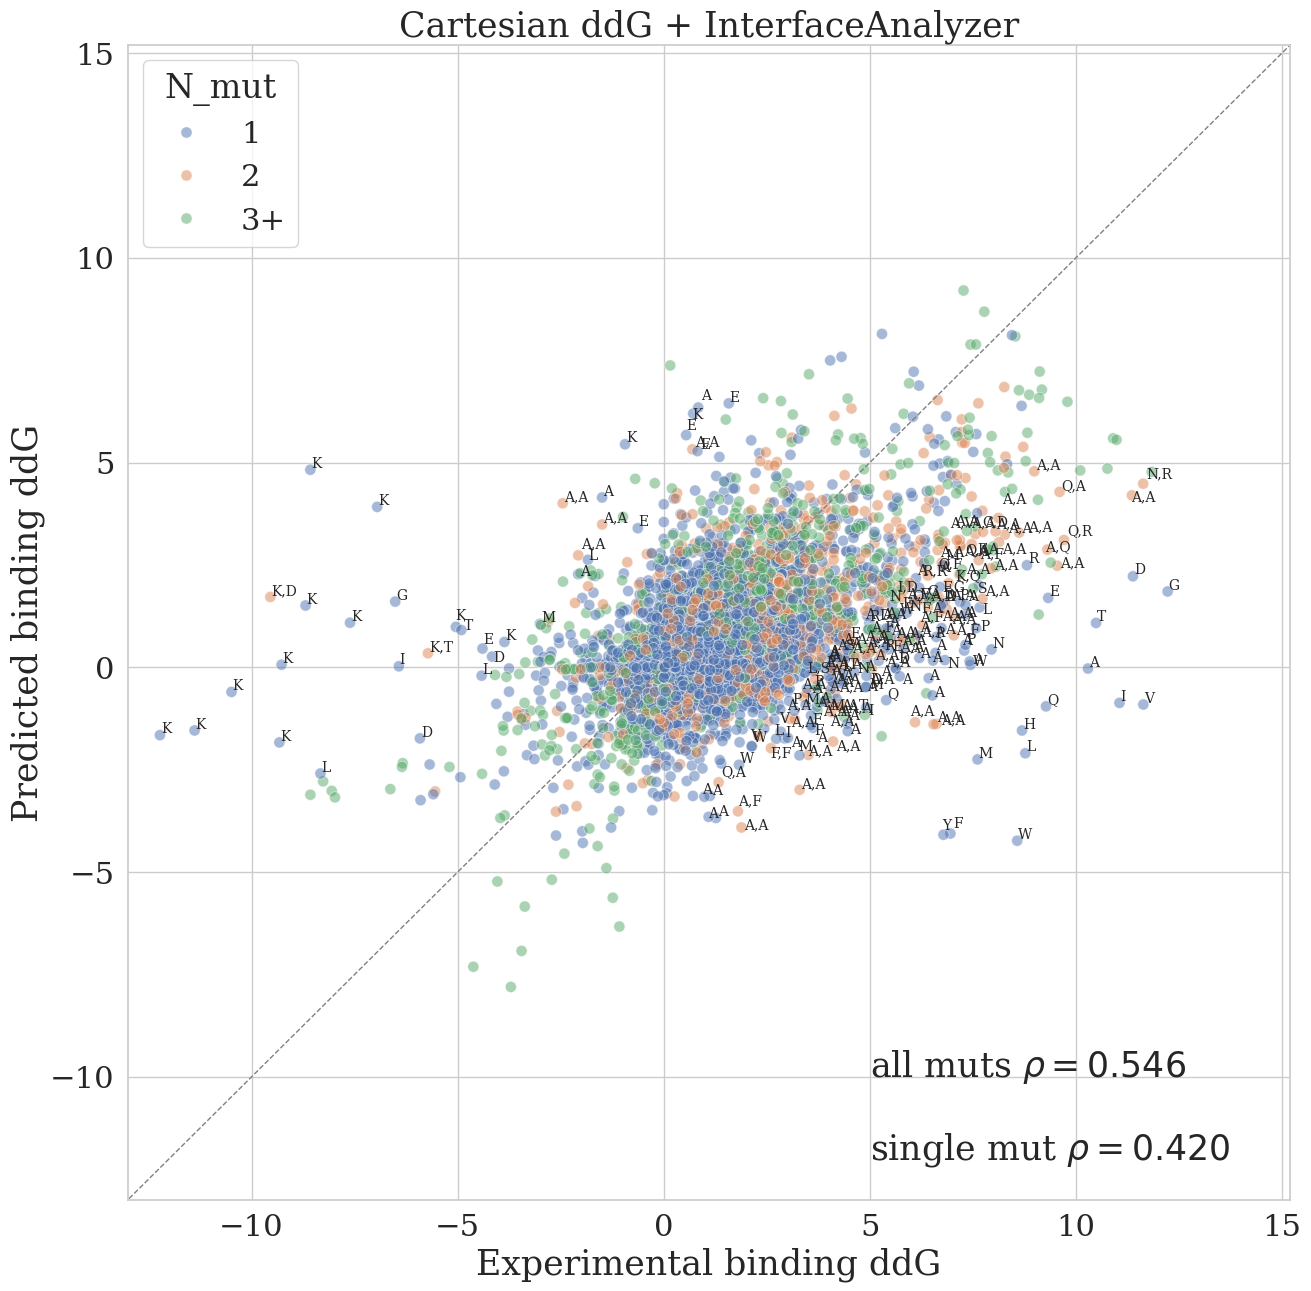

In [52]:
fig, axes = plt.subplots(1,1, figsize = (15,15))
plt.setp(axes, xlim=(-13, 15.2), ylim=(-13, 15.2))
# Create the scatter plot

plot = sns.scatterplot(data=exp_cart_ddG_all_no_nan, x='ddG_bind',
                       y='mean_ddG_infc',
                       alpha=0.5, s=65, hue='N_mut')

plt.xlabel('Experimental binding ddG', fontsize=25)
plt.ylabel('Predicted binding ddG', fontsize=25)
plt.title('Cartesian ddG + InterfaceAnalyzer', fontsize=25)

# Label the unfitting data points
x = exp_cart_ddG_all_no_nan['ddG_bind'].values
y = exp_cart_ddG_all_no_nan['mean_ddG_infc'].values
names = exp_cart_ddG_all_no_nan['variant'].values
# Distance to the diagonal both on x and y axis
#dist = abs(x-y)
txt_list=list()
for i in range(len(x)):
    # dist = np.sqrt((2*(abs(x-y))**2))/2
    dist = abs(x-y)
    sub_list = list()
    if (dist[i] > 4)&(len(names[i].split(':'))<=2):
        for point_mut in names[i].split(':'):
            sub_list.append(point_mut[-1])
        name = ','.join(sub_list)
        
        #plot.text(x[i]+0.01, y[i]+0.01, names[i][-1], fontsize=13)
        txt_list.append(plot.text(x[i]+0.01, y[i]+0.01, name, fontsize=10))
            
adjust_text(txt_list)

min_val = -15 - 1.5
max_val = 15 + 1.5
axes.plot([min_val, max_val], [min_val, max_val], color='gray', ls='--', lw=1)

r, p = stats.pearsonr(exp_cart_ddG_all_no_nan['ddG_bind'],
                      exp_cart_ddG_all_no_nan['mean_ddG_infc'])
axes.annotate(f'all muts $\\rho = {r:.3f}$', xy=(5, -10), fontsize = 25)

r, p = stats.pearsonr(exp_cart_ddG_all_no_nan.loc[exp_cart_ddG_all_no_nan['N_mut']=='1']['ddG_bind'],
                      exp_cart_ddG_all_no_nan.loc[exp_cart_ddG_all_no_nan['N_mut']=='1']['mean_ddG_infc'])
axes.annotate(f'single mut $\\rho = {r:.3f}$', xy=(5, -12), fontsize = 25)

#plt.savefig('Figures/cart_ddG_IA.pdf', format='pdf')

## Bits and pieces

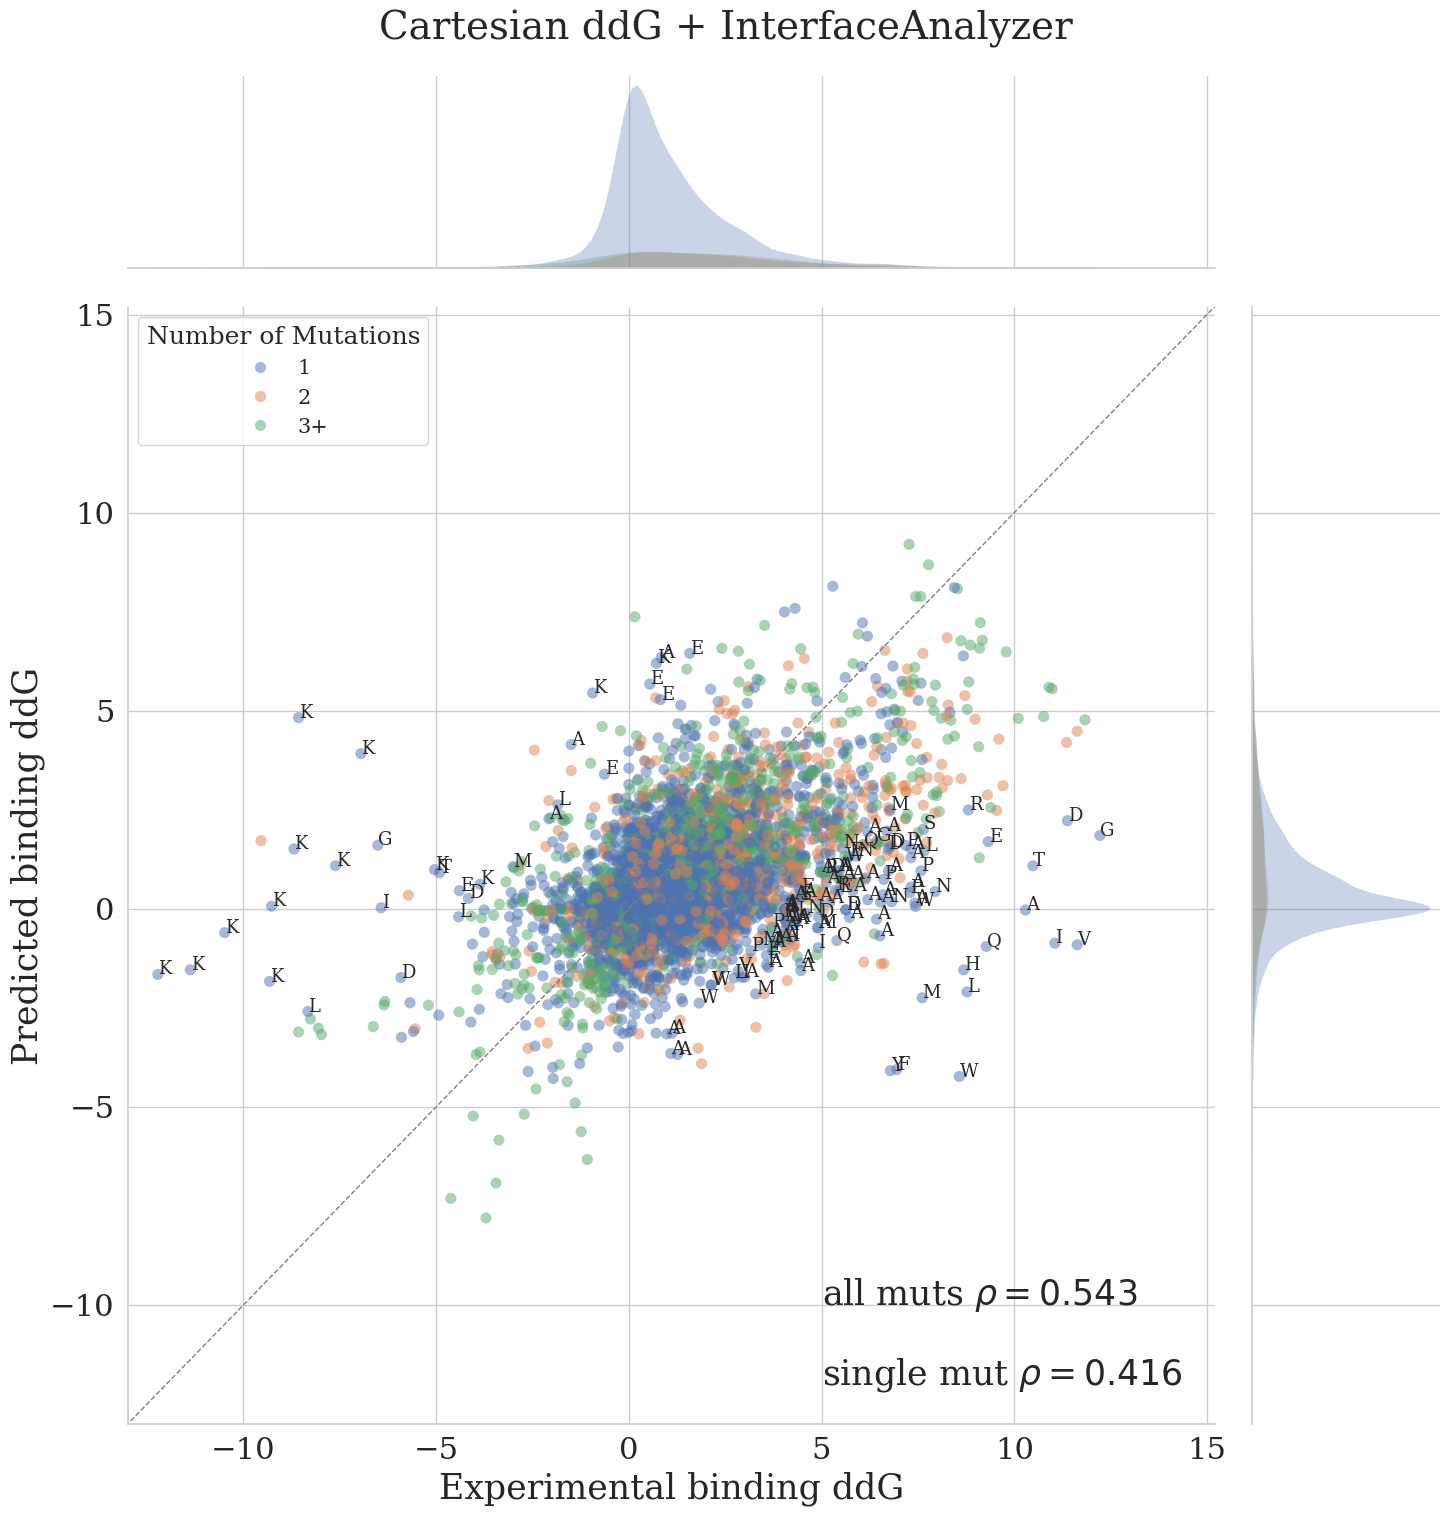

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Set up the JointGrid
g = sns.JointGrid(data=exp_cart_ddG_all_no_nan, x='ddG_bind', y='mean_ddG_infc',
                  height=15,  # Adjust overall figure size
                  xlim=(-13, 15.2), ylim=(-13, 15.2), hue="N_mut")

#g = g.plot(sns.scatterplot, sns.kdeplot, alpha=0.5, linewidth=0, size=65)
g.plot_joint(sns.scatterplot, alpha=0.5, linewidth=0, s=65)
g.plot_marginals(sns.kdeplot, fill=True, alpha=0.3, linewidth=0)

# # Plot the scatter plot on the main axes
# # We iterate through the unique hue categories to plot each subgroup separately
# # This allows seaborn to assign distinct colors for the marginal KDEs as well.
# for mut_type in exp_cart_ddG_all_no_nan['N_mut'].unique():
#     subset = exp_cart_ddG_all_no_nan[exp_cart_ddG_all_no_nan['N_mut'] == mut_type]
#     g.plot_joint(sns.scatterplot, alpha=0.5, s=65, label=f'N_mut={mut_type}') # Label for legend
#     # Plot marginal KDEs for each hue subgroup
#     g.plot_marginals(sns.kdeplot, fill=True, alpha=0.3, linewidth=0) # linewidth=0 hides the line itself


# Add labels and title
g.set_axis_labels(xlabel='Experimental binding ddG', ylabel='Predicted binding ddG', fontsize=25)
g.fig.suptitle('Cartesian ddG + InterfaceAnalyzer', fontsize=28, y=1.02) # Adjust suptitle position


# Add the diagonal line
min_val = -15 - 1.5
max_val = 15 + 1.5
g.ax_joint.plot([min_val, max_val], [min_val, max_val], color='gray', ls='--', lw=1)

# Label the unfitting data points
x = exp_cart_ddG_all_no_nan['ddG_bind'].values
y = exp_cart_ddG_all_no_nan['mean_ddG_infc'].values
names = exp_cart_ddG_all_no_nan['variant'].values
txt_list = list()
for i in range(len(x)):
    dist = abs(x-y)
    if (dist[i] > 4) and (len(names[i].split(':'))==1):
        g.ax_joint.text(x[i]+0.01, y[i]+0.01, names[i][-1], fontsize=13)
#         txt_list.append(g.ax_joint.text(x[i]+0.01, y[i]+0.01, names[i][-1], fontsize=13))
        
# adjust_text(txt_list)

# Calculate and annotate Pearson correlation coefficients
r_all, p_all = stats.pearsonr(exp_cart_ddG_all_no_nan['ddG_bind'],
                              exp_cart_ddG_all_no_nan['mean_ddG_infc'])
g.ax_joint.annotate(f'all muts $\\rho = {r_all:.3f}$', xy=(5, -10), fontsize = 25)

single_mut_data = exp_cart_ddG_all_no_nan.loc[exp_cart_ddG_all_no_nan['N_mut']=='1']
r_single, p_single = stats.pearsonr(single_mut_data['ddG_bind'],
                                    single_mut_data['mean_ddG_infc'])
g.ax_joint.annotate(f'single mut $\\rho = {r_single:.3f}$', xy=(5, -12), fontsize = 25)

# Add a legend to distinguish hue subgroups
g.ax_joint.legend(title='Number of Mutations', fontsize=15, title_fontsize=18)

# Adjust layout and save the figure
#plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Adjust rect to prevent suptitle overlap
plt.savefig('Figures/cart_ddG_IA_sing_marg_dens.pdf', format='pdf')

In [ ]:
plt.rc('font', size=23) #controls default text size
plt.rc('axes', labelsize=20) #fontsize of the x and y labels
plt.rc('xtick', labelsize=18) #fontsize of the x tick labels
plt.rc('ytick', labelsize=18) #fontsize of the y tick labels
sns.set(style='whitegrid', color_codes=True, font='serif', font_scale=2)

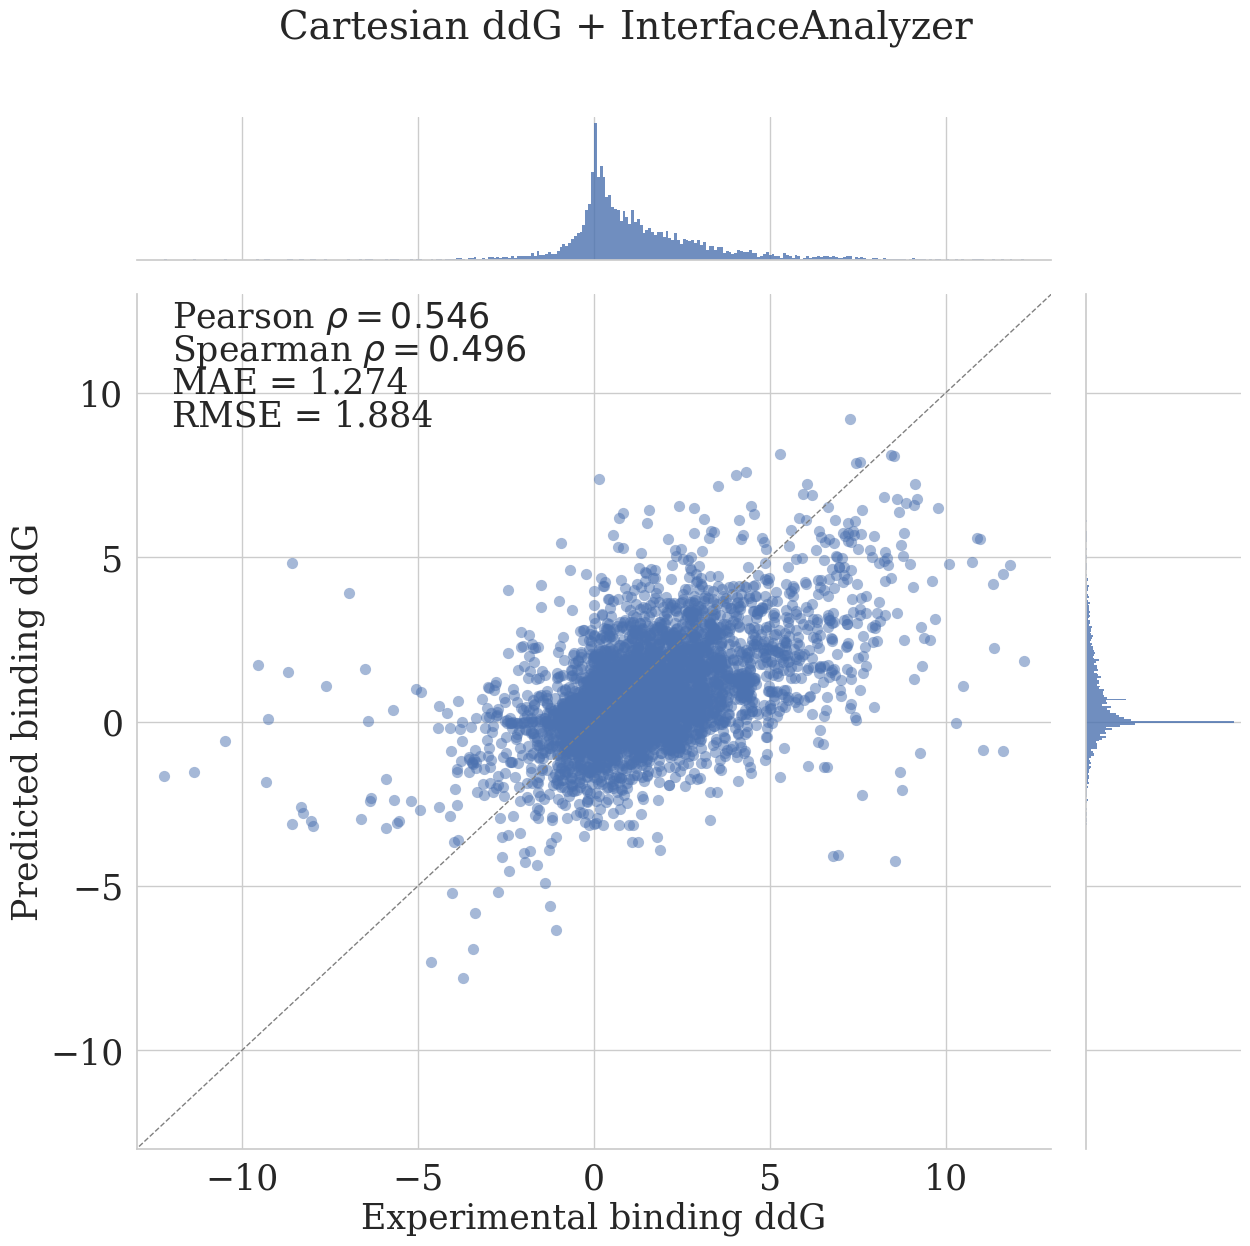

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Set up the JointGrid
g = sns.JointGrid(data=exp_cart_ddG_all_no_nan, x='ddG_bind', y='mean_ddG_infc',
                  height=13,  # Adjust overall figure size
                  xlim=(-13, 13), ylim=(-13, 13))

#g = g.plot(sns.scatterplot, sns.kdeplot, alpha=0.5, linewidth=0, size=65)
g.plot_joint(sns.scatterplot, alpha=0.5, linewidth=0, s=65)
# g.plot_marginals(sns.kdeplot, fill=True, alpha=0.6, linewidth=0)
g.plot_marginals(sns.histplot, fill=True, alpha=0.8, linewidth=0, bins=300)

# # Plot the scatter plot on the main axes
# # We iterate through the unique hue categories to plot each subgroup separately
# # This allows seaborn to assign distinct colors for the marginal KDEs as well.
# for mut_type in exp_cart_ddG_all_no_nan['N_mut'].unique():
#     subset = exp_cart_ddG_all_no_nan[exp_cart_ddG_all_no_nan['N_mut'] == mut_type]
#     g.plot_joint(sns.scatterplot, alpha=0.5, s=65, label=f'N_mut={mut_type}') # Label for legend
#     # Plot marginal KDEs for each hue subgroup
#     g.plot_marginals(sns.kdeplot, fill=True, alpha=0.3, linewidth=0) # linewidth=0 hides the line itself


# Add labels and title
g.set_axis_labels(xlabel='Experimental binding ddG', ylabel='Predicted binding ddG', fontsize=25)
g.fig.suptitle('X5723', fontsize=28, y=1) # Adjust suptitle position


# Add the diagonal line
min_val = -15 - 1.5
max_val = 15 + 1.5
g.ax_joint.plot([min_val, max_val], [min_val, max_val], color='gray', ls='--', lw=1)

# Calculate and annotate Pearson correlation coefficients
r_p, p_p = stats.pearsonr(exp_cart_ddG_all_no_nan['ddG_bind'],
                              exp_cart_ddG_all_no_nan['mean_ddG_infc'])
g.ax_joint.annotate(f"Pearson $\\rho = {r_p:.3f}$", xy=(-12, 12), fontsize = 25)

r_s, p_s = stats.spearmanr(exp_cart_ddG_all_no_nan['ddG_bind'],
                                     exp_cart_ddG_all_no_nan['mean_ddG_infc'])
g.ax_joint.annotate(f'Spearman $\\rho = {r_s:.3f}$', xy=(-12, 11), fontsize = 25)

error = mae(exp_cart_ddG_all_no_nan['ddG_bind'], exp_cart_ddG_all_no_nan['mean_ddG_infc'])
g.ax_joint.annotate(f'MAE = {error:.3f}', xy=(-12, 10), fontsize = 25)

rmse = sqrt(mean_squared_error(exp_cart_ddG_all_no_nan['ddG_bind'], exp_cart_ddG_all_no_nan['mean_ddG_infc']))
g.ax_joint.annotate(f'RMSE = {rmse:.3f}', xy=(-12, 9), fontsize = 25)

# # Add a legend to distinguish hue subgroups
# g.ax_joint.legend(title='Number of Mutations', fontsize=15, title_fontsize=18)

# Adjust layout and save the figure
plt.tight_layout(rect=[0, 0.03, 1, 1]) # Adjust rect to prevent suptitle overlap
plt.savefig('Figures/cart_ddG_IA_marg_dens_no_tags.pdf', format='pdf')

In [100]:
S2536_sub[S2536_sub['ddG_bind'].isna()]

Entry   PDB Interacting Chains Mutation(s)  \
99           114,188  1BRS                A:D       DD39A   
262          439,451  2WPT                A:B       SB67A   
481         845,1262  1JTG                A:B       EA79K   
496         947,5776  1JTG                A:B       EA85A   
825        2080,3057  1DAN              HL:TU      VU113A   
1034       2434,3242  1CHO              EFG:I       TI14E   
1772       3625,3634  1BD2             ABC:DE        YC5A   
2052       4728,4740  4I77               HL:Z      YH101A   
2059       4735,4747  4I77               HL:Z       YL32A   
2102  5327,5364,5441  3S9D                A:B       RA26A   
2357            6667  1C1Y                A:B       DA38A   
2358            6669  1LFD                A:B       YB32W   

     Mutation(s)_in_raw_pdb  Temperature  \
99                    DD39A       298.00   
262                   SB74A       298.00   
481                  EA104K       298.00   
496                  EA110A       297.00   
825                  VU207A       298.00   
1034                  TI17E       294.00   
1772                   YC5A       298.00   
2052                  YH98A       304.00   
2059                  YL28A       304.00   
2102                  RA33A       298.00   
2357                  DA38A       298.15   
2358                 YB232W       298.15   

                                              Reference   DDGb DDGb_SK1  \
99    7739054,Water-mediated_interaction_at_a_protei...  6.790     6.79   
262                                            18471830 -0.134   -0.134   
481                                    9891008,21294157  3.239    4.233   
496                                   17070843,24947275  1.378     4.06   
825                                     7947809,7654692  0.690     0.69   
1034  11171964,Stephen_Ming-teh_Lu_PhD_Thesis_Purdue...  5.582    5.582   
1772                                           23736024  3.340      XXX   
2052                                           23357170  1.654      XXX   
2059                                           23357170  0.815      XXX   
2102                         10556041,10984492,21854986  5.123      XXX   
2357                                            8636102  2.620      XXX   
2358                                            8636102 -0.211      XXX   

        cRSA  ...  small-to-large  type_of_change_infc  type_of_change_aa  \
99     0.968  ...             NaN                  NaN                NaN   
262    4.186  ...             NaN                  NaN                NaN   
481    6.048  ...             NaN                  NaN                NaN   
496    7.146  ...             NaN                  NaN                NaN   
825    2.422  ...             NaN                  NaN                NaN   
1034  16.190  ...             NaN                  NaN                NaN   
1772   1.514  ...             NaN                  NaN                NaN   
2052   8.374  ...             NaN                  NaN                NaN   
2059  35.450  ...             NaN                  NaN                NaN   
2102  10.682  ...             NaN                  NaN                NaN   
2357  11.212  ...             NaN                  NaN                NaN   
2358  89.958  ...             NaN                  NaN                NaN   

     N_mut multiple_measurements no_proper_value  Method  LChains  RChains  \
99     NaN                   NaN             NaN     NaN      NaN      NaN   
262    NaN                   NaN             NaN     NaN      NaN      NaN   
481    NaN                   NaN             NaN     NaN      NaN      NaN   
496    NaN                   NaN             NaN     NaN      NaN      NaN   
825    NaN                   NaN             NaN     NaN      NaN      NaN   
1034   NaN                   NaN             NaN     NaN      NaN      NaN   
1772     1                 False  no binding MUT     SPR      NaN      NaN   
2052   NaN                   NaN             N

In [114]:
skempi2_raw.loc[(skempi2_raw['#Pdb'].str[0:4]=='1BRS')&(skempi2_raw['Mutation(s)_PDB']=='DD39A')].values

array([['1BRS_A_D', 'DD39A', 'DD39A', 'COR', nan,
        '1BRS_A_D,1B2U_A_D,1B2S_A_D,1B3S_A_D,1X1W_A_D,1X1X_A_D',
        '4.06E-09', 4.06e-09, '1E-14', 1e-14, '7739054', 'Barnase',
        'Barstar', '298', 190000000.0, 190000000.0, 370000000.0,
        370000000.0, '9E-01', 0.9, '3.73E-06', 3.73e-06, -7.4, -19.3,
        13.1, -1.01,
        'Thermodynamic data from 9126847. ITC dG(mut) is -11.1 kcal/mol,,',
        'ITC', 1],
       ['1BRS_A_D', 'DD39A', 'DD39A', 'COR', nan,
        '1BRS_A_D,1B2U_A_D,1B2S_A_D,1B3S_A_D,1X1W_A_D,1X1X_A_D',
        '2.96E-06', 2.96e-06, '1.32E-10', 1.32e-10,
        'Water-mediated interaction at a protein-protein interface, Chemical Physics, Volume 307, Issues 2-3, 2004',
        'Barnase', 'Barstar', '298', 155000.0, 155000.0, 874000.0,
        874000.0, '4.57E-01', 0.457, '1.15E-04', 0.000115, nan, nan, nan,
        nan, nan, 'SPR', 1]], dtype=object)

In [115]:
skempi2_raw.loc[(skempi2_raw['#Pdb'].str[0:4]=='1BRS')&(skempi2_raw['Mutation(s)_PDB']=='DD39A')].columns

Index(['#Pdb', 'Mutation(s)_PDB', 'Mutation(s)_cleaned',
       'iMutation_Location(s)', 'Hold_out_type', 'Hold_out_proteins',
       'Affinity_mut (M)', 'Affinity_mut_parsed', 'Affinity_wt (M)',
       'Affinity_wt_parsed', 'Reference', 'Protein 1', 'Protein 2',
       'Temperature', 'kon_mut (M^(-1)s^(-1))', 'kon_mut_parsed',
       'kon_wt (M^(-1)s^(-1))', 'kon_wt_parsed', 'koff_mut (s^(-1))',
       'koff_mut_parsed', 'koff_wt (s^(-1))', 'koff_wt_parsed',
       'dH_mut (kcal mol^(-1))', 'dH_wt (kcal mol^(-1))',
       'dS_mut (cal mol^(-1) K^(-1))', 'dS_wt (cal mol^(-1) K^(-1))', 'Notes',
       'Method', 'SKEMPI version'],
      dtype='object')

In [105]:
S2536_sub.dropna(subset=['DDGb'])

Entry   PDB Interacting Chains Mutation(s)  \
0                  1  1CSE                E:I       LI38G   
1                  2  1CSE                E:I       LI38S   
2                  3  1CSE                E:I       LI38P   
3                  4  1CSE                E:I       LI38I   
4                  5  1CSE                E:I       LI38D   
...              ...   ...                ...         ...   
2532            6933  4L0P                A:B       EA27K   
2533            6934  4L0P                A:B       NA59S   
2534            6935  4L0P                A:B       TA76Q   
2535            6936  4L0P                A:B      TA140N   
2536  7044,7045,7046  1YQV               HL:Y       RY45K   

     Mutation(s)_in_raw_pdb  Temperature Reference   DDGb DDGb_SK1    cRSA  \
0                     LI45G        294.0   9048543  2.249    2.249   8.359   
1                     LI45S        294.0   9048543  1.172    1.172   8.359   
2                     LI45P        294.0   9048543  6.672    6.672   8.359   
3                     LI45I        294.0   9048543  2.941    2.941   8.359   
4                     LI45D        294.0   9048543  4.351    4.351   8.359   
...                     ...          ...       ...    ...      ...     ...   
2532                  EA53K        298.0  22242939  2.665      XXX   8.045   
2533                  NA85S        298.0  22242939  0.314      XXX  21.901   
2534                 TA102Q        298.0  22242939  1.472      XXX   0.000   
2535                 TA166N        298.0  22242939  0.278      XXX  42.111   
2536                  RY45K        297.0   9252107  1.867      XXX   3.279   

      ...  small-to-large   type_of_change_infc        type_of_change_aa  \
0     ...           False      infc to non-infc   hydrophobic to special   
1     ...           False      infc to non-infc     hydrophobic to polar   
2     ...           False      infc to non-infc   hydrophobic to special   
3     ...           False          infc to infc                same type   
4     ...           False      infc to non-infc  hydrophobic to negative   
...   ...             ...                   ...                      ...   
2532  ...            True  non-infc to non-infc     negative to positive   
2533  ...           False  non-infc to non-infc                same type   
2534  ...            True  non-infc to non-infc                same type   
2535  ...            True  non-infc to non-infc                same type   
2536  ...           False      infc to non-infc                same type   

     N_mut multiple_measurements no_proper_value  Method  LChains  RChains  \
0        1                 False         Regular    IASP        E        I   
1        1                 False         Regular    IASP        E        I   
2        1                 False         Regular    IASP        E        I   
3        1                 False         Regular    IASP        E        I   
4        1                 False         Regular    IASP        E        I   
...    ...                   ...             ...     ...      ...      ...   
2532     1                 False         Regular   ELISA        A        B   
2533     1                 False         Regular   ELISA        A        B   
2534     1                 False         Regular   ELISA        A        B   
2535     1                 False         Regular   ELISA        A        B   
2536     1                  True         Regular     ITC       HL        Y   

      Chains  
0         EI  
1         EI  
2         EI  
3         EI  
4         EI  
...      ...  
2532      AB  
2533      AB  
2534      AB  
2535      AB  
2536     HLY  

[2537 rows x 56 columns]

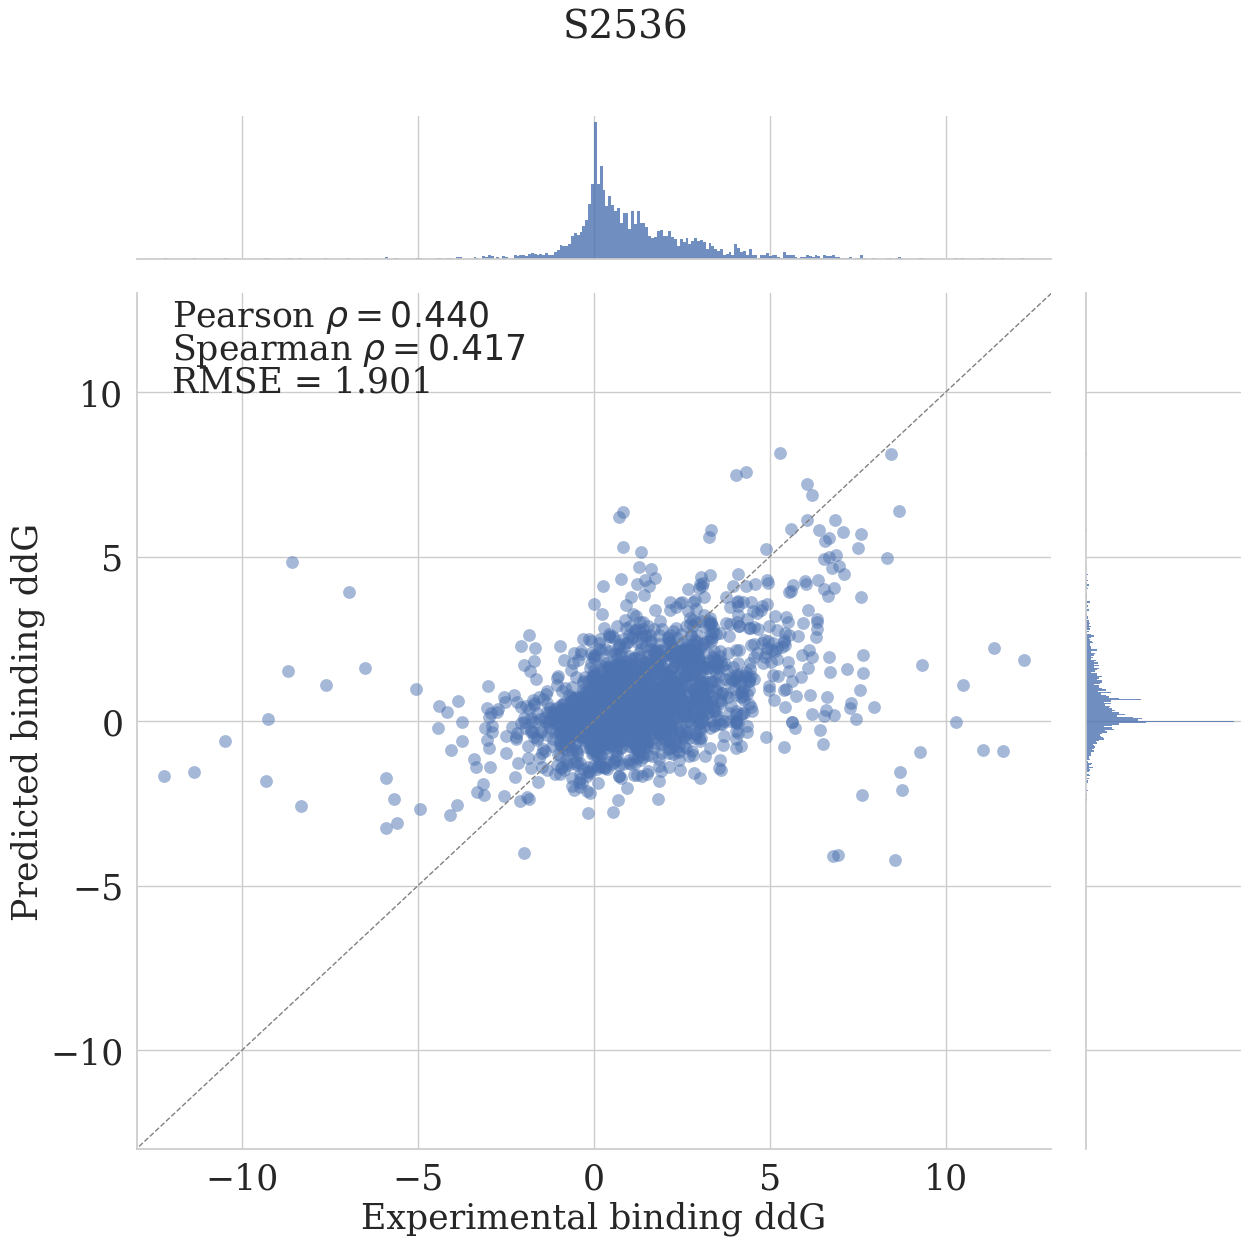

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

df = S2536_sub.dropna(subset=['mean_ddG_infc'])

# Set up the JointGrid
g = sns.JointGrid(data=df, x='DDGb', y='mean_ddG_infc',
                  height=13,  # Adjust overall figure size
                  xlim=(-13, 13), ylim=(-13, 13))

#g = g.plot(sns.scatterplot, sns.kdeplot, alpha=0.5, linewidth=0, size=65)
g.plot_joint(sns.scatterplot, alpha=0.5, linewidth=0, s=85)
# g.plot_marginals(sns.kdeplot, fill=True, alpha=0.6, linewidth=0)
g.plot_marginals(sns.histplot, fill=True, alpha=0.8, linewidth=0, bins=300)

# Add labels and title
g.set_axis_labels(xlabel='Experimental binding ddG', ylabel='Predicted binding ddG', fontsize=25)
g.fig.suptitle('S2536', fontsize=28, y=1) # Adjust suptitle position


# Add the diagonal line
min_val = -15 - 1.5
max_val = 15 + 1.5
g.ax_joint.plot([min_val, max_val], [min_val, max_val], color='gray', ls='--', lw=1)

# Calculate and annotate Pearson correlation coefficients
r_p, p_p = stats.pearsonr(df['DDGb'], df['mean_ddG_infc'])
g.ax_joint.annotate(f"Pearson $\\rho = {r_p:.3f}$", xy=(-12, 12), fontsize = 25)

r_s, p_s = stats.spearmanr(df['DDGb'], df['mean_ddG_infc'])
g.ax_joint.annotate(f'Spearman $\\rho = {r_s:.3f}$', xy=(-12, 11), fontsize = 25)

rmse = sqrt(mean_squared_error(df['DDGb'], df['mean_ddG_infc']))
g.ax_joint.annotate(f'RMSE = {rmse:.3f}', xy=(-12, 10), fontsize = 25)

# # Add a legend to distinguish hue subgroups
# g.ax_joint.legend(title='Number of Mutations', fontsize=15, title_fontsize=18)

# Adjust layout and save the figure
plt.tight_layout(rect=[0, 0.03, 1, 1]) # Adjust rect to prevent suptitle overlap
plt.savefig('Figures/S2536.pdf', format='pdf')

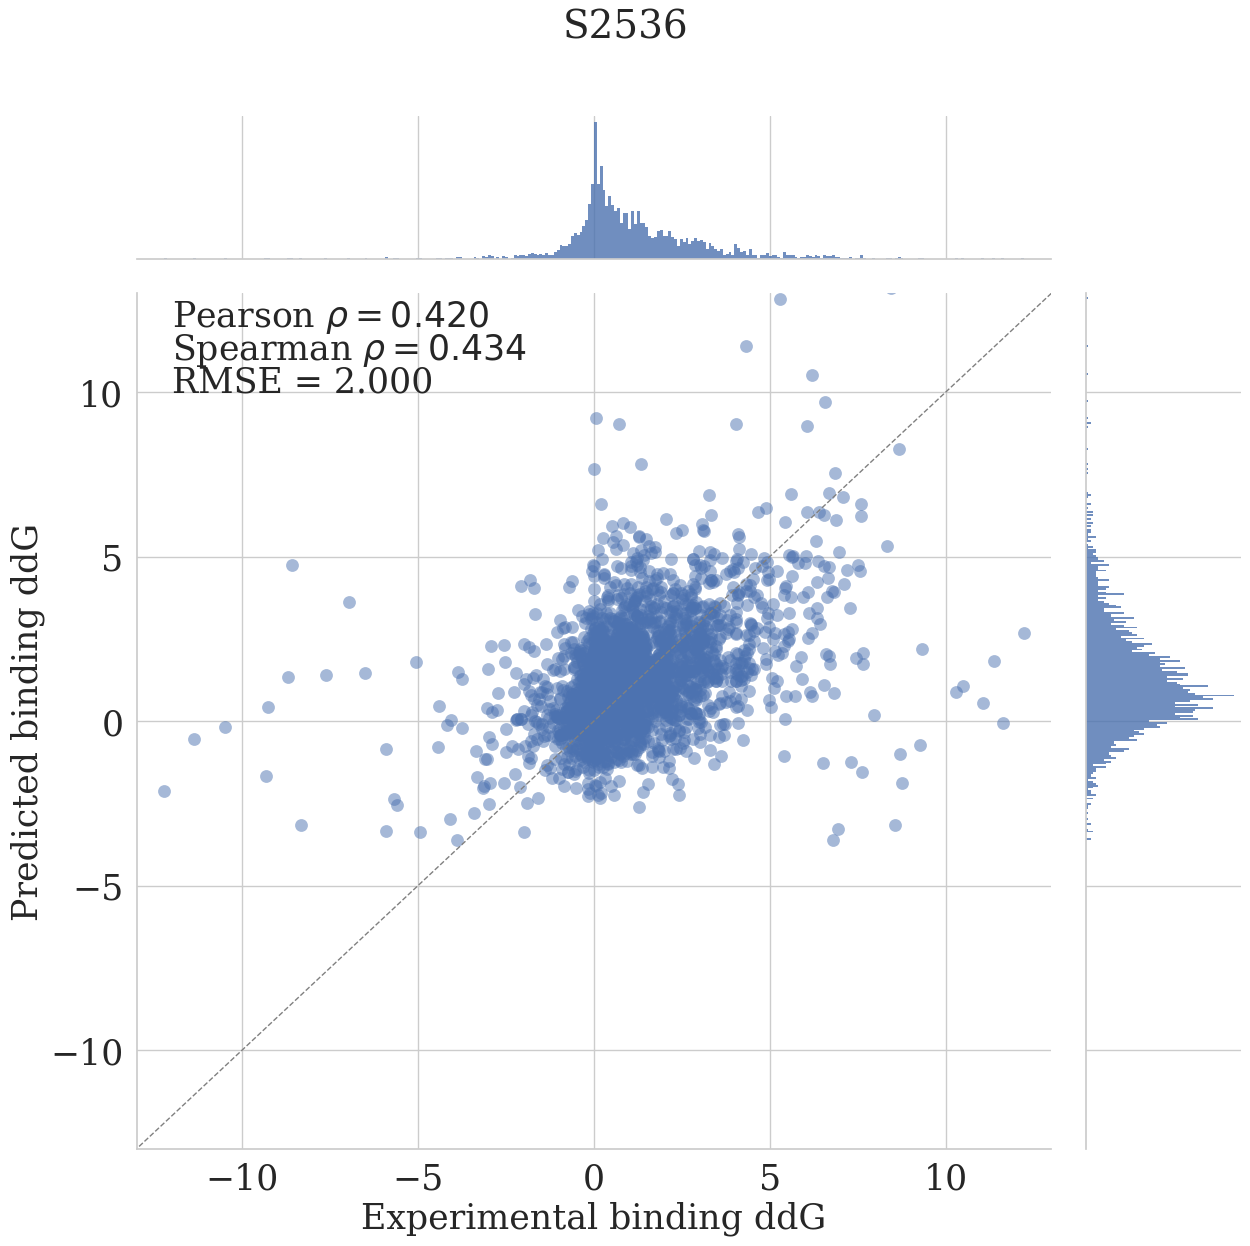

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

df = S2536_sub.dropna(subset=['mean_ddG'])

# Set up the JointGrid
g = sns.JointGrid(data=df, x='DDGb', y='mean_ddG',
                  height=13,  # Adjust overall figure size
                  xlim=(-13, 13), ylim=(-13, 13))

#g = g.plot(sns.scatterplot, sns.kdeplot, alpha=0.5, linewidth=0, size=65)
g.plot_joint(sns.scatterplot, alpha=0.5, linewidth=0, s=85)
# g.plot_marginals(sns.kdeplot, fill=True, alpha=0.6, linewidth=0)
g.plot_marginals(sns.histplot, fill=True, alpha=0.8, linewidth=0, bins=300)

# Add labels and title
g.set_axis_labels(xlabel='Experimental binding ddG', ylabel='Predicted binding ddG', fontsize=25)
g.fig.suptitle('S2536', fontsize=28, y=1) # Adjust suptitle position


# Add the diagonal line
min_val = -15 - 1.5
max_val = 15 + 1.5
g.ax_joint.plot([min_val, max_val], [min_val, max_val], color='gray', ls='--', lw=1)

# Calculate and annotate Pearson correlation coefficients
r_p, p_p = stats.pearsonr(df['DDGb'], df['mean_ddG'])
g.ax_joint.annotate(f"Pearson $\\rho = {r_p:.3f}$", xy=(-12, 12), fontsize = 25)

r_s, p_s = stats.spearmanr(df['DDGb'], df['mean_ddG'])
g.ax_joint.annotate(f'Spearman $\\rho = {r_s:.3f}$', xy=(-12, 11), fontsize = 25)

rmse = sqrt(mean_squared_error(df['DDGb'], df['mean_ddG']))
g.ax_joint.annotate(f'RMSE = {rmse:.3f}', xy=(-12, 10), fontsize = 25)

# # Add a legend to distinguish hue subgroups
# g.ax_joint.legend(title='Number of Mutations', fontsize=15, title_fontsize=18)

# Adjust layout and save the figure
plt.tight_layout(rect=[0, 0.03, 1, 1]) # Adjust rect to prevent suptitle overlap
#plt.savefig('Figures/S2536.pdf', format='pdf')

In [ ]:
residue_asa_3 = {
    'GLY': 47.155,
    'ALA': 61.063,
    'SER': 69.073,
    'CYS': 78.62,
    'PRO': 81.03,
    'THR': 82.92,
    'ASP': 86.142,
    'VAL': 90.264,
    'ASN': 90.541,
    'GLU': 102.57,
    'ILE': 105.307,
    'LEU': 105.842,
    'GLN': 106.534,
    'HIS': 110.864,
    'MET': 112.01,
    'LYS': 120.502,
    'PHE': 124.714,
    'TYR': 130.885,
    'ARG': 138.595,
    'TRP': 148.915
}

residue_asa_1 = {
    'G': 47.155,
    'A': 61.063,
    'S': 69.073,
    'C': 78.62,
    'P': 81.03,
    'T': 82.92,
    'D': 86.142,
    'V': 90.264,
    'N': 90.541,
    'E': 102.57,
    'I': 105.307,
    'L': 105.842,
    'Q': 106.534,
    'H': 110.864,
    'M': 112.01,
    'K': 120.502,
    'F': 124.714,
    'Y': 130.885,
    'R': 138.595,
    'W': 148.915
}

In [ ]:
fig, axes = plt.subplots(1,1, figsize = (15,15))
plt.setp(axes, xlim=(-13, 15.2), ylim=(-13, 15.2))
# Create the scatter plot
plot = sns.scatterplot(data=exp_cart_ddG_all_no_nan, x='mean_ddG',
                       y='mean_ddG_infc',
                       alpha=0.5, s=65, hue='N_mut')

plt.xlabel('Without IA', fontsize=25)
plt.ylabel('With IA', fontsize=25)
plt.title('Cartesian ddG vs Cartesian ddG + InterfaceAnalyzer', fontsize=25)

# Label the unfitting data points
x = exp_cart_ddG_all_no_nan['mean_ddG'].values
y = exp_cart_ddG_all_no_nan['mean_ddG_infc'].values
names = exp_cart_ddG_all_no_nan['variant'].values
txt_list=list()
for i in range(len(x)):
    # dist = np.sqrt((2*(abs(x-y))**2))/2
    dist = abs(x-y)
    sub_list = list()
    if (dist[i] > 4)&(len(names[i].split(':'))<=2):
        for point_mut in names[i].split(':'):
            sub_list.append(point_mut[-1])
        name = ','.join(sub_list)
        
        #plot.text(x[i]+0.01, y[i]+0.01, names[i][-1], fontsize=13)
        txt_list.append(plot.text(x[i]+0.01, y[i]+0.01, name, fontsize=10))
            
adjust_text(txt_list)

min_val = -15 - 1.5
max_val = 15 + 1.5
axes.plot([min_val, max_val], [min_val, max_val], color='gray', ls='--', lw=1)

r, p = stats.pearsonr(exp_cart_ddG_all_no_nan['mean_ddG'],
                      exp_cart_ddG_all_no_nan['mean_ddG_infc'])
axes.annotate(f'all muts $\\rho = {r:.3f}$', xy=(5, -10), fontsize = 25)

r, p = stats.pearsonr(exp_cart_ddG_all_no_nan.loc[exp_cart_ddG_all_no_nan['N_mut']=='1']['mean_ddG'],
                      exp_cart_ddG_all_no_nan.loc[exp_cart_ddG_all_no_nan['N_mut']=='1']['mean_ddG_infc'])
axes.annotate(f'single mut $\\rho = {r:.3f}$', xy=(5, -12), fontsize = 25)

#plt.savefig('Figures/cart_ddG_IA_vs_reg.pdf', format='pdf')

In [ ]:


fig, axes = plt.subplots(1,1, figsize = (12,12))
plt.setp(axes, xlim=(-13, 13), ylim=(-13, 13))
# Create the scatter plot

df = exp_cart_ddG_all_no_nan.loc[exp_cart_ddG_all_no_nan['no_proper_value']!='Regular']

plot = sns.scatterplot(data=df, x='ddG_bind',
                       y='mean_ddG_infc',
                       alpha=0.5, s=65, hue='no_proper_value')

plt.xlabel('Experimental binding ddG', fontsize=25)
plt.ylabel('Predicted binding ddG', fontsize=25)
plt.title('Cartesian ddG + InterfaceAnalyzer', fontsize=25)

min_val = -15 - 1.5
max_val = 15 + 1.5
axes.plot([min_val, max_val], [min_val, max_val], color='gray', ls='--', lw=1)

r, p = stats.pearsonr(df['ddG_bind'],
                      df['mean_ddG_infc'])
axes.annotate(f'all muts $\\rho = {r:.3f}$', xy=(0, -9), fontsize = 25)

r, p = stats.pearsonr(df.loc[df['N_mut']=='1']['ddG_bind'],
                      df.loc[df['N_mut']=='1']['mean_ddG_infc'])
axes.annotate(f'single mut $\\rho = {r:.3f}$', xy=(0, -10.5), fontsize = 25)

sns.move_legend(axes, "upper left")

#plt.savefig('Figures/cart_ddG_IA_no_outliers.pdf', format='pdf')

In [ ]:
skempi2_mm = pd.read_csv('/groups/sbinlab/panf/SKEMPIv2_benchmark/skempi2_multi_measurements.csv')
skempi2_mm_count = skempi2_mm[['#Pdb', 'Method']].groupby('Method').count().reset_index()
skempi2_mm_count.rename(columns={"#Pdb": "Percentage"}, inplace=True)
skempi2_mm_count['Percentage'] = skempi2_mm_count['Percentage'] / len(skempi2_mm) * 100
skempi2_mm_count['Subset'] = 'Multiple measuremnts' 

skempi2_mm_err = skempi2_mm.loc[skempi2_mm['ddG_bind_std']>1]
skempi2_mm_err_count = skempi2_mm_err[['#Pdb', 'Method']].groupby('Method').count().reset_index()
skempi2_mm_err_count.rename(columns={"#Pdb": "Percentage"}, inplace=True)
skempi2_mm_err_count['Percentage'] = skempi2_mm_err_count['Percentage'] / len(skempi2_mm_err) * 100
skempi2_mm_err_count['Subset'] = 'Error'

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

df = exp_cart_ddG_all_no_nan.copy()

# --- 1. Define Groups based on Prediction Error ---
# Here we use your exact logic to define the 'Outlier' group.
print("\n--- 2. Defining Groups ---")
df['Group'] = 'Non-Outlier'
df.loc[abs(df['ddG_bind']-df['mean_ddG_infc'])>4, 'Group'] = 'Outlier'

print(f"Total samples: {len(df)}")
print(f"Outlier samples: {len(df[df['Group'] == 'Outlier'])}")
print(f"Non-Outlier samples: {len(df[df['Group'] == 'Non-Outlier'])}")


# --- 2. Create the Contingency Table ---
# This table counts the occurrences of each 'Method' for each 'Group'.
print("\n--- 3. Building the Contingency Table ---")
contingency_table = pd.crosstab(df['Group'], df['Method'])
print(contingency_table)


# --- 3. Perform the Chi-Squared Test ---
print("\n--- 4. Performing Chi-Squared Test ---")
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"\nP-value: {p_value:.10f}")
if p_value < 0.05:
    print("Result: The p-value is significant. The distribution of 'Method' is different for the outlier group.")
else:
    print("Result: The p-value is not significant. The 'Method' distribution is similar across groups.")


# --- 4. Find Overrepresented Categories (Post-Hoc Analysis) ---
# If the p-value was significant, we find out which categories were responsible.
if p_value < 0.05:
    print("\n--- 5. Analyzing Standardized Residuals ---")
    # Standardized Residual = (Observed - Expected) / sqrt(Expected)
    residuals = (contingency_table - expected) / np.sqrt(expected)
    
    # Extracting the residuals for the 'Outlier' group for easier analysis
    outlier_residuals = residuals.loc['Outlier']
    
    # A residual > 1.96 is a common threshold for statistical significance
    overrepresented = outlier_residuals[outlier_residuals > 1.96]

    print("\nInterpreting the Residuals for the 'Outlier' group:")
    print("A large positive residual (> 1.96) suggests significant OVERREPRESENTATION.")
    
    if not overrepresented.empty:
        print("\nSignificantly OVERREPRESENTED categories in the Outlier group:")
        print(overrepresented.round(2))
    else:
        print("\nNo categories were found to be significantly overrepresented in the Outlier group.")

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# --- User-provided Data ---
van_der_waals_volumes = {
    'G': 48, 'A': 67, 'S': 73, 'C': 86, 'T': 93, 'P': 90, 'D': 91, 'N': 96,
    'V': 105, 'E': 109, 'Q': 114, 'I': 124, 'L': 124, 'M': 124, 'H': 118,
    'K': 135, 'F': 135, 'R': 148, 'Y': 141, 'W': 163
}
interface_res_set = set(['W', 'F', 'Y', 'C', 'I', 'L', 'M', 'V', 'H', 'R'])

# --- Data Processing ---

# 1. Convert data to a list of dictionaries for pandas
plot_data = []
for aa, volume in van_der_waals_volumes.items():
    aa_type = 'Interface' if aa in interface_res_set else 'Non-Interface'
    plot_data.append({
        'Amino Acid': aa,
        'Volume': volume,
        'Type': aa_type
    })

# 2. Create a pandas DataFrame
df = pd.DataFrame(plot_data)

# 3. Sort the DataFrame by 'Volume'
df_sorted = df.sort_values(by='Volume')

# --- Plotting ---

# Set up the figure and axes
plt.figure(figsize=(14, 7))

# Create the bar plot
# We pass the sorted list of 'Amino Acid' names to the 'order' parameter
# We use 'hue' to color the bars based on 'Type'
# 'dodge=False' ensures the bars are not split by hue
ax = sns.barplot(
    data=df_sorted,
    x='Amino Acid',
    y='Volume',
    hue='Type',
    order=df_sorted['Amino Acid'],
    # Fix: Seaborn palette expects colors as tuples (R, G, B) normalized to [0, 1]
    palette={'Interface': (54/255, 162/255, 235/255), 
             'Non-Interface': (201/255, 203/255, 207/255)},
    dodge=False
)

# Set plot title and labels
ax.set_title('Amino Acid van der Waals Volume by Interface Classification', fontsize=16)
ax.set_xlabel('Amino Acid (Sorted by Volume)', fontsize=12)
ax.set_ylabel('van der Waals Volume (Å³)', fontsize=12)

# Adjust legend
# Get the legend handle
handles, labels = ax.get_legend_handles_labels()
# Place legend outside the plot
ax.legend(handles, labels, title='Residue Type', bbox_to_anchor=(1.02, 1), loc='upper left')

# Improve layout
plt.tight_layout()

# Save the figure (optional)
# plt.savefig('amino_acid_volume_plot.png', dpi=300)

# Display the plot
plt.show()